# Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

# Data import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
ls drive/MyDrive/ML

application_data.csv.zip        columns_description.csv
application_data_processed.zip  previous_application.csv.zip


In [ ]:
descr = pd.read_csv("drive/MyDrive/ML/columns_description.csv")

In [ ]:
df = pd.read_csv("drive/MyDrive/ML/application_data.csv.zip")

In [ ]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0         202500.00   406597.50     24700.50   
1               N             0         270000.00  1293502.50     35698.50   
2               Y             0          67500.00   135000.00      6750.00   
3               Y             0         135000.00   312682.50     29686.50   
4               Y             0         121500.00   513000.00     21865.50   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        351000.00   Unaccompanied          Working   
1       1129500.00          Family    State servant   
2        135000.00   Unaccompanied          Working   
3        297000.00   Unaccompanied          Working   
4        513000.00   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                        0.02       -9461           -637           -3648.00   
1                        0.00      -16765          -1188           -1186.00   
2                        0.01      -19046           -225           -4260.00   
3                        0.01      -19005          -3039           -9833.00   
4                        0.03      -19932          -3038           -4311.00   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531        26.00           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers             1.00   
1                 1           1           0      Core staff             2.00   
2                 1           1           0        Laborers             1.00   
3                 1           0           0        Laborers             2.00   
4                 1           0           0      Core staff             1.00   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

# Data structure check

In [ ]:
df.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [ ]:
df.shape

(307511, 122)

We have ~307k rows and 122 columns.

## Statistical report for numeric variables

In [ ]:
df.describe()

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count   307511.00 307511.00     307511.00         307511.00   307511.00   
mean    278180.52      0.08          0.42         168797.92   599026.00   
std     102790.18      0.27          0.72         237123.15   402490.78   
min     100002.00      0.00          0.00          25650.00    45000.00   
25%     189145.50      0.00          0.00         112500.00   270000.00   
50%     278202.00      0.00          0.00         147150.00   513531.00   
75%     367142.50      0.00          1.00         202500.00   808650.00   
max     456255.00      1.00         19.00      117000000.00  4050000.00   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count    307499.00        307233.00                   307511.00   307511.00   
mean      27108.57        538396.21                        0.02   -16037.00   
std       14493.74        369446.46                        0.01     4363.99   
min        1615.50         40500.00                        0.00   -25229.00   
25%       16524.00        238500.00                        0.01   -19682.00   
50%       24903.00        450000.00                        0.02   -15750.00   
75%       34596.00        679500.00                        0.03   -12413.00   
max      258025.50       4050000.00                        0.07    -7489.00   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
count      307511.00          307511.00        307511.00    104582.00   
mean        63815.05           -4986.12         -2994.20        12.06   
std        141275.77            3522.89          1509.45        11.94   
min        -17912.00          -24672.00         -7197.00         0.00   
25%         -2760.00           -7479.50         -4299.00         5.00   
50%         -1213.00           -4504.00         -3254.00         9.00   
75%          -289.00           -2010.00         -1720.00        15.00   
max        365243.00               0.00             0.00        91.00   

       FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count   307511.00       307511.00        307511.00         307511.00   
mean         1.00            0.82             0.20              1.00   
std          0.00            0.38             0.40              0.04   
min          0.00            0.00             0.00              0.00   
25%          1.00            1.00             0.00              1.00   
50%          1.00            1.00             0.00              1.00   
75%          1.00            1.00             0.00              1.00   
max          1.00            1.00             1.00              1.00   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count   307511.00   307511.00        307509.00             307511.00   
mean         0.28        0.06             2.15                  2.05   
std          0.45        0.23             0.91                  0.51   
min          0.00        0.00             1.00                  1.00   
25%          0.00        0.00             2.00                  2.00   
50%          0.00        0.00             2.00                  2.00   
75%          1.00        0.00             3.00                  2.00   
max          1.00        1.00            20.00                  3.00   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                    307511.00                307511.00   
mean                          2.03                    12.06   
std                           0.50                     3.27   
min                           1.00                     0.00   
25%                           2.00                    10.00   
50%                           2.00                    12.00   
75%                           2.00                    14.00   
max                           3.00                    23.00   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                   307511

# Analysis of categorical variables

In [ ]:
df.select_dtypes(include = "object").columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [ ]:
len(df.select_dtypes(include = "object").columns)

16

The data contains 16 `categorical` variables

# Analysis of numerical variables

In [ ]:
number_df = df.select_dtypes(include="number")

In [ ]:
number_df.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [ ]:
len(number_df.columns)

106

The data contains 106 `numerical` variables

In [ ]:
number_df.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0         202500.00   406597.50   
1      100003       0             0         270000.00  1293502.50   
2      100004       0             0          67500.00   135000.00   
3      100006       0             0         135000.00   312682.50   
4      100007       0             0         121500.00   513000.00   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0     24700.50        351000.00                        0.02       -9461   
1     35698.50       1129500.00                        0.00      -16765   
2      6750.00        135000.00                        0.01      -19046   
3     29686.50        297000.00                        0.01      -19005   
4     21865.50        513000.00                        0.03      -19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0           -637           -3648.00            -2120          NaN           1   
1          -1188           -1186.00             -291          NaN           1   
2           -225           -4260.00            -2531        26.00           1   
3          -3039           -9833.00            -2437          NaN           1   
4          -3038           -4311.00            -3458          NaN           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0             1.00                     2                            2   
1             2.00                     1                            1   
2             1.00                     2                            2   
3             2.00                     2                            2   
4             1.00                     2                            2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0          0.08          0.26          0.14            0.02              0.04   
1          0.31          0.62           NaN            0.10              0.05   
2           NaN          0.56          0.73             NaN               NaN   
3           NaN          0.65           NaN             NaN               NaN   
4           NaN          0.32           NaN             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COM

# Working with incorrect data types

Checking if we have a column with the wrong data type

In [ ]:
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64
FLAG_PHONE                        int64
FLAG_EMAIL                        int64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
WEEKDAY_APPR_PROCESS_START       object
HOUR_APPR_PROCESS_START           int64
REG_REGION_NOT_LIVE_REGION        int64
REG_REGION_NOT_WORK_REGION        int64
LIVE_REGION_NOT_WORK_REGION       int64
REG_CITY_NOT_LIVE_CITY            int64
REG_CITY_NOT_WORK_CITY            int64
LIVE_CITY_NOT_WORK_CITY           int64
ORGANIZATION_TYPE                object
EXT_SOURCE_1                    float64
EXT_SOURCE_2                    float64
EXT_SOURCE_3                    float64
APARTMENTS_AVG                  float64
BASEMENTAREA_AVG                float64
YEARS_BEGINEXPLUATATION_AVG     float64
YEARS_BUILD_AVG                 float64
COMMONAREA_AVG                  float64
ELEVATORS_AVG                   float64
ENTRANCES_AVG                   float64
FLOORSMAX_AVG                   float64
FLOORSMIN_AVG                   float64
LANDAREA_AVG                    float64
LIVINGAPARTMENTS_AVG            float64
LIVINGAREA_AVG                  float64
NONLIVINGAPARTMENTS_AVG         float64
NONLIVINGAREA_AVG               float64
APARTMENTS_MODE                 float64
BASEMENTAREA_MODE               float64
YEARS_BEGINEXPLUATATION_MODE    float64
YEARS_BUILD_MODE                float64
COMMONAREA_MODE                 float64
ELEVATORS_MODE                  float64
ENTRANCES_MODE                  float64
FLOORSMAX_MODE                  float64
FLOORSMIN_MODE                  float64
LANDAREA_MODE                   float64
LIVINGAPARTMENTS_MODE           float64
LIVINGAREA_MODE                 float64
NONLIVINGAPARTMENTS_MODE        float64
NONLIVINGAREA_MODE              float64
APARTMENTS_MEDI                 float64
BASEMENTAREA_MEDI               float64
YEARS_BEGINEXPLUATATION_MEDI    float64
YEARS_BUILD_MEDI                float64
COMMONAREA_MEDI                 float64
ELEVATORS_MEDI                  float64
ENTRANCES_MEDI                  float64
FLOORSMAX_MEDI                  float64
FLOORSMIN_MEDI                  float64
LANDAREA_MEDI                   float64
LIVINGAPARTMENTS_MEDI           float64
LIVINGAREA_MEDI                 float64
NONLIVINGAPARTMENTS_MEDI        float64
NONLIVINGAREA_MEDI              float64
FONDKAPREMONT_MODE               object
HOUSETYPE_MODE                   object
TOTALAREA_MODE                  float64
WALLSMATERIAL_MODE               object
EMERGENCYSTATE_MODE              object
OBS_30_CNT_SOCIAL_CIRCLE        float64
DEF_30_CNT_SOCIAL_CIRCLE        float64
OBS_60_CNT_SOCIAL_CIRCLE        float64
DEF_60_CNT_SOCIAL_CIRCLE        float64
DAYS_LAST_PHONE_CHANGE          float64
FLAG_DOCUMENT_2                   int64
FLAG_DOCUMENT_3                   int64
FLAG_DOCUMENT_4                   int64
FLAG_DOCUMENT_5                   int64


By looking at the data and its corresponding data types, you can change the type of the SKU column.

In [ ]:
df['SK_ID_CURR'] = df['SK_ID_CURR'].astype("str")

We can also change all `flag` columns to a data type that is more storage-efficient.

This is how much memory in MB our data currently takes up.

In [ ]:
df.memory_usage().sum()/1024/1024

np.float64(286.22710037231445)

In [ ]:
'flag' in 'SK_ID_CURR'.lower()

False

In [ ]:
flag_cols = ['flag' in col.lower() for col in df.columns]

In [ ]:
df[df.columns[flag_cols]].head()

FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            N               Y           1               1                0   
1            N               N           1               1                0   
2            Y               Y           1               1                1   
3            N               Y           1               1                0   
4            N               Y           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0                 1           1           0                0                1   
1                 1           1           0                0                1   
2                 1           1           0                0                0   
3                 1           0           0                0                1   
4                 1           0           0                0                0   

   FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0                 0   
4                1                0                 0                 0   

   FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0

In [ ]:
df[df.columns[flag_cols]].nunique()

FLAG_OWN_CAR        2
FLAG_OWN_REALTY     2
FLAG_MOBIL          2
FLAG_EMP_PHONE      2
FLAG_WORK_PHONE     2
FLAG_CONT_MOBILE    2
FLAG_PHONE          2
FLAG_EMAIL          2
FLAG_DOCUMENT_2     2
FLAG_DOCUMENT_3     2
FLAG_DOCUMENT_4     2
FLAG_DOCUMENT_5     2
FLAG_DOCUMENT_6     2
FLAG_DOCUMENT_7     2
FLAG_DOCUMENT_8     2
FLAG_DOCUMENT_9     2
FLAG_DOCUMENT_10    2
FLAG_DOCUMENT_11    2
FLAG_DOCUMENT_12    2
FLAG_DOCUMENT_13    2
FLAG_DOCUMENT_14    2
FLAG_DOCUMENT_15    2
FLAG_DOCUMENT_16    2
FLAG_DOCUMENT_17    2
FLAG_DOCUMENT_18    2
FLAG_DOCUMENT_19    2
FLAG_DOCUMENT_20    2
FLAG_DOCUMENT_21    2
dtype: int64

Each data type takes up a certain amount of bytes in memory. Let's find out how much 1 int8 type and 1 int64 type take up and how much memory we will save if we change the type.

In [ ]:
import numpy as np
from sys import getsizeof

In [ ]:
getsizeof(np.int64(1))

32

In [ ]:
getsizeof(np.int8(1))

25

In [ ]:
7 * df.shape[0] * sum(flag_cols) / 1024 / 1024

57.48000717163086

So we can potentially save 57 MB of memory! And transforming our data frame will be easier. Let's change the type.


In [ ]:
str_flag_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

In [ ]:
for col in str_flag_cols:
  df[col] = np.where(df[col]=='Y', 1, 0)

In [ ]:
df[str_flag_cols].nunique()

FLAG_OWN_CAR       2
FLAG_OWN_REALTY    2
dtype: int64

In [ ]:
df.columns[flag_cols]

Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

In [ ]:
df[df.columns[flag_cols]] = df[df.columns[flag_cols]].astype('int8')

In [ ]:
df.memory_usage().sum()/1024/1024

np.float64(228.7470932006836)

# Working with missing values

The simplest rule of thumb for handling missing values ​​is: if there are more than 40% missing values, delete the column; if there are less than 40%, analyze how to fill in the missing values ​​and whether it is necessary.

Typically, if the percentage of missing data is more than 10 and there is no clear (significantly prominent) mode (most frequent) value in the data, then we leave the data as is until using machine learning methods. Then, if the method requires filling in the missing values, we can experiment with fillings. It is also good practice to create a separate flag column (0/1) that indicates where the values ​​were missing - this will be an additional feature for the model.


Let's check if there are any null values ​​in our dataset

In [ ]:
df.isnull().values.any()

np.True_

Let's check if there are any null values ​​in our dataset

In [ ]:
df.isnull().values.sum()

np.int64(9152465)

Let's form a list of columns with null values

In [ ]:
df.columns[df.isnull().any()]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [ ]:
len(df.columns[df.isnull().any()])

67

A total of `67` columns have one or more NULL values ​​in the data

## Number and percentage of missing values ​​in columns

In [ ]:
null_count = df.isnull().sum()
null_percentage = round((df.isnull().sum()/df.shape[0])*100, 2)

In [ ]:
df.shape[0]

307511

In [ ]:
null_df = pd.DataFrame({'column_name' : df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)

In [ ]:
null_df.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
48                 COMMONAREA_AVG      214865            69.87
62                COMMONAREA_MODE      214865            69.87
76                COMMONAREA_MEDI      214865            69.87
84       NONLIVINGAPARTMENTS_MEDI      213514            69.43
70       NONLIVINGAPARTMENTS_MODE      213514            69.43
56        NONLIVINGAPARTMENTS_AVG      213514            69.43
86             FONDKAPREMONT_MODE      210295            68.39
54           LIVINGAPARTMENTS_AVG      210199            68.35
82          LIVINGAPARTMENTS_MEDI      210199            68.35
68          LIVINGAPARTMENTS_MODE      210199            68.35
66                 FLOORSMIN_MODE      208642            67.85
52                  FLOORSMIN_AVG      208642            67.85
80                 FLOORSMIN_MEDI      208642            67.85
47                YEARS_BUILD_AVG      204488            66.50
61               YEARS_BUILD_MODE      204488            66.50
75               YEARS_BUILD_MEDI      204488            66.50
21                    OWN_CAR_AGE      202929            65.99
81                  LANDAREA_MEDI      182590            59.38
53                   LANDAREA_AVG      182590            59.38
67                  LANDAREA_MODE      182590            59.38
59              BASEMENTAREA_MODE      179943            58.52
73              BASEMENTAREA_MEDI      179943            58.52
45               BASEMENTAREA_AVG      179943            58.52
41                   EXT_SOURCE_1      173378            56.38
71             NONLIVINGAREA_MODE      169682            55.18
57              NONLIVINGAREA_AVG      169682            55.18
85             NONLIVINGAREA_MEDI      169682            55.18
49                  ELEVATORS_AVG      163891            53.30
77                 ELEVATORS_MEDI      163891            53.30
63                 ELEVATORS_MODE      163891            53.30
89             WALLSMATERIAL_MODE      156341            50.84
44                 APARTMENTS_AVG      156061            50.75
72                APARTMENTS_MEDI      156061            50.75
58                APARTMENTS_MODE      156061            50.75
64                 ENTRANCES_MODE      154828            50.35
78                 ENTRANCES_MEDI      154828            50.35
50                  ENTRANCES_AVG      154828            50.35
55                 LIVINGAREA_AVG      154350            50.19
83                LIVINGAREA_MEDI      154350            50.19
69                LIVINGAREA_MODE      154350            50.19
87                 HOUSETYPE_MODE      154297            50.18
65                 FLOORSMAX_MODE      153020            49.76
51                  FLOORSMAX_AVG      153020            49.76
79                 FLOORSMAX_MEDI      153020            49.76
60   YEARS_BEGINEXPLUATATION_MODE      150007            48.78
74   YEARS_BEGINEXPLUATATION_MEDI      150007            48.78
46    YEARS_BEGINEXPLUATATION_AVG      150007            48.78
88                 TOTALAREA_MODE      148431            48.27
90            EMERGENCYSTATE_MODE      145755            47.40
28                OCCUPATION_TYPE       96391            31.35
43                   EXT_SOURCE_3       60965            19.83
116    AMT_REQ_CREDIT_BUREAU_HOUR       41519            13.50
118    AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
119     AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
121    AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50
117     AMT_REQ_CREDIT_BUREAU_DAY       41519            13.50
120     AMT_REQ_CREDIT_BUREAU_QRT       41519            13.50
11                NAME_TYPE_SUITE        1292             0.42
94       DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
93       OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
92       DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
91       OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
42                   EXT_SOURCE_2         660        

## Removing columns with NULL values ​​> 40%

Let's list the columns with NULL values ​​> 40% into a list. We will remove these columns from the dataframe because they have too many missing values.

In [ ]:
columns_to_be_deleted = null_df[null_df['null_percentage'] > 40].column_name.to_list()

In [ ]:
len(columns_to_be_deleted)

49

Total `49` columns need to be deleted. Deleting them from the main dataframe **`df`**

In [ ]:
df.drop(columns = columns_to_be_deleted, inplace = True)

Checking column count after deletion. There should only be `73` columns left

In [ ]:
df.shape

(307511, 73)

## Checking columns with NULL values ​​< 40%

Creating a dataframe `null_df_under40` with columns where the percentage of missing values ​​is less than 40%

In [ ]:
null_df_under40 = null_df[null_df['null_percentage'] < 40]

In [ ]:
null_df_under40.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
28               OCCUPATION_TYPE       96391            31.35
43                  EXT_SOURCE_3       60965            19.83
121   AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50
120    AMT_REQ_CREDIT_BUREAU_QRT       41519            13.50
116   AMT_REQ_CREDIT_BUREAU_HOUR       41519            13.50
119    AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
118   AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
117    AMT_REQ_CREDIT_BUREAU_DAY       41519            13.50
11               NAME_TYPE_SUITE        1292             0.42
92      DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
91      OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
93      OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94      DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42                  EXT_SOURCE_2         660             0.21
10               AMT_GOODS_PRICE         278             0.09
8                     AMT_CREDIT           0             0.00
1                         TARGET           0             0.00
0                     SK_ID_CURR           0             0.00
7               AMT_INCOME_TOTAL           0             0.00
6                   CNT_CHILDREN           0             0.00
5                FLAG_OWN_REALTY           0             0.00
4                   FLAG_OWN_CAR           0             0.00
3                    CODE_GENDER           0             0.00
2             NAME_CONTRACT_TYPE           0             0.00
13           NAME_EDUCATION_TYPE           0             0.00
25              FLAG_CONT_MOBILE           0             0.00
24               FLAG_WORK_PHONE           0             0.00
27                    FLAG_EMAIL           0             0.00
26                    FLAG_PHONE           0             0.00
30          REGION_RATING_CLIENT           0             0.00
14            NAME_FAMILY_STATUS           0             0.00
9                    AMT_ANNUITY          12             0.00
12              NAME_INCOME_TYPE           0             0.00
17                    DAYS_BIRTH           0             0.00
18                 DAYS_EMPLOYED           0             0.00
19             DAYS_REGISTRATION           0             0.00
20               DAYS_ID_PUBLISH           0             0.00
22                    FLAG_MOBIL           0             0.00
23                FLAG_EMP_PHONE           0             0.00
15             NAME_HOUSING_TYPE           0             0.00
16    REGION_POPULATION_RELATIVE           0             0.00
40             ORGANIZATION_TYPE           0             0.00
39       LIVE_CITY_NOT_WORK_CITY           0             0.00
38        REG_CITY_NOT_WORK_CITY           0             0.00
37        REG_CITY_NOT_LIVE_CITY           0             0.00
35    REG_REGION_NOT_WORK_REGION           0             0.00
36   LIVE_REGION_NOT_WORK_REGION           0             0.00
34    REG_REGION_NOT_LIVE_REGION           0             0.00
33       HOUR_APPR_PROCESS_START           0             0.00
29               CNT_FAM_MEMBERS           2             0.00
32    WEEKDAY_APPR_PROCESS_START           0             0.00
31   REGION_RATING_CLIENT_W_CITY           0             0.00
99               FLAG_DOCUMENT_5           0             0.00
98               FLAG_DOCUMENT_4           0             0.00
95        DAYS_LAST_PHONE_CHANGE           1             0.00
96               FLAG_DOCUMENT_2           0             0.00
97               FLAG_DOCUMENT_3           0             0.00
105             FLAG_DOCUMENT_11           0             0.00
104             FLAG_DOCUMENT_10           0             0.00
103              FLAG_DOCUMENT_9           0             0.00
102              FLAG_DOCUMENT_8           0             0.00
101              FLAG_DOCUMENT_7           0             0.00
100              FLAG_DOCUMENT_6           0             0.00
106             FLAG_DOCUMENT_12           0         

### Analysis of `OCCUPATION_TYPE`

- zero values ​​= 31.35%

In [ ]:
df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

Replacing NULL values ​​with `Unknown` category

In [ ]:
df['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True)

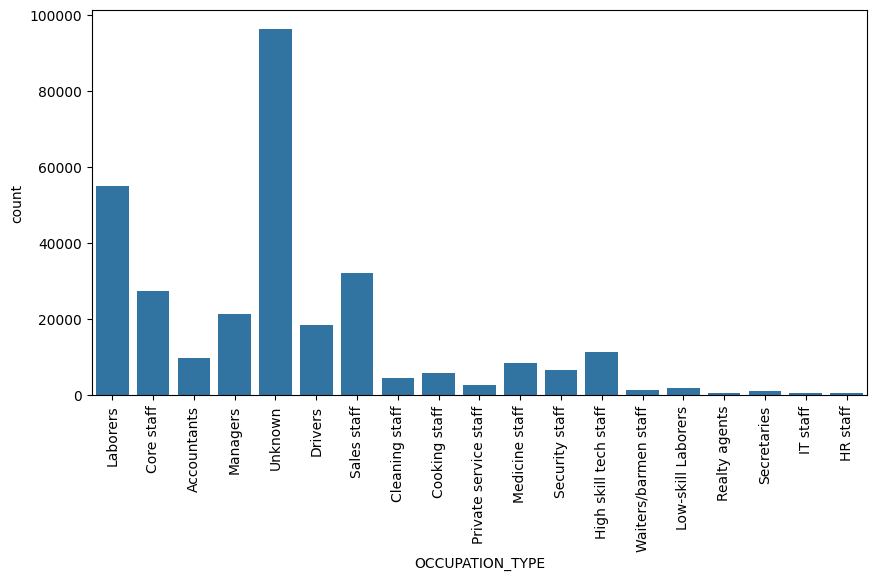

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "OCCUPATION_TYPE")
plt.xticks(rotation = 90)
plt.show()

**Observation**
- If you look at the graph, `Laborers` have the highest number of loan applicants
- For imputation, it is better to leave the data as is (missing values ​​are 31.35%) and not to impute by some constant like mode or min/max median if it is a numeric column, as this can skew the data in further calculations.

There is also the possibility of imputation using more "smart" methods, but we will explore them later, and for now we are doing what we can with some very simple transformations.

### Analysis of `EXT_SOURCE_3`

- missing values ​​= 19.83%

In [ ]:
df.EXT_SOURCE_3.value_counts().head()

EXT_SOURCE_3
0.75    1460
0.71    1315
0.69    1276
0.67    1191
0.65    1154
Name: count, dtype: int64

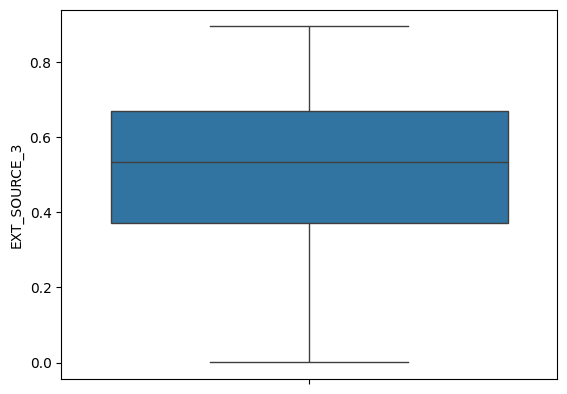

In [ ]:
sns.boxplot(df.EXT_SOURCE_3)
plt.show()

Getting percentile values ​​for `EXT_SOURCE_3`

In [ ]:
df.EXT_SOURCE_3.quantile(q = [0.25,0.5,0.75,1])

0.25   0.37
0.50   0.54
0.75   0.67
1.00   0.90
Name: EXT_SOURCE_3, dtype: float64

Most repeated value in `EXT_SOURCE_3

In [ ]:
df.EXT_SOURCE_3.mode()[0]

np.float64(0.746300213050371)

Checking the average value of `EXT_SOURCE_3`

In [ ]:
df.EXT_SOURCE_3.mean()

np.float64(0.5108529061799658)

**Observation**
- Looking at the scatterplot, the median is 0.535276
- The most frequently occurring value is 0.74630
- The mean is 0.51085
- Although the mean and median are closer and can be used for imputation, since the percentage missing is higher (19.83%), it is better to leave the data as is and not perform imputation. If the method requires imputation, we can impute the data using the median and create another column that indicates which values ​​were imputed.

# Analysis of AMT_REQ_CREDIT_BUREAU columns with missing values

### Analysis of `AMT_REQ_CREDIT_BUREAU_YEAR`

In [ ]:
amt_req_credit_cols = [
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_HOUR'
]

In [ ]:
null_df[null_df.column_name.isin(amt_req_credit_cols)]

column_name  null_count  null_percentage
116  AMT_REQ_CREDIT_BUREAU_HOUR       41519            13.50
117   AMT_REQ_CREDIT_BUREAU_DAY       41519            13.50
118  AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
119   AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
120   AMT_REQ_CREDIT_BUREAU_QRT       41519            13.50
121  AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50

Let's look at the summary statistics for the columns

In [ ]:
df[amt_req_credit_cols].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
count                   265992.00                  265992.00   
mean                         1.90                       0.27   
std                          1.87                       0.79   
min                          0.00                       0.00   
25%                          0.00                       0.00   
50%                          1.00                       0.00   
75%                          3.00                       0.00   
max                         25.00                     261.00   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
count                  265992.00                   265992.00   
mean                        0.27                        0.03   
std                         0.92                        0.20   
min                         0.00                        0.00   
25%                         0.00                        0.00   
50%                         0.00                        0.00   
75%                         0.00                        0.00   
max                        27.00                        8.00   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
count                  265992.00                   265992.00  
mean                        0.01                        0.01  
std                         0.11                        0.08  
min                         0.00                        0.00  
25%                         0.00                        0.00  
50%                         0.00                        0.00  
75%                         0.00                        0.00  
max                         9.00                        4.00

In [ ]:
df[amt_req_credit_cols].mode()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.00                       0.00   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.00                        0.00   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
0                       0.00                        0.00

**Observation**
- The mean, mode and median are different and given that the missing percentage is 13.50%, it is better to leave the data as is and not perform imputations to avoid severe distortion

# Check for columns with NULL values ​​> 0% and < 1%

Creating a `null_df_under1` dataframe with percentage of missing values ​​> 0% and < 1% in each column

In [ ]:
null_df_under1 = null_df[(null_df['null_percentage'] > 0) & (null_df['null_percentage'] < 1)]

In [ ]:
null_df_under1.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
11           NAME_TYPE_SUITE        1292             0.42
92  DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
91  OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
93  OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94  DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42              EXT_SOURCE_2         660             0.21
10           AMT_GOODS_PRICE         278             0.09

## Analysis of the `NAME_TYPE_SUITE` column

In [ ]:
null_df_under1[null_df_under1.column_name == 'NAME_TYPE_SUITE']

column_name  null_count  null_percentage
11  NAME_TYPE_SUITE        1292             0.42

In [ ]:
df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

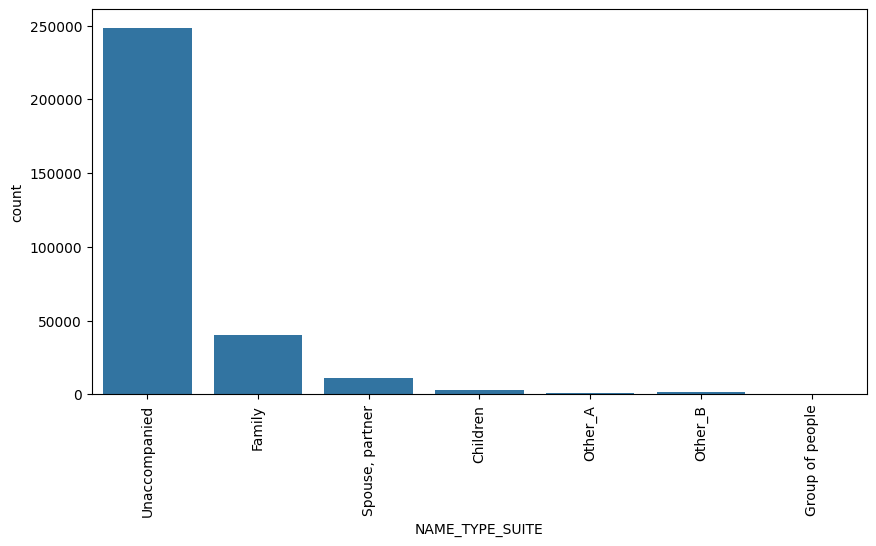

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "NAME_TYPE_SUITE")
plt.xticks(rotation = 90)
plt.show()

**Observation**
- Looking at the graph, the `Unaccompanied` category has the highest number of loan applicants. So, most of the borrowers decide to apply for a loan without an escort.
- We can continue to impute `Unaccompanied` in the dataframe, but it is better to prefer the second option.
- We could also impute the data with the value `NA` since this column is categorical.
- Similarly, if less than 1% of the data is missing in a column, we can omit it. But if we remove all the data in all the columns where <=1% of the data is missing, we may remove too much data. So I mostly keep the data as much as possible.

In [ ]:
df['NAME_TYPE_SUITE'].fillna('NA', inplace=True)

## Analysis of `OBS_30_CNT_SOCIAL_CIRCLE`

In [ ]:
null_df_under1[null_df_under1.column_name == 'OBS_30_CNT_SOCIAL_CIRCLE']

column_name  null_count  null_percentage
91  OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33

In [ ]:
df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts().head(10)

OBS_30_CNT_SOCIAL_CIRCLE
0.00    163910
1.00     48783
2.00     29808
3.00     20322
4.00     14143
5.00      9553
6.00      6453
7.00      4390
8.00      2967
9.00      2003
Name: count, dtype: int64

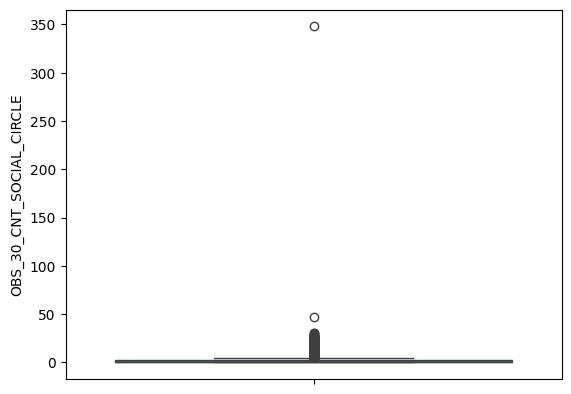

In [ ]:
sns.boxplot(df.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

Calculation of percentiles `OBS_30_CNT_SOCIAL_CIRCLE`

In [ ]:
df.OBS_30_CNT_SOCIAL_CIRCLE.quantile(q = [0.25,0.5,0.75,1])

0.25     0.00
0.50     0.00
0.75     2.00
1.00   348.00
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

Most repeated value in `OBS_30_CNT_SOCIAL_CIRCLE`

In [ ]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0]

np.float64(0.0)

Average value of `OBS_30_CNT_SOCIAL_CIRCLE`

In [ ]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mean()

np.float64(1.4222454239942575)

**Observation**
- Looking at the scatterplot, the median is 0.0
- The most frequently occurring value is 0.0
- The mean is 1.4222
- There are two outliers at 50 and 350.
- The median and mode are close (given the range of data in this column) and can be used for imputation. This will not introduce bias since the percentage of missing values ​​is small (0.33%)

In [ ]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

Analysis and filling of blank values ​​in columns with a small percentage of missing values



- DEF_30_CNT_SOCIAL_CIRCLE
- EXT_SOURCE_2
- OBS_60_CNT_SOCIAL_CIRCLE
- DEF_60_CNT_SOCIAL_CIRCLE
- AMT_GOODS_PRICE

In [ ]:
def missing_lt1_analysis(column):
    print('Number of missing values ​​in a column\n')
    display(null_df_under1[null_df_under1.column_name == column])
    print('\nNumber of occurrences of the top 5 frequency values ​​in the column\n')
    display(df[column].value_counts().head())

    sns.boxplot(df[column])
    plt.show()

    print(f"\nColumn percentiles\n")
    display(df[column].quantile(q = [0.25,0.5,0.75,0.99,1]))
    print(f"\nMost frequent column value\n")
    display(df[column].mode()[0])
    print(f"\nAverage column value\n")
    display(df[column].mean())

## Analysis of `DEF_30_CNT_SOCIAL_CIRCLE`

Number of missing values ​​in a column



column_name  null_count  null_percentage
92  DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33


Number of occurrences of the top 5 frequency values ​​in the column



DEF_30_CNT_SOCIAL_CIRCLE
0.00    271324
1.00     28328
2.00      5323
3.00      1192
4.00       253
Name: count, dtype: int64

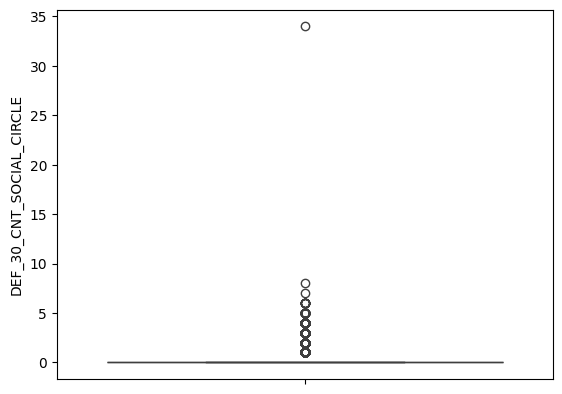


Column percentiles



0.25    0.00
0.50    0.00
0.75    0.00
0.99    2.00
1.00   34.00
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


Most frequent column value



np.float64(0.0)


Average column value



np.float64(0.1434206662533851)

In [ ]:
missing_lt1_analysis('DEF_30_CNT_SOCIAL_CIRCLE')

**Observation**
- The 99th percentile is 2. There are ~7 outliers, the largest being ~33.
- The mean and median are closer and can be used for imputation. This will not introduce bias as the percentage of missing values ​​is small (0.33%)

In [ ]:
df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

## Analysis of `EXT_SOURCE_2`

Number of missing values ​​in a column



column_name  null_count  null_percentage
42  EXT_SOURCE_2         660             0.21


Number of occurrences of the top 5 frequency values ​​in the column



EXT_SOURCE_2
0.29    721
0.26    417
0.27    343
0.16    322
0.27    306
Name: count, dtype: int64

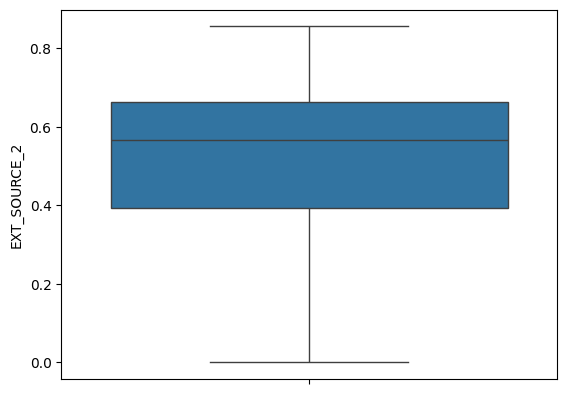


Column percentiles



0.25   0.39
0.50   0.57
0.75   0.66
0.99   0.78
1.00   0.85
Name: EXT_SOURCE_2, dtype: float64


Most frequent column value



np.float64(0.2858978721410488)


Average column value



np.float64(0.5143926741308462)

In [ ]:
missing_lt1_analysis('EXT_SOURCE_2')

**Observations**
- There are no outliers in the data set
- The mean and median are close and can be used for imputation. This will not introduce bias as the percentage of missing values ​​is small (0.21%)

In [ ]:
df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].median(), inplace=True)

## Analysis of `OBS_60_CNT_SOCIAL_CIRCLE`

Number of missing values ​​in a column



column_name  null_count  null_percentage
93  OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33


Number of occurrences of the top 5 frequency values ​​in the column



OBS_60_CNT_SOCIAL_CIRCLE
0.00    164666
1.00     48870
2.00     29766
3.00     20215
4.00     13946
Name: count, dtype: int64

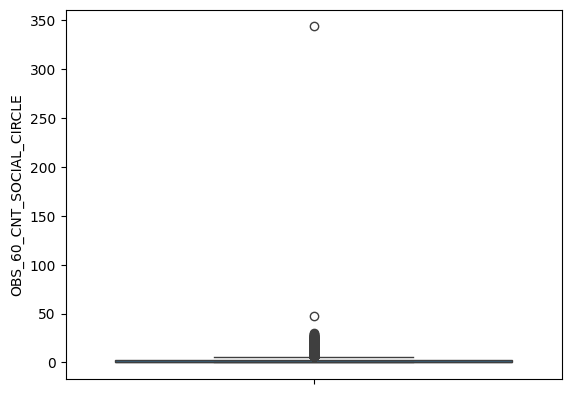


Column percentiles



0.25     0.00
0.50     0.00
0.75     2.00
0.99    10.00
1.00   344.00
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


Most frequent column value



np.float64(0.0)


Average column value



np.float64(1.4052921791901856)

In [ ]:
missing_lt1_analysis('OBS_60_CNT_SOCIAL_CIRCLE')

**Observation**
- The 99th percentile is 10. There is a noticeable outlier around 50 and 350.
- The mean and median are closer and can be used for imputation. This will not introduce bias because the percentage of missing values ​​is small (0.33%)

In [ ]:
df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

## Analysis of `DEF_60_CNT_SOCIAL_CIRCLE`

Number of missing values ​​in a column



column_name  null_count  null_percentage
94  DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33


Number of occurrences of the top 5 frequency values ​​in the column



DEF_60_CNT_SOCIAL_CIRCLE
0.00    280721
1.00     21841
2.00      3170
3.00       598
4.00       135
Name: count, dtype: int64

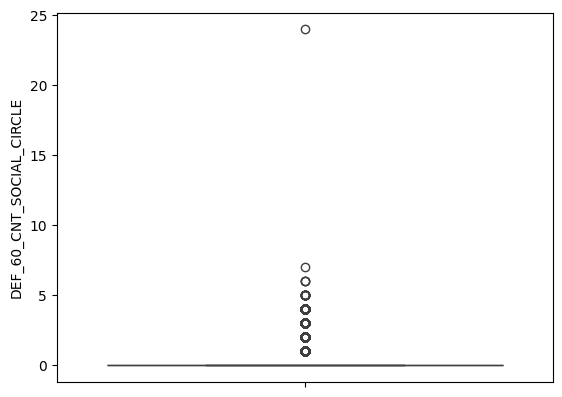


Column percentiles



0.25    0.00
0.50    0.00
0.75    0.00
0.99    2.00
1.00   24.00
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


Most frequent column value



np.float64(0.0)


Average column value



np.float64(0.10004894123788705)

In [ ]:
missing_lt1_analysis('DEF_60_CNT_SOCIAL_CIRCLE')

**Observation**
- The 99th percentile is 2. There are ~7 outliers, the largest being ~24.
- The mean and median are closer and can be used for imputation. This will not introduce bias as the percentage of missing values ​​is small (0.33%)

In [ ]:
df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

## Analysis of  `AMT_GOODS_PRICE`

Number of missing values ​​in a column



column_name  null_count  null_percentage
10  AMT_GOODS_PRICE         278             0.09


Number of occurrences of the top 5 frequency values ​​in the column



AMT_GOODS_PRICE
450000.00    26022
225000.00    25282
675000.00    24962
900000.00    15416
270000.00    11428
Name: count, dtype: int64

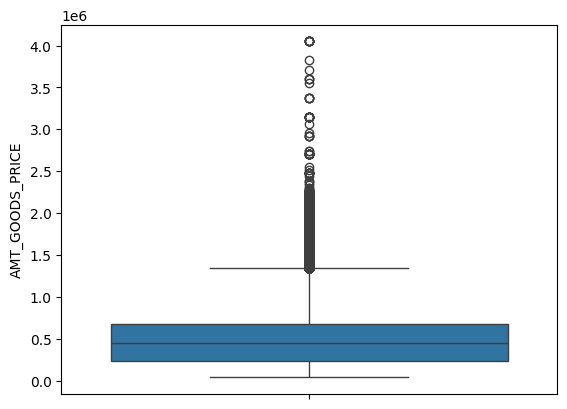


Column percentiles



0.25    238500.00
0.50    450000.00
0.75    679500.00
0.99   1800000.00
1.00   4050000.00
Name: AMT_GOODS_PRICE, dtype: float64


Most frequent column value



np.float64(450000.0)


Average column value



np.float64(538396.2074288895)

In [ ]:
missing_lt1_analysis('AMT_GOODS_PRICE')

**Observation**
- Although there are values ​​above 2500000, they cannot be considered outliers as they could be actual prices of goods
- The mean and median are exactly the same and can be used for imputation. This will not introduce bias as the percentage of missing values ​​is small (0.09%)

In [ ]:
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].median(), inplace=True)

# Dealing with incorrect/unknown data values

### Analysis of `CODE_GENDER`

Checking the value range



In [ ]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

Gender must be male or female only. A value of `XNA` may indicate that the value was not provided by the applicant or was omitted by the loan officer reviewing the application

In [ ]:
df[df['CODE_GENDER'] == 'XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
35657      141289       0    Revolving loans         XNA             1   
38566      144669       0    Revolving loans         XNA             0   
83382      196708       0    Revolving loans         XNA             0   
189640     319880       0    Revolving loans         XNA             1   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                 1             0         207000.00   382500.00   
38566                 1             2         157500.00   270000.00   
83382                 1             1         135000.00   405000.00   
189640                1             0         247500.00   540000.00   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657      19125.00        337500.00   Unaccompanied               Working   
38566      13500.00        225000.00          Family               Working   
83382      20250.00        225000.00   Unaccompanied               Working   
189640     27000.00        900000.00   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                         0.02      -20232         -10044   
38566                         0.03      -13717          -2797   
83382                         0.04      -10647          -1228   
189640                        0.04       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
35657           -10024.00            -3537           1               1   
38566            -2241.00            -4659           1               1   
83382             -183.00            -1671           1               1   
189640           -4099.00            -2326           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
35657                 1                 1           1           0   
38566                 1                 1           1           0   
83382                 1                 1           1           0   
189640                1                 1           1           0   

           OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657              Unknown             2.00                     3   
38566   Low-skill Laborers             4.00                     2   
83382           Core staff             3.00                     2   
189640             Unknown             2.00                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
35657                        0                       

Since the data looks reliable, we will check the possibility of applying the imputation method.
- There are twice as many female applicants as male applicants
- So, we will equate `CODE_GENDER` to 'F'

In [ ]:
df['CODE_GENDER_CHANGED'] = df['CODE_GENDER'].apply(lambda x: 1 if x == 'XNA' else 0)

In [ ]:
df['CODE_GENDER'] = df['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)

Checking if `XNA` is removed

In [ ]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

### Analysis of `DAYS_BIRTH`

In [ ]:
df['DAYS_BIRTH'].value_counts().head()

DAYS_BIRTH
-13749    43
-13481    42
-10020    41
-18248    41
-15771    40
Name: count, dtype: int64

There are ~17K+ unique entries, all of which appear to have negative values.

In [ ]:
df['DAYS_BIRTH'].unique()

array([ -9461, -16765, -19046, ...,  -7951,  -7857, -25061])

In [ ]:
df['DAYS_BIRTH'].nunique()

17460

In [ ]:
df['DAYS_BIRTH'].describe()

count   307511.00
mean    -16037.00
std       4363.99
min     -25229.00
25%     -19682.00
50%     -15750.00
75%     -12413.00
max      -7489.00
Name: DAYS_BIRTH, dtype: float64

Convert `Days Birth` to positive days

In [ ]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: -x if x < 0 else x)

In [ ]:
df['DAYS_BIRTH'].describe()

count   307511.00
mean     16037.00
std       4363.99
min       7489.00
25%      12413.00
50%      15750.00
75%      19682.00
max      25229.00
Name: DAYS_BIRTH, dtype: float64

All days in `DAYS_BIRTH` have positive values ​​- this may be more convenient for analysis.

#### Let's create a new column `YEARS_BIRTH` for ease of analysis

In [ ]:
df['YEARS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: round(x/365))

In [ ]:
df['YEARS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: round(x/365))

### Analysis of `NAME_FAMILY_STATUS`

In [ ]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

Gender must be male or female only. A value of `Unknown` may mean that the value was not provided by the applicant or was omitted by the loan officer reviewing the application.

In [ ]:
df[df['NAME_FAMILY_STATUS'] == 'Unknown']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
41982      148605       0    Revolving loans           M             0   
187348     317181       0    Revolving loans           F             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                 1             0         450000.00   675000.00   
187348                1             0         202500.00   585000.00   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982      33750.00        450000.00              NA  Commercial associate   
187348     29250.00        450000.00              NA  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                         0.02       12396          -1161   
187348                        0.03       12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
41982            -3265.00            -4489           1               1   
187348           -1597.00            -1571           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
41982                 1                 1           1           0   
187348                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982         Managers              NaN                     2   
187348     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
41982                         1               Insurance          0.70   
187348                        0  Business Entity Type 2          0.65   

        EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
41982            NaN                      3.00                      0.00   
187348          0.67                      1.00                      0.00   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
41982                       3.00                      0.00   
187348                      1.00                      0.00   

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
41982                  -876.00                0                0   
187348                 -654.00                0                0   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
41982                 0                1                0                0   
187348                0                0                0                1   

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
41982                 0                0                 0                 0   
187348                0                0                 0                 0   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
41982                  0                 0                 0   
187348                 0                 0                 0   

        FLAG_DOCUMENT_15 

In [ ]:
df['NAME_FAMILY_STATUS'].value_counts(normalize = True) * 100

NAME_FAMILY_STATUS
Married                63.88
Single / not married   14.78
Civil marriage          9.68
Separated               6.43
Widow                   5.23
Unknown                 0.00
Name: proportion, dtype: float64

Since the data looks reliable, we will continue to test the imputation method.
- Married applicants make up over 63% of applicants.
- So, we will equate `NAME_FAMILY_STATUS` to `Married`.

In [ ]:
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].apply(lambda x: 'Married' if x == 'Unknown' else x)

Checking if `Unknown` is removed

In [ ]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: count, dtype: int64

### Analysis of `DAYS_EMPLOYED`

In [ ]:
df['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
Name: count, dtype: int64

In [ ]:
df['DAYS_EMPLOYED'].value_counts(normalize = True) * 100

DAYS_EMPLOYED
 365243   18.01
-200       0.05
-224       0.05
-230       0.05
-199       0.05
           ... 
-11471     0.00
-12878     0.00
-10573     0.00
-12990     0.00
-14184     0.00
Name: proportion, Length: 12574, dtype: float64

In [ ]:
len(df[df['DAYS_EMPLOYED'] < 365243])

252137

In [ ]:
df[df['DAYS_EMPLOYED'] < 365243].DAYS_EMPLOYED.value_counts()

DAYS_EMPLOYED
-200      156
-224      152
-230      151
-199      151
-212      150
         ... 
-12037      1
-16554      1
-11276      1
-8348       1
-9129       1
Name: count, Length: 12573, dtype: int64

In [ ]:
df['DAYS_EMPLOYED'].unique()

array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694])

In [ ]:
df['DAYS_EMPLOYED'].nunique()

12574

**Observations**
- There are ~55K+ records for which `DAYS_EMPLOYED` is 365243 days
- The remaining 252K+ records have negative days
- There are 12,574 unique values ​​for `DAYS_EMPLOYED`

- The `DAYS_EMPLOYED` column indicates how many days before the application date the person started their current job, the applicant/loan officer should enter negative values ​​to indicate days prior to the application date.<br>
- We convert negative values ​​in `DAYS_EMPLOYED` to positive days to standardize days when used in calculations

In [ ]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: -x if x < 0 else x)

In [ ]:
df['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
365243    55374
200         156
224         152
230         151
199         151
Name: count, dtype: int64

We see that all days in `DAYS_EMPLOYED` have positive values.

**For ~55K+ records where `DAYS_EMPLOYED` is 365243 days**
- Converting this to years gives us 1000 years that are physically impossible to employ the applicant
- This corresponds to 18% of the data and cannot be an anomaly
- They could be either ``retired'' or ``unemployed'' and looking at the data our conclusion is correct

> There are two ways to handle this
>> 1) We leave the data as is and take this into account in the analysis OR <br>
>> 2) We calculate the average number of days employed excluding this category and enter it instead of the 365243 days for retirees. <br>
>> For unemployed, the number of days employed could be 0

*Note*
- We must take this scenario into account when calculating this column, as otherwise it will skew our results

In [ ]:
df[df['DAYS_EMPLOYED'] == 365243].NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Pensioner     55352
Unemployed       22
Name: count, dtype: int64

In [ ]:
days_median = df[df['DAYS_EMPLOYED'] != 365243].DAYS_EMPLOYED.median()

In [ ]:
df_days_employed = df['DAYS_EMPLOYED'].apply(lambda x: days_median if x==365243 else x)

<Axes: >

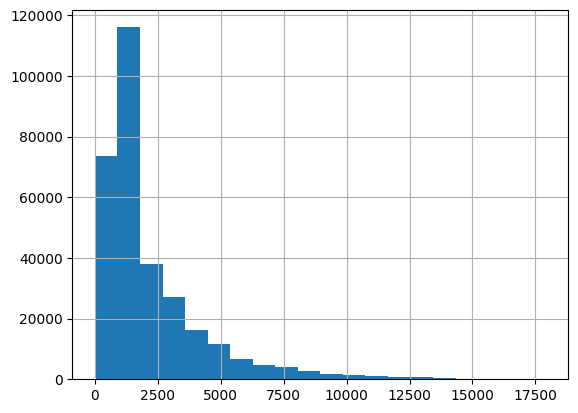

In [ ]:
df_days_employed.hist(bins=20)

<Axes: >

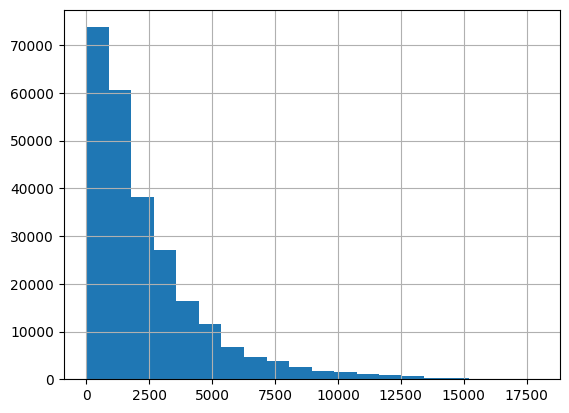

In [ ]:
df[df['DAYS_EMPLOYED'] != 365243].DAYS_EMPLOYED.hist(bins=20)

In [ ]:
df[df['DAYS_EMPLOYED'] == 365243].NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Pensioner     55352
Unemployed       22
Name: count, dtype: int64

#### Let's create a new column `YEARS_EMPLOYED` for ease of analysis

In [ ]:
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: round(x/365))

### Analysis of `DAYS_REGISTRATION`

In [ ]:
df['DAYS_REGISTRATION'].value_counts().head()

DAYS_REGISTRATION
-1.00    113
-7.00     98
-6.00     96
-4.00     92
-2.00     92
Name: count, dtype: int64

In [ ]:
df['DAYS_REGISTRATION'].value_counts(normalize = True).head()

DAYS_REGISTRATION
-1.00   0.00
-7.00   0.00
-6.00   0.00
-4.00   0.00
-2.00   0.00
Name: proportion, dtype: float64

In [ ]:
df['DAYS_REGISTRATION'].unique()

array([ -3648.,  -1186.,  -4260., ..., -16396., -14558., -14798.])

In [ ]:
df['DAYS_REGISTRATION'].nunique()

15688

Convert `DAYS_REGISTRATION` to positive days

In [ ]:
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: -x if x < 0 else x)

In [ ]:
df['DAYS_REGISTRATION'].value_counts().head()

DAYS_REGISTRATION
1.00    113
7.00     98
6.00     96
4.00     92
2.00     92
Name: count, dtype: int64

All days in `DAYS_REGISTRATION` have positive values

#### Let's create a new column `YEARS_REGISTRATION` for ease of analysis

In [ ]:
df['YEARS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: round(x/365))

### Analysis of `DAYS_ID_PUBLISH`

In [ ]:
df['DAYS_ID_PUBLISH'].value_counts().head()

DAYS_ID_PUBLISH
-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
Name: count, dtype: int64

In [ ]:
df['DAYS_ID_PUBLISH'].value_counts(normalize = True).head()

DAYS_ID_PUBLISH
-4053   0.00
-4095   0.00
-4046   0.00
-4417   0.00
-4256   0.00
Name: proportion, dtype: float64

In [ ]:
df['DAYS_ID_PUBLISH'].unique()

array([-2120,  -291, -2531, ..., -6194, -5854, -6211])

In [ ]:
df['DAYS_ID_PUBLISH'].nunique()

6168

Convert `DAYS_ID_PUBLISH` to positive days

In [ ]:
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: -x if x < 0 else x)

In [ ]:
df['DAYS_ID_PUBLISH'].value_counts().head()

DAYS_ID_PUBLISH
4053    169
4095    162
4046    161
4417    159
4256    158
Name: count, dtype: int64

All days in `DAYS_ID_PUBLISH` have positive values

#### Let's create a new column `YEARS_ID_PUBLISH` for ease of analysis

In [ ]:
df['YEARS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: round(x/365))

### Analysis of `DAYS_LAST_PHONE_CHANGE`

In [ ]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

DAYS_LAST_PHONE_CHANGE
0.00     37672
-1.00     2812
-2.00     2318
-3.00     1763
-4.00     1285
Name: count, dtype: int64

In [ ]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts(normalize = True).head()

DAYS_LAST_PHONE_CHANGE
0.00    0.12
-1.00   0.01
-2.00   0.01
-3.00   0.01
-4.00   0.00
Name: proportion, dtype: float64

In [ ]:
df['DAYS_LAST_PHONE_CHANGE'].unique()

array([-1134.,  -828.,  -815., ..., -3988., -3899., -3538.])

In [ ]:
df['DAYS_LAST_PHONE_CHANGE'].nunique()

3773

Convert `DAYS_LAST_PHONE_CHANGE` to positive days

In [ ]:
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: -x if x < 0 else x)

In [ ]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

DAYS_LAST_PHONE_CHANGE
0.00    37672
1.00     2812
2.00     2318
3.00     1763
4.00     1285
Name: count, dtype: int64

All days in `DAYS_LAST_PHONE_CHANGE` have positive values

#### Creating a new column `YEARS_LAST_PHONE_CHANGE` for ease of analysis

In [ ]:
df['YEARS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: round(x/365,0))

# Functions for automation

### Creating an `age_cat` function to categorize data containing information about years

In [ ]:
def age_cat(years):
    if years <= 20:
        return '0-20'
    elif years > 20 and years <= 30:
        return '20-30'
    elif years > 30 and years <= 40:
        return '30-40'
    elif years > 40 and years <= 50:
        return '40-50'
    elif years > 50 and years <= 60:
        return '50-60'
    elif years > 60 and years <= 70:
        return '60-70'
    elif years > 70:
        return '70+'

### Univariate (categorical vs. target) and bivariate (categorical vs. categorical) analysis (histogram) - categorical columns

In [ ]:
import matplotlib.pyplot as plt


def bi_cat_countplot(df, column, hue_column):
    unique_hue_values = df[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,6)

    pltname = f'Normalized distribution of values ​​by category: {column}'
    proportions = df.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[0], title=pltname)

    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.1f}%')

    pltname = f'Number of data by category: {column}'
    counts = df.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[1], title=pltname)

    for container in ax.containers:
      ax.bar_label(container)


def uni_cat_target_compare(df, column):
    bi_cat_countplot(df, column, hue_column='TARGET')


### Calculate the minimum and maximum deviation range for numeric columns

In [ ]:
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Max_value

# Working with outliers for numeric columns

In [ ]:
import warnings

def dist_box(dataset, column):
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")

      plt.figure(figsize=(16,6))

      plt.subplot(1,2,1)
      sns.distplot(dataset[column], color = 'purple')
      pltname = 'Distribution schedule for ' + column
      plt.ticklabel_format(style='plain', axis='x')
      plt.title(pltname)

      plt.subplot(1,2,2)
      red_diamond = dict(markerfacecolor='r', marker='D')
      sns.boxplot(y = column, data = dataset, flierprops = red_diamond)
      pltname = 'Boxplot for ' + column
      plt.title(pltname)

      plt.show()

### Analysis of `CNT_CHILDREN`

In [ ]:
df['CNT_CHILDREN'].value_counts().sort_values(ascending = False);

In [ ]:
(df['CNT_CHILDREN'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

CNT_CHILDREN
0   70.04
1   19.88
2    8.70
3    1.21
4    0.14
Name: proportion, dtype: float64

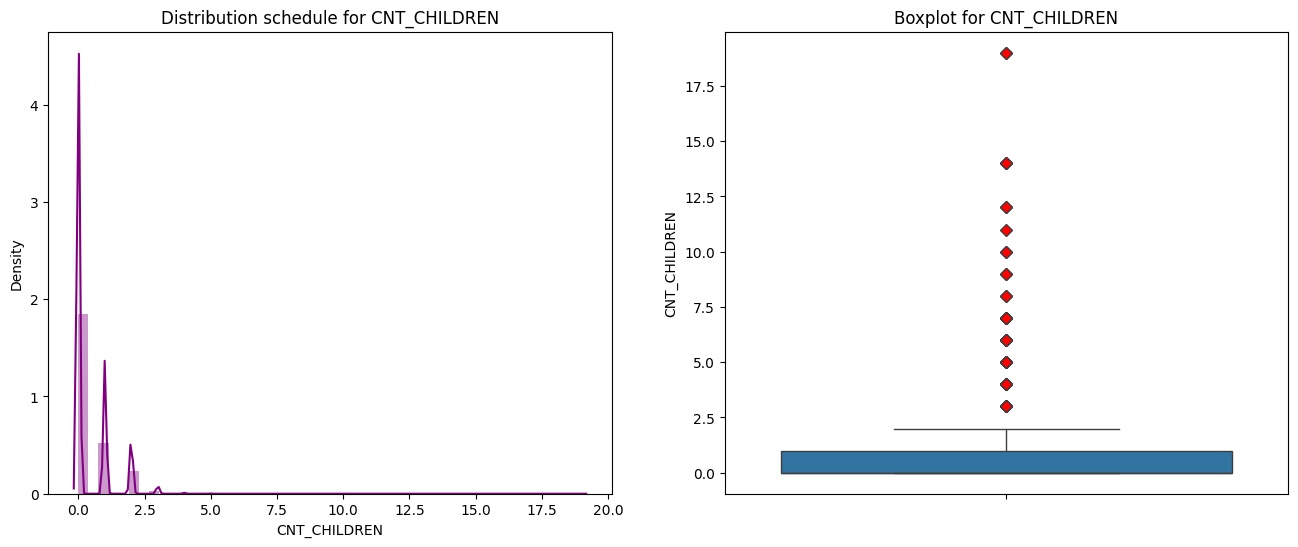

In [ ]:
dist_box(df,'CNT_CHILDREN')

Let's calculate the IQR (Inter Quartile range)

In [ ]:
Q1 = df['CNT_CHILDREN'].quantile(0.25)
Q3 = df['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.0


In [ ]:
Q1, Q3

(np.float64(0.0), np.float64(1.0))

The values ​​*before* (Q1 - 1.5 * IQR) and *after* (Q3 + 1.5 * IQR) are outliers

In [ ]:
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Minimum value up to which emissions exist: {}".format(Min_value))
print("Maximum value after which emissions exist: {}".format(Max_value))

Minimum value up to which emissions exist: -1.5
Maximum value after which emissions exist: 2.5


In [ ]:
df[df['CNT_CHILDREN'].isin(range(10,20))].YEARS_BIRTH

34545     47
80948     39
132585    31
155369    30
171125    38
176011    49
183878    56
186820    41
265784    28
267998    42
Name: YEARS_BIRTH, dtype: int64

In [ ]:
df[df['CNT_CHILDREN'].isin([10])][['SK_ID_CURR', 'CNT_CHILDREN', 'YEARS_BIRTH']]

SK_ID_CURR  CNT_CHILDREN  YEARS_BIRTH
132585     253779            10           31
186820     316580            10           41

**Observation**
- Looking at the data, we see that the number of applicants with more than 7 children is very minimal (2 or 3 in each category)
- Also, looking at the data for applicants with 10 children, the applicants are only 31 and 41 years old respectively. This looks like an isolated case and can be considered as an outlier
- Both the distribution and range plots clearly show that values ​​above 2.5 are outliers.

**Conclusion**
- Applicants with 3 or more children are outliers. We can provide a special analysis for these cases.

### Analysis of `AMT_INCOME_TOTAL`

In [ ]:
df['AMT_INCOME_TOTAL'].value_counts().sort_values(ascending = False).head()

AMT_INCOME_TOTAL
135000.00    35750
112500.00    31019
157500.00    26556
180000.00    24719
90000.00     22483
Name: count, dtype: int64

In [ ]:
(df['AMT_INCOME_TOTAL'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

AMT_INCOME_TOTAL
135000.00   11.63
112500.00   10.09
157500.00    8.64
180000.00    8.04
90000.00     7.31
Name: proportion, dtype: float64

In [ ]:
df['AMT_INCOME_TOTAL'].describe(percentiles = [0.75,0.99,0.999])

count      307511.00
mean       168797.92
std        237123.15
min         25650.00
50%        147150.00
75%        202500.00
99%        472500.00
99.9%      900000.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

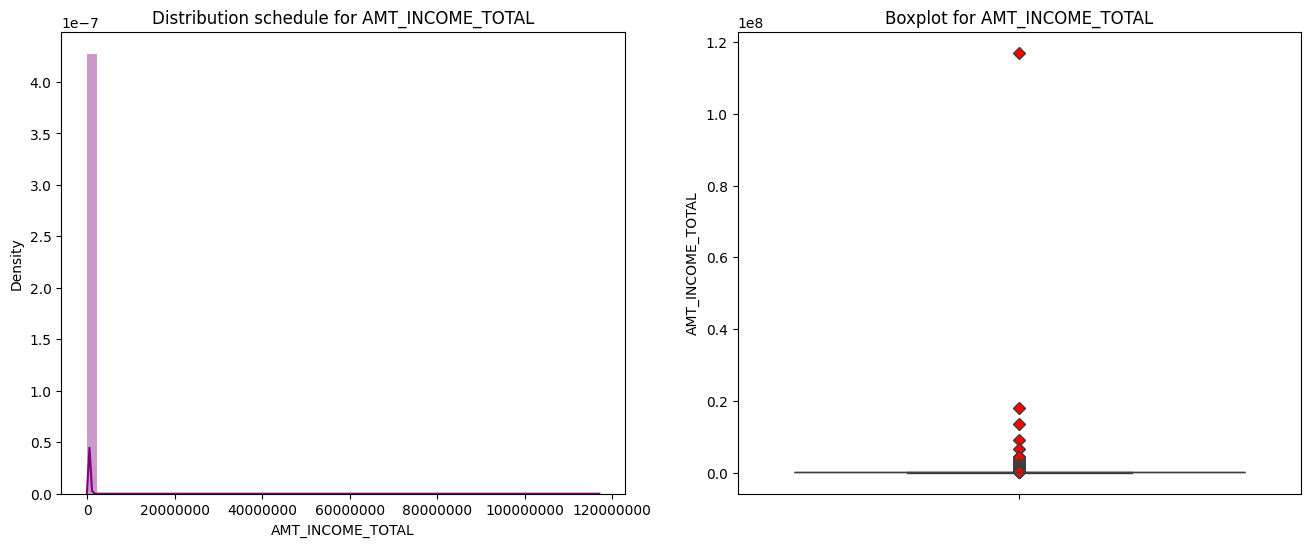

In [ ]:
dist_box(df,'AMT_INCOME_TOTAL')

- The final result graphs are very thin, and we can see an outlier of about ~120 million.
- Let's plot the graph, considering only the income below the 99.9% value, i.e. 900 thousand.

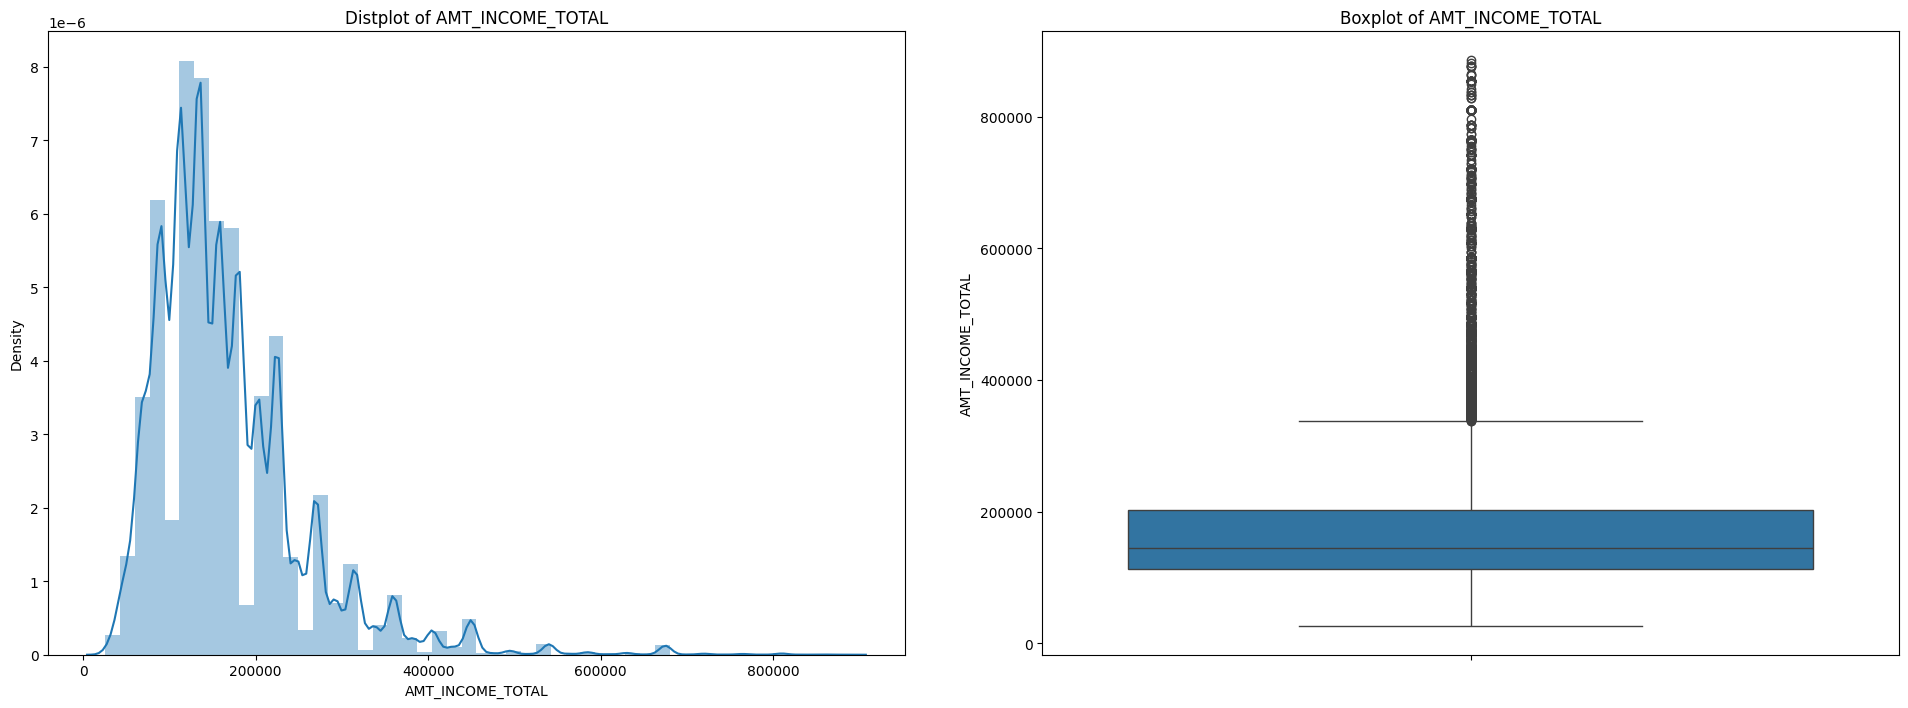

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Distplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.subplot(122)
    sns.boxplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Boxplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.tight_layout(pad = 4)
    plt.show()

Now we can clearly see the distribution and range of the data in both graphs.
- This means that the values ​​above 900 thousand UAH of income are clearly outliers

In [ ]:
df[df['AMT_INCOME_TOTAL'] > 900000].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
1504     101769       0    Revolving loans           M             1   
1723     102015       0         Cash loans           F             0   
3371     103938       0         Cash loans           F             0   
4603     105384       0    Revolving loans           F             1   
5673     106637       0         Cash loans           M             1   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1504                1             0        1080000.00   180000.00   
1723                1             0        1935000.00   269550.00   
3371                0             1        1350000.00  2410380.00   
4603                1             0        1350000.00   405000.00   
5673                1             3         967500.00   450000.00   

      AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
1504      9000.00        180000.00   Unaccompanied  Commercial associate   
1723     10534.50        225000.00   Unaccompanied             Pensioner   
3371    109053.00       2250000.00              NA  Commercial associate   
4603     20250.00        405000.00   Unaccompanied  Commercial associate   
5673     30073.50        450000.00   Unaccompanied  Commercial associate   

                NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1504               Higher education            Married  House / apartment   
1723  Secondary / secondary special            Married  House / apartment   
3371               Higher education            Married  House / apartment   
4603               Higher education            Married  House / apartment   
5673               Higher education            Married  House / apartment   

      REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
1504                        0.07       13633           5536   
1723                        0.01       18636         365243   
3371                        0.07       12213            843   
4603                        0.02       14781           4768   
5673                        0.05       11901            546   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
1504               3.00             4971           1               1   
1723            3401.00             2168           1               0   
3371             757.00             4132           1               1   
4603            3469.00             4045           1               1   
5673            2932.00              215           1               1   

      FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
1504                0                 1           0           0   
1723                0                 1           1           0   
3371                0                 1           1           0   
4603                0                 1           0           0   
5673                0                 1           0           0   

     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
1504         Unknown             2.00                     1   
1723         Unknown             2.00                     2   
3371        Managers             3.00                     1   
4603        Managers             2.00                     2   
5673        Managers             5.00                     1   

      REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
1504                            1                     FRIDAY   
1723                            2                     MONDAY   
3371                            1                     SUNDAY   
4603                            2                    TUESDAY   
5673                            1                     MONDAY   

      HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
1504                       13                           0   
1723                       11                           0   
3371                       13                           0   
4603          

**Observation**
- Looking at the data, we see that income over 900k UAH (99.9% of the value) is an outlier
- Both the scatterplot and the rangeplot clearly show us the same trend

**Conclusion**
- Applicants with income over 900k UAH (99.9% of the value) are outliers

### Analysis of `CNT_FAM_MEMBERS`

In [ ]:
def outliers_analysis(df, column):
  display(df[column].describe(percentiles = [0.75,0.99,0.9999]))
  dist_box(df, column)

count    307509.00
mean          2.15
std           0.91
min           1.00
50%           2.00
75%           3.00
99%           5.00
99.99%        8.00
max          20.00
Name: CNT_FAM_MEMBERS, dtype: float64

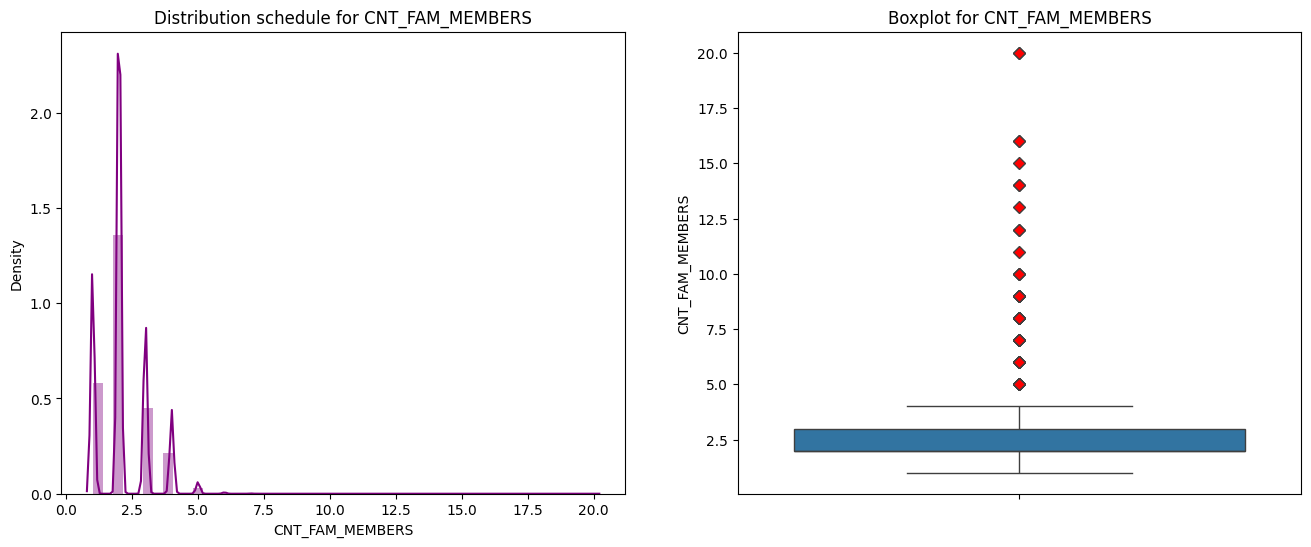

In [ ]:
outliers_analysis(df, 'CNT_FAM_MEMBERS')

- For family members of 5 and above, the results are sparse, and there is a clear outlier of about 20
- Only 2 or 3 applicants with more than 10 family members
- Let's build a graph considering only family members whose number does not exceed 99.9%, i.e. 8

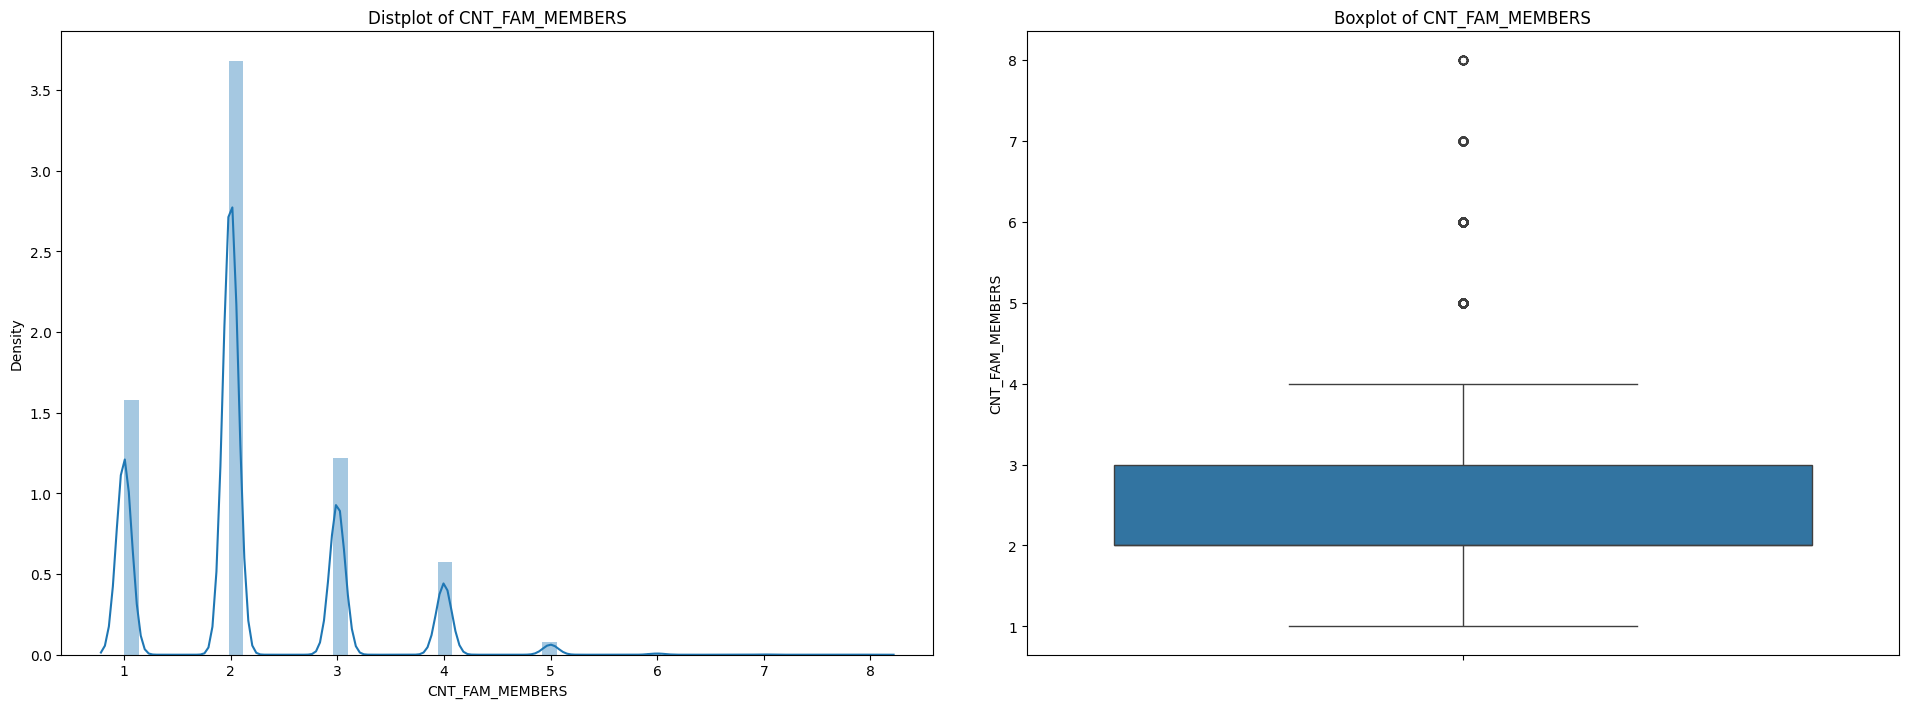

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(df[df['CNT_FAM_MEMBERS'] <= 8].CNT_FAM_MEMBERS)
    pltname = 'Distplot of ' + 'CNT_FAM_MEMBERS'
    plt.title(pltname)

    plt.subplot(122)
    sns.boxplot(df[df['CNT_FAM_MEMBERS'] <= 8].CNT_FAM_MEMBERS)
    pltname = 'Boxplot of ' + 'CNT_FAM_MEMBERS'
    plt.title(pltname)

    plt.tight_layout(pad = 4)
    plt.show()

Now we can clearly see the distribution and range of the data in both graphs.
- This means that applicants who have 5 or more family members clearly stand out from the rest

## Analysis of `AMT_ANNUITY`

count    307499.00
mean      27108.57
std       14493.74
min        1615.50
50%       24903.00
75%       34596.00
99%       70006.50
99.99%   213291.00
max      258025.50
Name: AMT_ANNUITY, dtype: float64

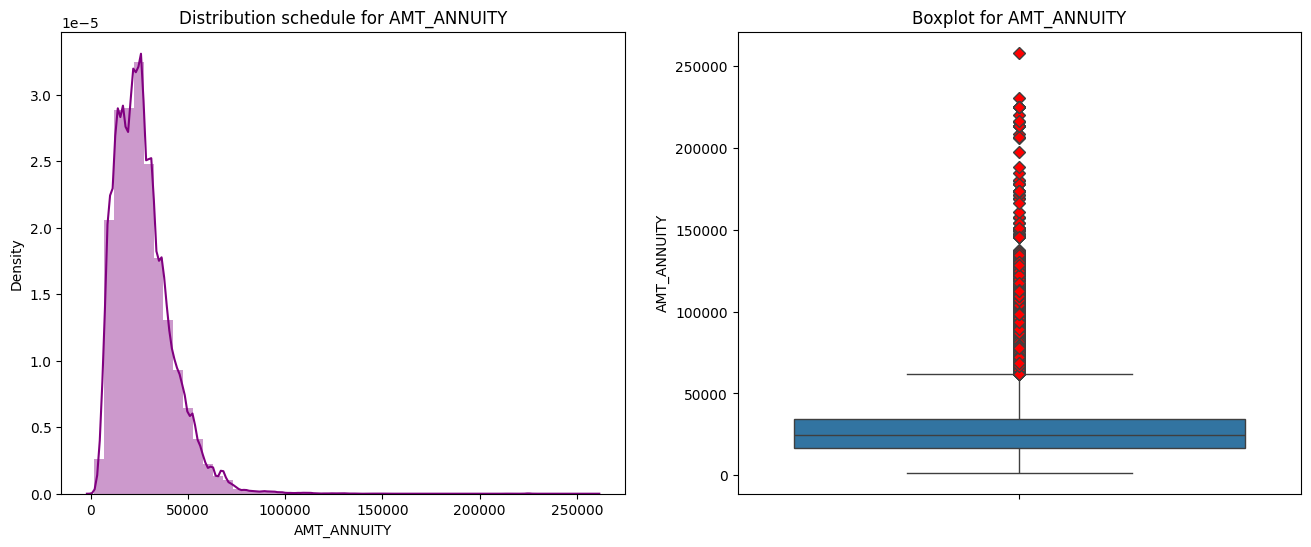

In [ ]:
outliers_analysis(df, 'AMT_ANNUITY')

In [ ]:
Q1 = df['AMT_ANNUITY'].quantile(0.25)
Q3 = df['AMT_ANNUITY'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

18072.0


*Values* *before* (Q1 - 1.5 * IQR) and *after* (Q3 + 1.5 * IQR) are outliers

In [ ]:
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Minimum value up to which emissions exist: {}".format(Min_value))
print("Maximum value after which emissions exist: {}".format(Max_value))

Minimum value up to which emissions exist: -1.5
Maximum value after which emissions exist: 2.5


- As can be seen from the scatter plot and range plot, there is a tendency towards outliers after the value 61704.0 (this value is obtained by `Max_value` using IQR formulas).
- We can verify the same by reproducing the same plots for the outlier value as shown below

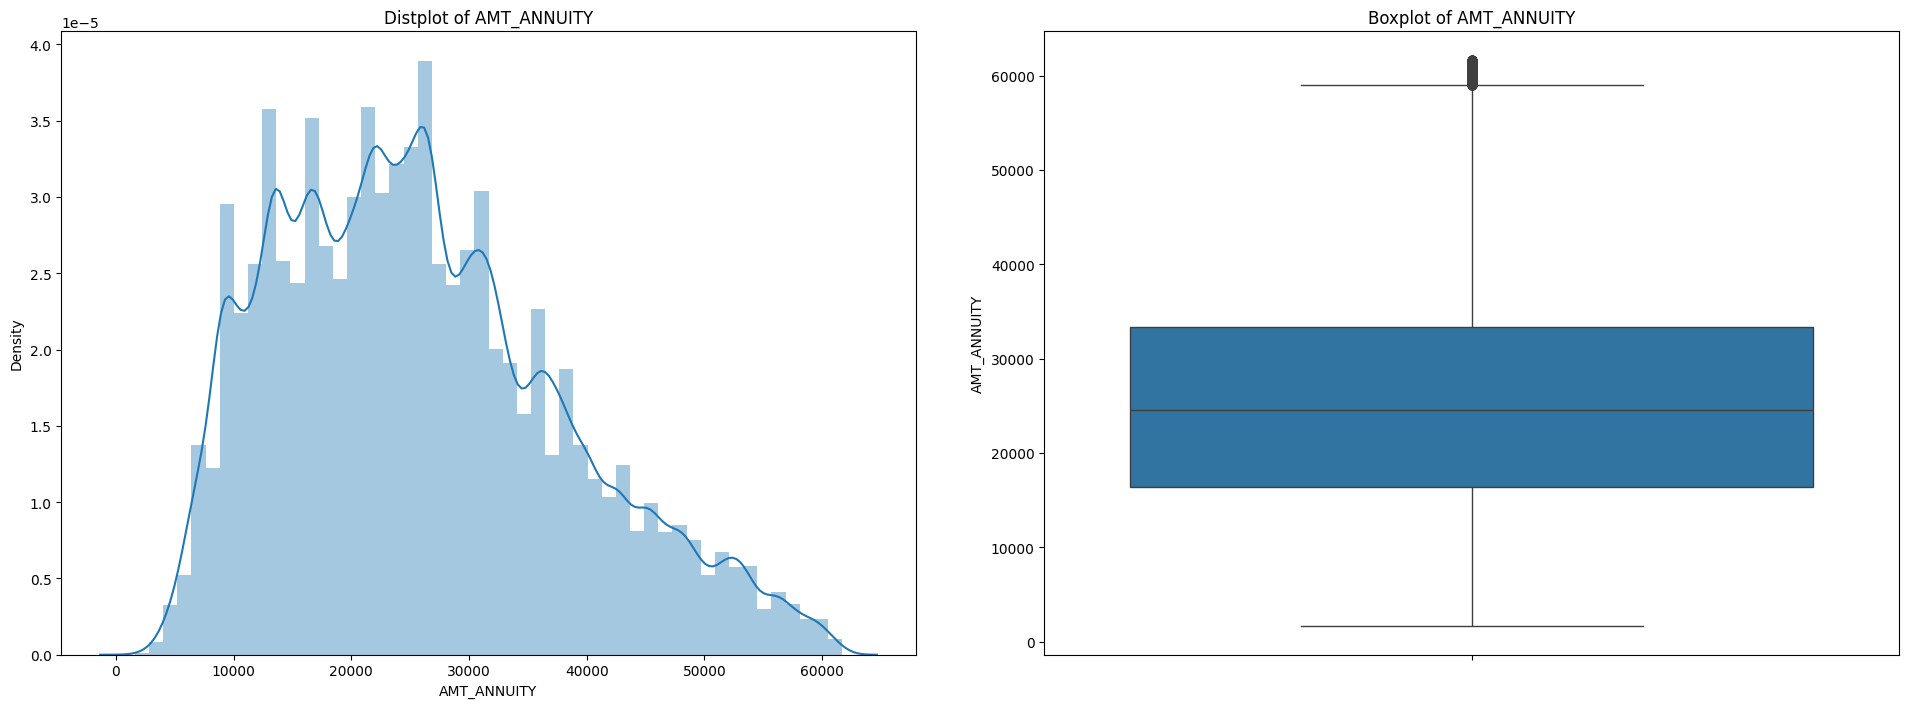

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(df[df['AMT_ANNUITY'] <= 61704.0].AMT_ANNUITY)
    pltname = 'Distplot of ' + 'AMT_ANNUITY'
    plt.title(pltname)

    plt.subplot(122)
    sns.boxplot(df[df['AMT_ANNUITY'] <= 61704.0].AMT_ANNUITY)
    pltname = 'Boxplot of ' + 'AMT_ANNUITY'
    plt.title(pltname)

    plt.tight_layout(pad = 4)
    plt.show()

**Observation**
- As can be seen from the scatterplot and rangeplot, outliers tend to exist after the value 61704 (outlier values ​​are obtained by `Max_value` using IQR formulas)

**Conclusion**
- Applicants with `AMT_ANNUITY` above 61704 (calculated using IQR) are outliers

# Binning continuous columns for analysis

### Categorizing the `AMT_GOODS_PRICE` column

In [ ]:
df['AMT_GOODS_PRICE'].value_counts().sort_values(ascending = False).head()

AMT_GOODS_PRICE
450000.00    26300
225000.00    25282
675000.00    24962
900000.00    15416
270000.00    11428
Name: count, dtype: int64

In [ ]:
(df['AMT_GOODS_PRICE'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

AMT_GOODS_PRICE
450000.00   8.55
225000.00   8.22
675000.00   8.12
900000.00   5.01
270000.00   3.72
Name: proportion, dtype: float64

In [ ]:
df['AMT_GOODS_PRICE'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count     307511.00
mean      538316.29
std       369288.98
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
99%      1800000.00
99.99%   2933964.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

Let's divide the values ​​in `AMT_GOODS_PRICE` into 5 bins and create a new column `AMT_GOODS_PRICE_CATEGORY`.

In [ ]:
df['AMT_GOODS_PRICE_CATEGORY'] = pd.cut(df['AMT_GOODS_PRICE'],
                                        bins = 5, labels = ['very low', 'low', 'medium', 'high', 'very high'])

In [ ]:
df['AMT_GOODS_PRICE_CATEGORY'].value_counts()

AMT_GOODS_PRICE_CATEGORY
very low     247251
low           56087
medium         4108
high             47
very high        18
Name: count, dtype: int64

### Categorization of `YEARS_BIRTH` column

We will classify `YEARS_BIRTH` instead of `DAYS_BIRTH` because years are easier to interpret than days.

In [ ]:
df['YEARS_BIRTH'].value_counts().sort_values(ascending = False).head()

YEARS_BIRTH
39    9023
38    8793
37    8727
40    8602
41    8495
Name: count, dtype: int64

In [ ]:
(df['YEARS_BIRTH'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

YEARS_BIRTH
39   2.93
38   2.86
37   2.84
40   2.80
41   2.76
Name: proportion, dtype: float64

In [ ]:
df['YEARS_BIRTH'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count    307511.00
mean         43.94
std          11.96
min          21.00
25%          34.00
50%          43.00
75%          54.00
99%          67.00
99.99%       69.00
max          69.00
Name: YEARS_BIRTH, dtype: float64

Let's categorize the values ​​from `YEARS_BIRTH` into a new column `YEARS_BIRTH_CATEGORY`.

In [ ]:
df['YEARS_BIRTH_CATEGORY'] = df['YEARS_BIRTH'].apply(age_cat)

In [ ]:
df['YEARS_BIRTH_CATEGORY'].value_counts().sort_values(ascending = False)

YEARS_BIRTH_CATEGORY
30-40    82770
40-50    75509
50-60    67955
20-30    48869
60-70    32408
Name: count, dtype: int64

### Categorization of `YEARS_REGISTRATION` column

We will classify `YEARS_REGISTRATION` instead of `DAYS_REGISTRATION` because years are easier to interpret than days.

In [ ]:
df['YEARS_REGISTRATION'].value_counts().sort_values(ascending = False).head()

YEARS_REGISTRATION
1     15661
2     15564
3     13894
13    12866
12    12697
Name: count, dtype: int64

In [ ]:
(df['YEARS_REGISTRATION'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

YEARS_REGISTRATION
1    5.09
2    5.06
3    4.52
13   4.18
12   4.13
Name: proportion, dtype: float64

In [ ]:
df['YEARS_REGISTRATION'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count    307511.00
mean         13.66
std           9.66
min           0.00
25%           6.00
50%          12.00
75%          20.00
99%          38.00
99.99%       54.25
max          68.00
Name: YEARS_REGISTRATION, dtype: float64

Let's categorize the values ​​from `YEARS_REGISTRATION` into a new column `YEARS_REGISTRATION_CATEGORY`.

In [ ]:
df['YEARS_REGISTRATION_CATEGORY'] = df['YEARS_REGISTRATION'].apply(age_cat)

In [ ]:
df['YEARS_REGISTRATION_CATEGORY'].value_counts().sort_values(ascending = False)

YEARS_REGISTRATION_CATEGORY
0-20     230697
20-30     59288
30-40     16051
40-50      1406
50-60        60
60-70         9
Name: count, dtype: int64

# Storing updated data with compression

In [ ]:
filename = "drive/MyDrive/ML/application_data_processed"
compression_options = dict(method='zip', archive_name=f'{filename}.csv')
df.to_csv(f'{filename}.zip', compression=compression_options, index=False)

# Checking for imbalance for the target column `TARGET`

In [ ]:
df['TARGET'].value_counts().sort_values(ascending = False)

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [ ]:
df['TARGET'].value_counts(normalize = True).sort_values(ascending = False) * 100

TARGET
0   91.93
1    8.07
Name: proportion, dtype: float64

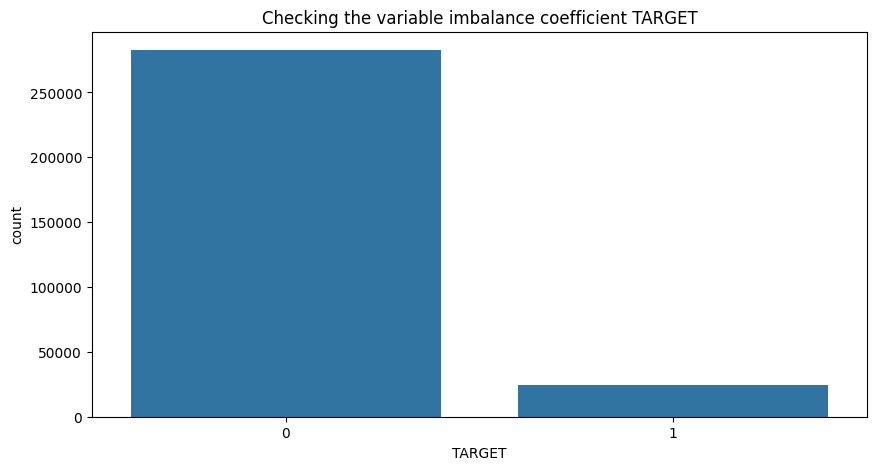

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['TARGET'], data = df)
plt.title('Checking the variable imbalance coefficient TARGET')
plt.show()

**Observations**

- We have an imbalance in the `TARGET` variable based on % of observations
- `TARGET` value 1 is a customer who is in payment difficulties (more than X days late on at least one of the first Y payments on the loan). This is only 8.07% of the data
- `TARGET` value 0 is all other cases except 1. This is 91.93% of the data

# Data distribution based on `TARGET`

### Create a new data frame with `TARGET` value 1
- `TARGET` value 1 represents a customer with payment difficulties (he/she is more than X days late on at least one of the first Y payments on the loan). This is only 8.07% of the data

In [ ]:
df1 = df[df['TARGET'] == 1]

In [ ]:
df1.TARGET.value_counts()

TARGET
1    24825
Name: count, dtype: int64

### Create a new data frame with `TARGET` value 0
- `TARGET` value 0 represents all cases other than 1. This is 91.93% of the data

In [ ]:
df0 = df[df['TARGET'] == 0]

In [ ]:
df0.TARGET.value_counts()

TARGET
0    282686
Name: count, dtype: int64

# Univariate analysis of categorical variables

### Analysis of the `NAME_CONTRACT_TYPE` column

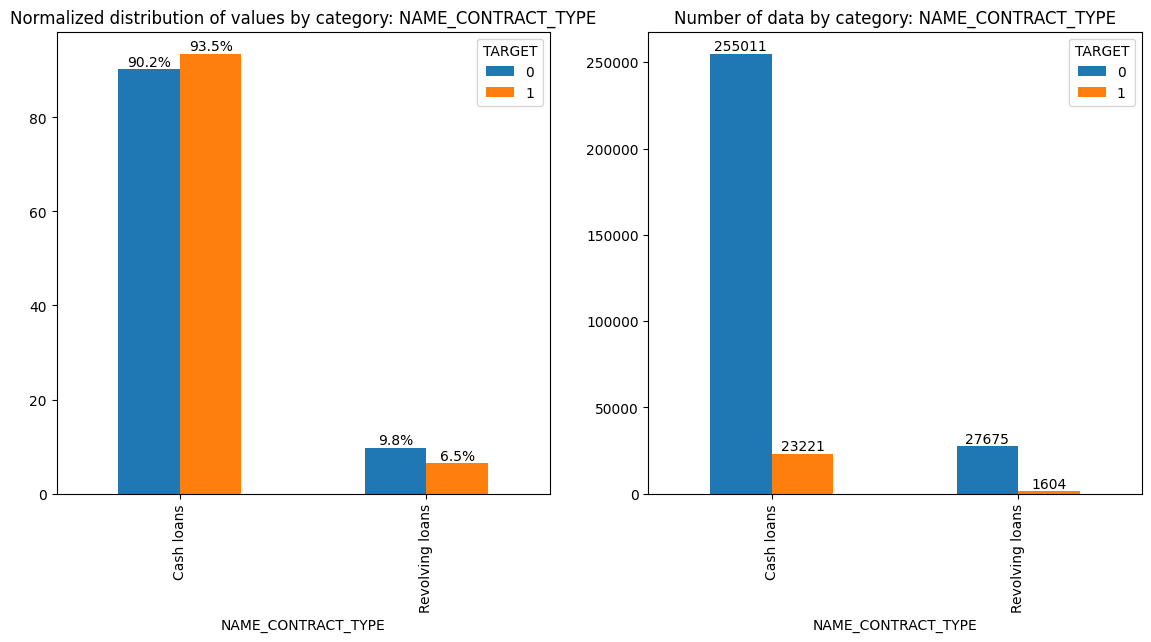

In [ ]:
uni_cat_target_compare(df, 'NAME_CONTRACT_TYPE')

**Observation**

- Looking at the histograms, we do not see any significant differences in `NAME_CONTRACT_TYPE` between customers who have difficulty paying and customers who pay on time

**Conclusion**

- The `NAME_CONTRACT_TYPE` column does not provide any compelling evidence in favor of customers who have difficulty paying OR pay on time

### Analysis of `CODE_GENDER`

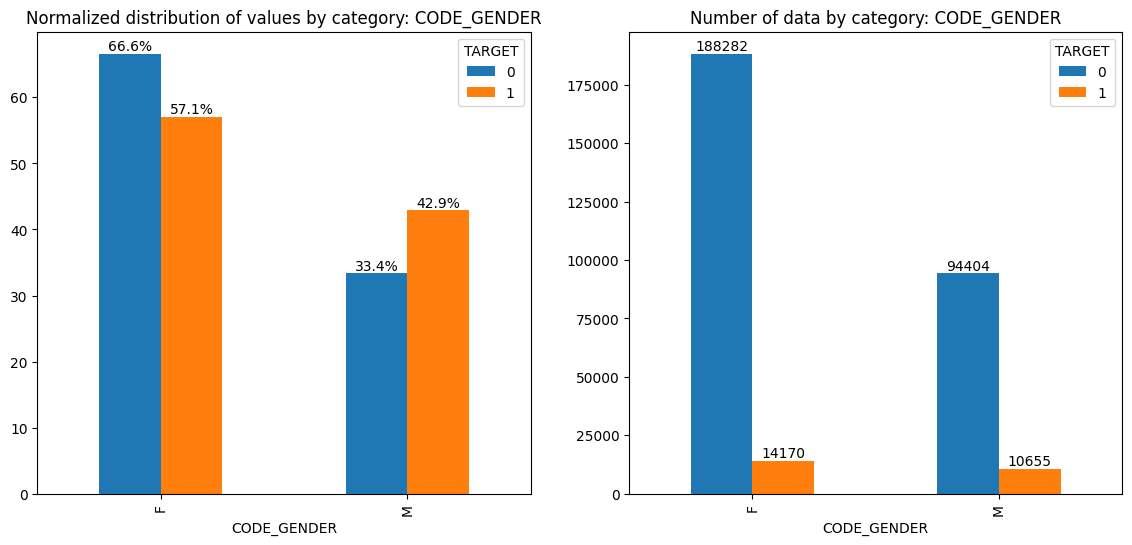

In [ ]:
uni_cat_target_compare(df, 'CODE_GENDER')

**Observation**

- If we look at the normalized histogram, we see that the `M` value decreased by 9.5% from `CODE_GENDER` excluding customers who have difficulty paying to customers who pay their bills on time. This is a weak correlation that males have more difficulty paying.

**Conclusion**
- The `CODE_GENDER` column gives a weak inference that male customers have more difficulty paying

### Analysis of `FLAG_OWN_CAR`

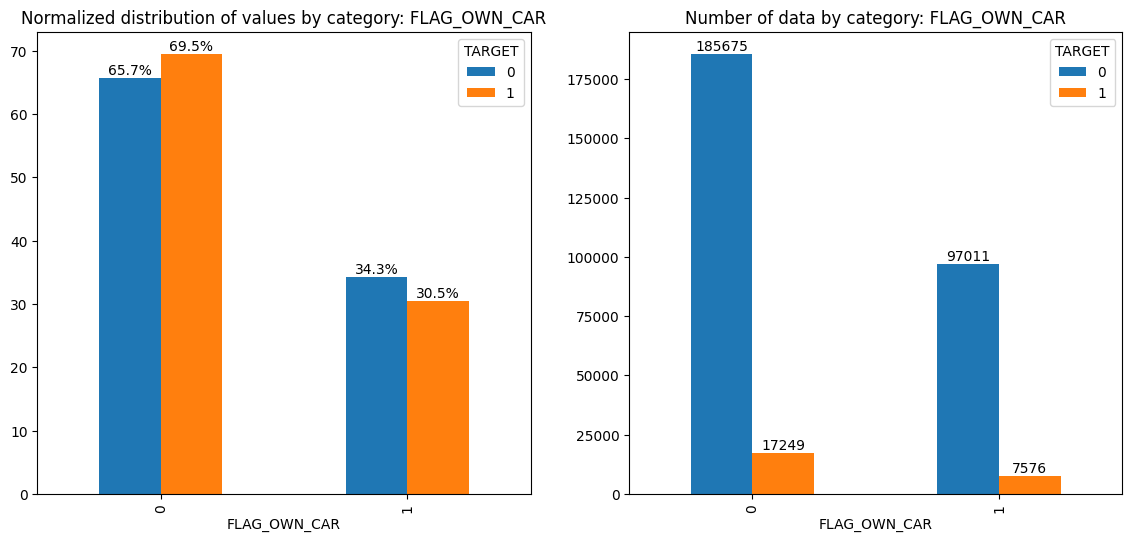

In [ ]:
uni_cat_target_compare(df, 'FLAG_OWN_CAR')

**Observation**

- Looking at the histograms, we do not see any significant differences in `FLAG_OWN_CAR` between customers who have difficulty paying and customers who pay on time.

**Conclusion**
- The `FLAG_OWN_CAR` column does not provide strong evidence in favor of customers who have difficulty paying OR pay on time

### Analysis of `NAME_INCOME_TYP

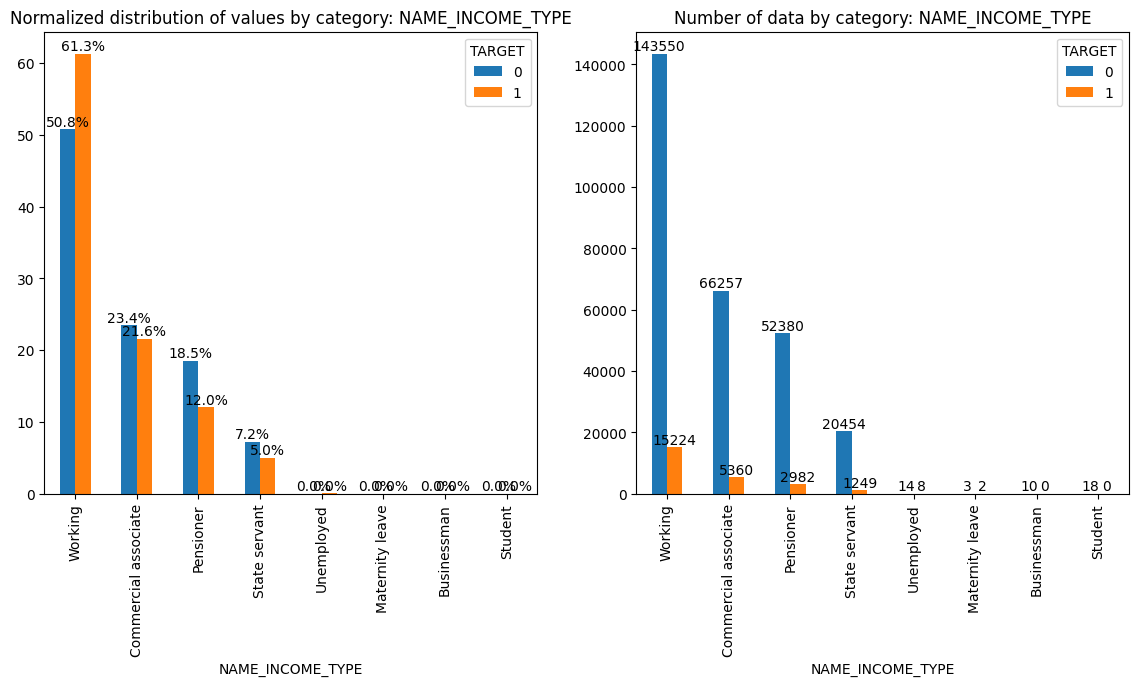

In [ ]:
uni_cat_target_compare(df, 'NAME_INCOME_TYPE')

**Observations**

- Pensioners are more likely to pay on time
- Students have no difficulty paying
- Business people have no difficulty paying

**Conclusion**

- Pensioners are more likely to pay on time. This is a weak relationship.
- Students have no difficulty paying. In this case, students have only 18 observations, and this should be considered a weak correlation.
- Business people have no difficulty paying. In this case, business people have only 10 observations, and this should be considered a weak correlation

### Analysis of `NAME_EDUCATION_TYPE`

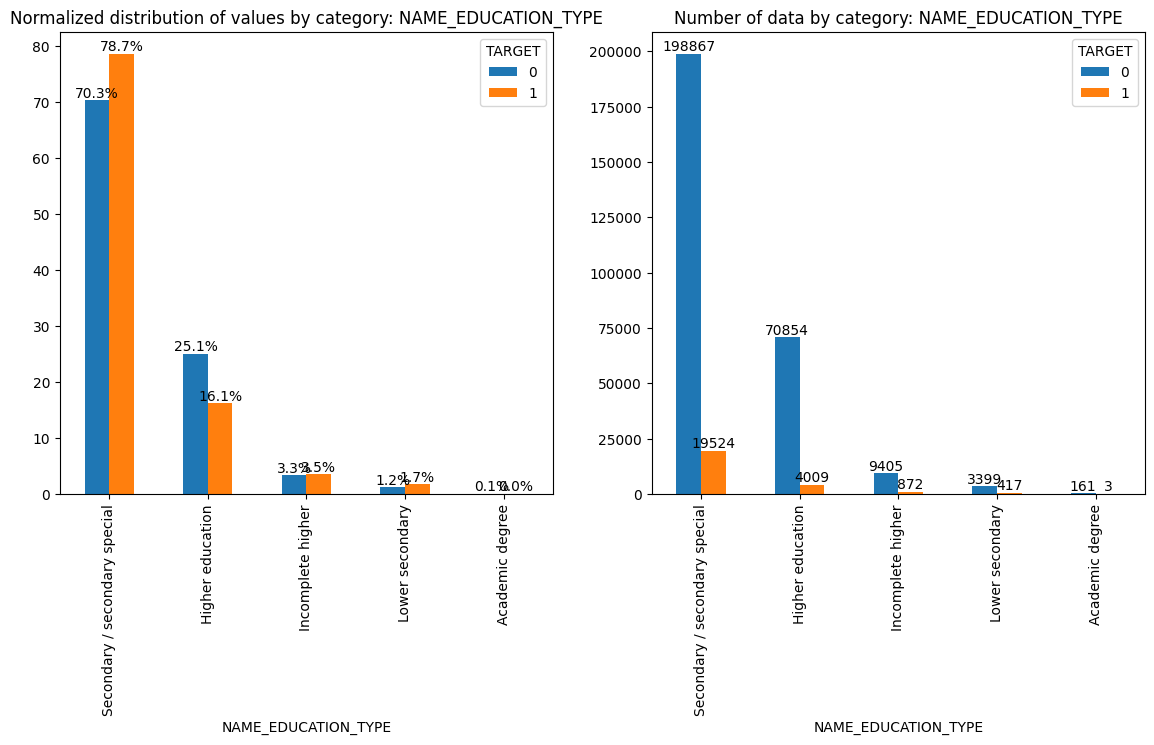

In [ ]:
uni_cat_target_compare(df, 'NAME_EDUCATION_TYPE')

**Observations**

- Customers with `Higher education` are more likely to pay on time
- The remaining categories do not give convincing results

**Conclusion**

- Customers with `Higher education` have fewer difficulties with payment. However, this correlation is weak.

### Analysis of `NAME_FAMILY_STATUS`

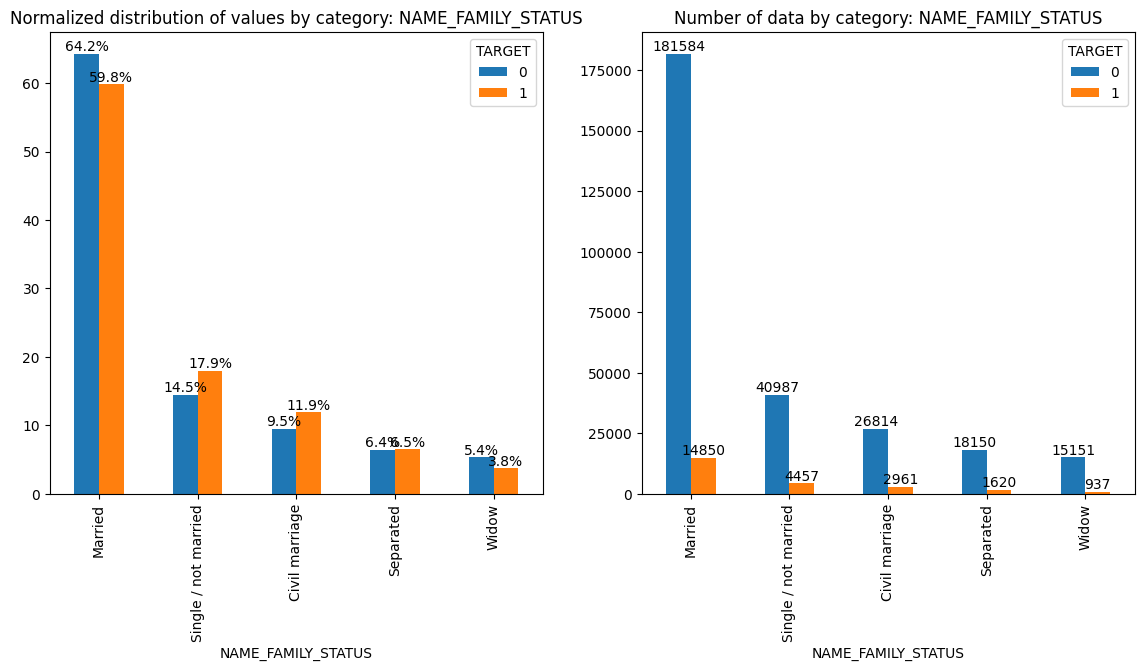

In [ ]:
uni_cat_target_compare(df, 'NAME_FAMILY_STATUS')

**Observations**

- Among married customers, 59.8% have difficulty paying and 64.2% pay on time
- Customers who belong to the `Widow` category have 3.8% difficulty paying and 5.4% timely payments
- Among customers who belong to the `Single \ not married` category, 18.0% have difficulty paying and 14.5% timely payments.
- The remaining categories do not give convincing results

**Conclusion**

- Customers who are `Married` or `Widow` are comparatively better at making timely payments. However, the correlation between these indicators is weak.
- Customers who are `Single \ not married` have comparatively more difficulty paying on time. However, this correlation is weak.

# Correlation analysis of numerical variables

### Construction of a correlation matrix for cases with payment difficulties

In [ ]:
df1.select_dtypes(include='number').shape

(24825, 68)

There are 67 numeric columns. Let's create a correlation matrix `corr` to better view the results

In [ ]:
corr_df1 = df1.select_dtypes(include='number').corr()

In [ ]:
corr_df1.head()

TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
TARGET               NaN           NaN              NaN           NaN   
FLAG_OWN_CAR         NaN          1.00             0.02          0.07   
FLAG_OWN_REALTY      NaN          0.02             1.00          0.02   
CNT_CHILDREN         NaN          0.07             0.02          1.00   
AMT_INCOME_TOTAL     NaN          0.02             0.01          0.00   

                  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
TARGET                         NaN         NaN          NaN              NaN   
FLAG_OWN_CAR                  0.02        0.10         0.14             0.10   
FLAG_OWN_REALTY               0.01       -0.01         0.00            -0.02   
CNT_CHILDREN                  0.00       -0.00         0.03            -0.01   
AMT_INCOME_TOTAL              1.00        0.04         0.05             0.04   

                  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
TARGET                                   NaN         NaN            NaN   
FLAG_OWN_CAR                            0.03       -0.07          -0.11   
FLAG_OWN_REALTY                         0.03        0.11           0.06   
CNT_CHILDREN                           -0.03       -0.26          -0.19   
AMT_INCOME_TOTAL                        0.01       -0.00          -0.01   

                  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
TARGET                          NaN              NaN         NaN   
FLAG_OWN_CAR                  -0.07             0.02         NaN   
FLAG_OWN_REALTY                0.01            -0.02         NaN   
CNT_CHILDREN                  -0.15             0.03         NaN   
AMT_INCOME_TOTAL              -0.00             0.00         NaN   

                  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
TARGET                       NaN              NaN               NaN   
FLAG_OWN_CAR                0.11            -0.02              0.00   
FLAG_OWN_REALTY            -0.06            -0.14             -0.01   
CNT_CHILDREN                0.19             0.05              0.00   
AMT_INCOME_TOTAL            0.01            -0.01             -0.00   

                  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
TARGET                   NaN         NaN              NaN   
FLAG_OWN_CAR           -0.00        0.03             0.11   
FLAG_OWN_REALTY        -0.05        0.03             0.03   
CNT_CHILDREN           -0.02        0.01             0.89   
AMT_INCOME_TOTAL       -0.00        0.01             0.01   

                  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
TARGET                             NaN                          NaN   
FLAG_OWN_CAR                     -0.01                        -0.01   
FLAG_OWN_REALTY                  -0.01                        -0.01   
CNT_CHILDREN                      0.04                         0.04   
AMT_INCOME_TOTAL                 -0.02                        -0.02   

                  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
TARGET                                NaN                         NaN   
FLAG_OWN_CAR                         0.01                       -0.00   
FLAG_OWN_REALTY                     -0.12                       -0.05   
CNT_CHILDREN                        -0.02                       -0.02   
AMT_INCOME_TOTAL                     0.01                        0.01   

                  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
TARGET                                   NaN                          NaN   
FLAG_OWN_CAR                            0.02                         0.02   
FLAG_OWN_REALTY                        -0.04                        -0.02   
CNT_CHILDREN                           -0.02                        -0.01   
AMT_INCOME_TOTAL                        0.01                         0.01   

                  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
TARGET                               NaN       

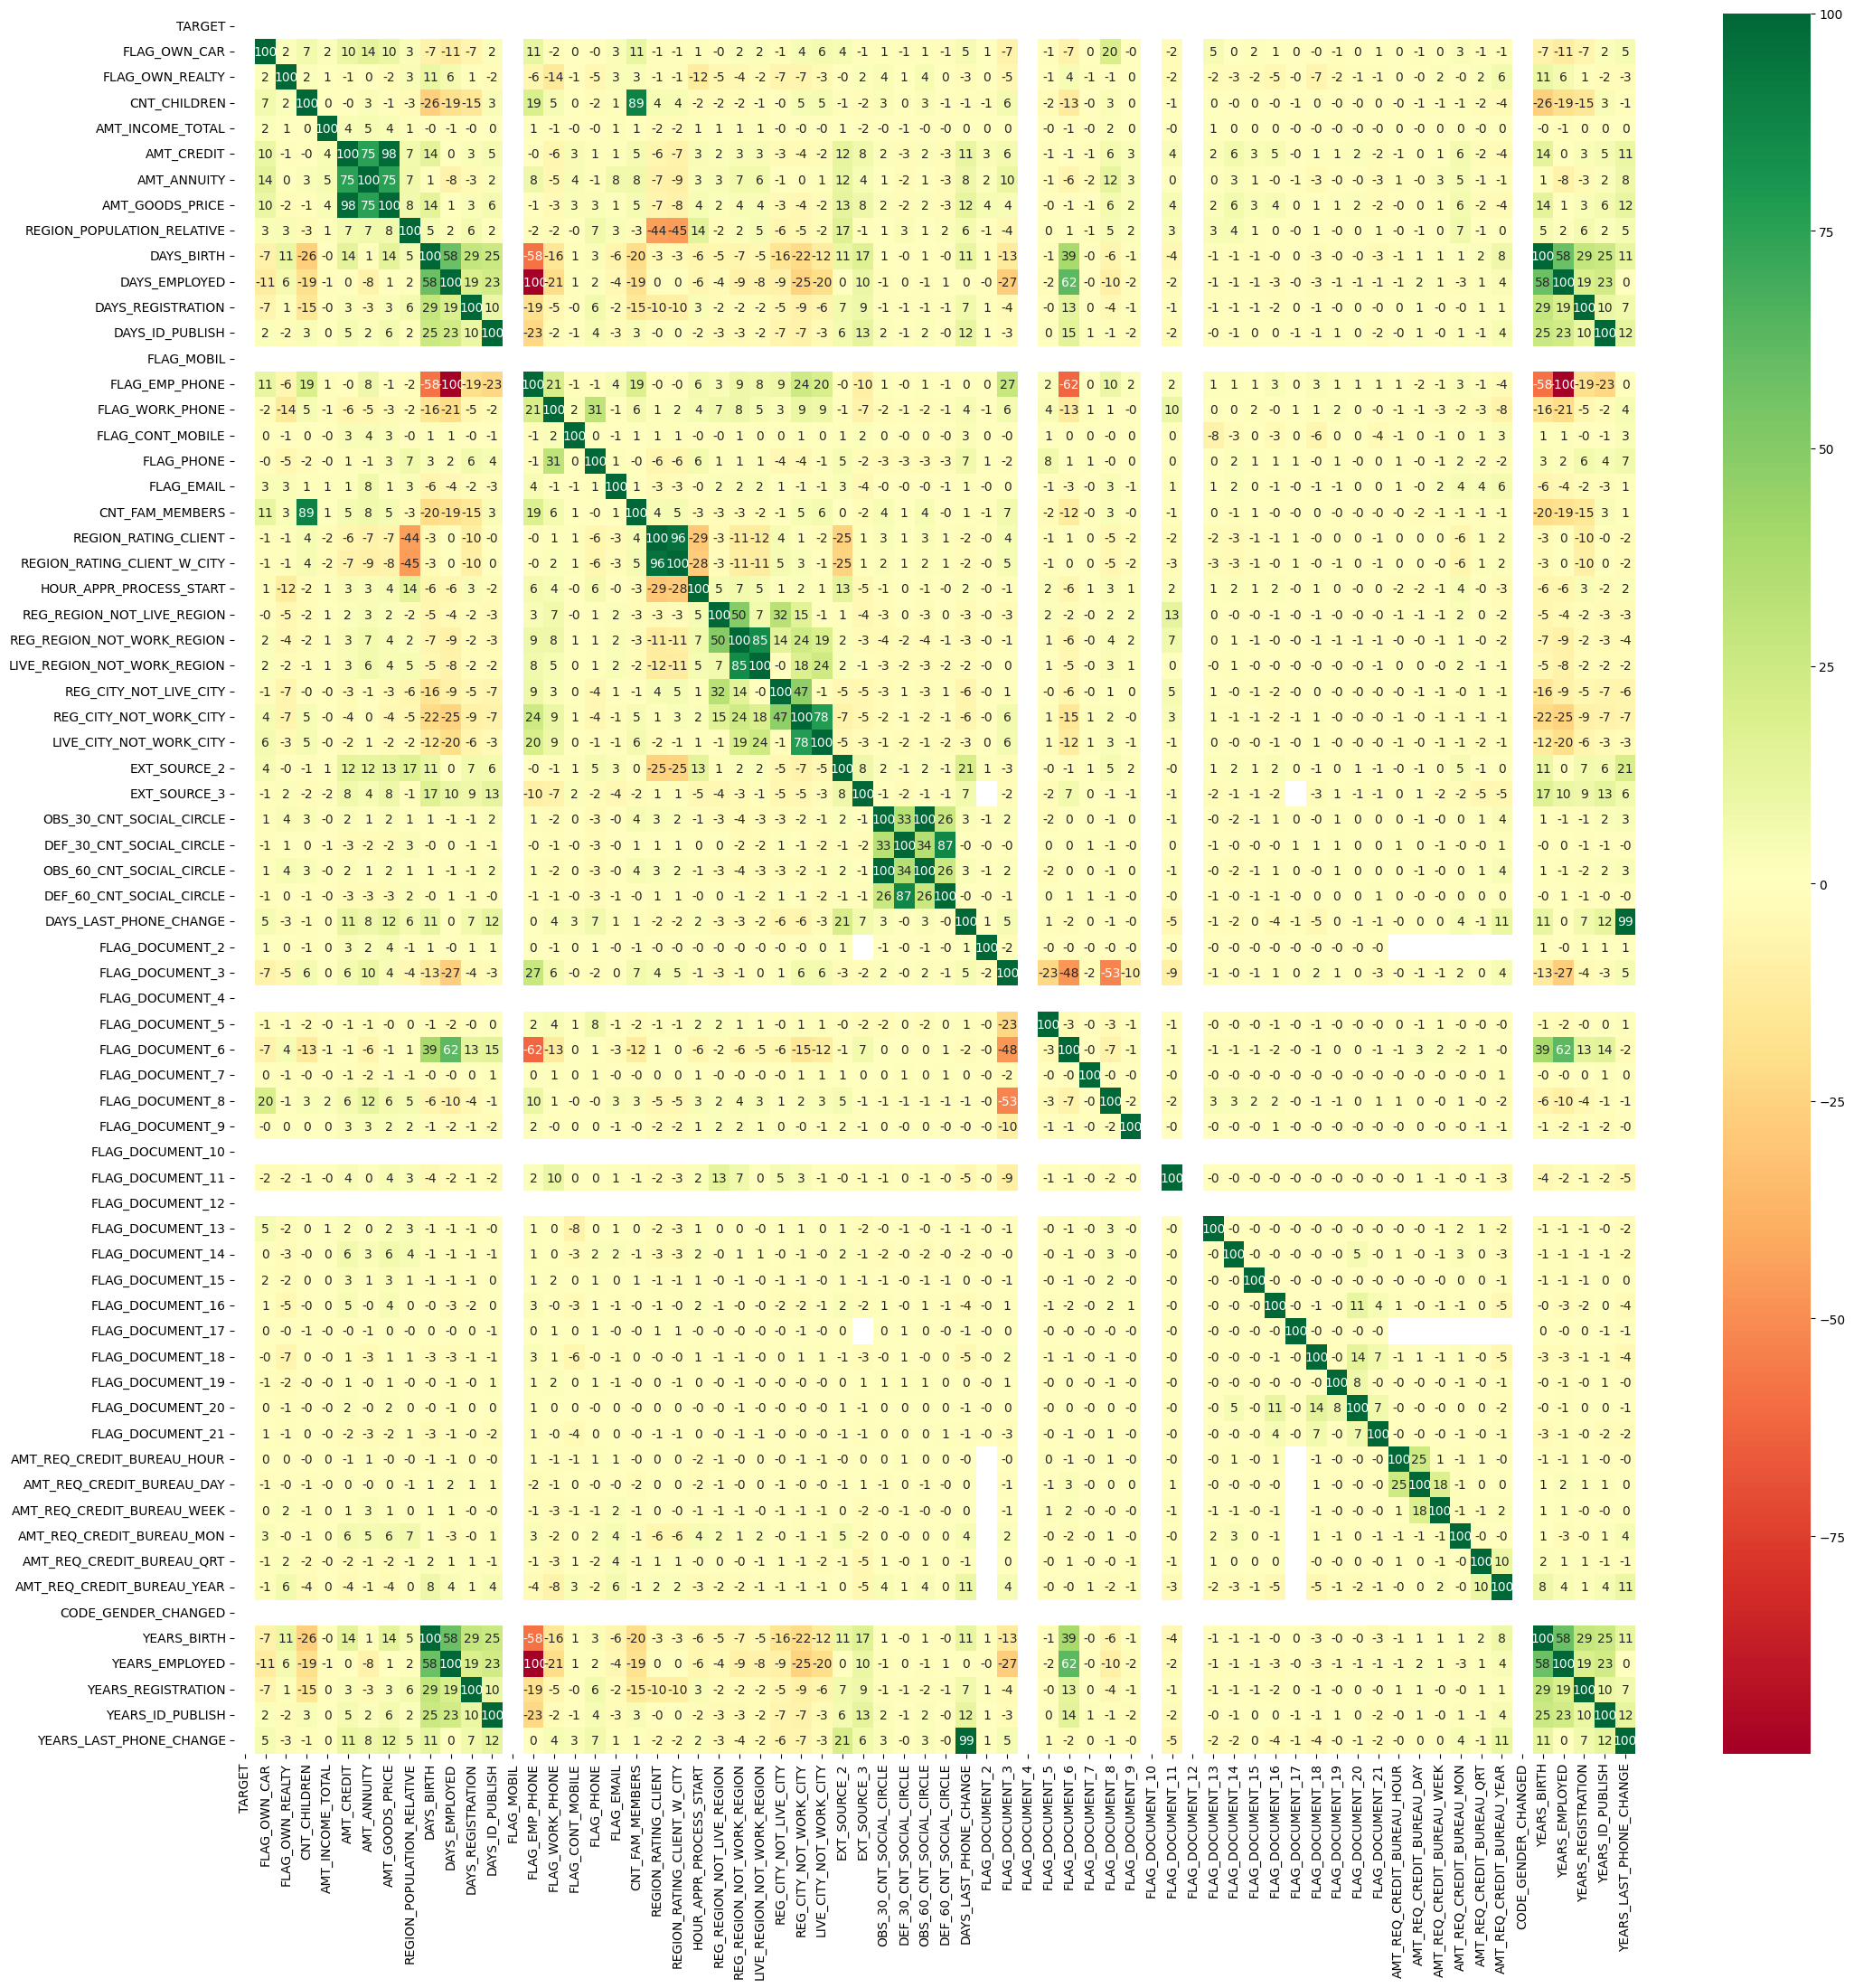

In [ ]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df1*100, annot = True, cmap = "RdYlGn", cbar = True, fmt='.0f')
plt.show()

Let's create a heat map to view correlations above 80% and 99.99%

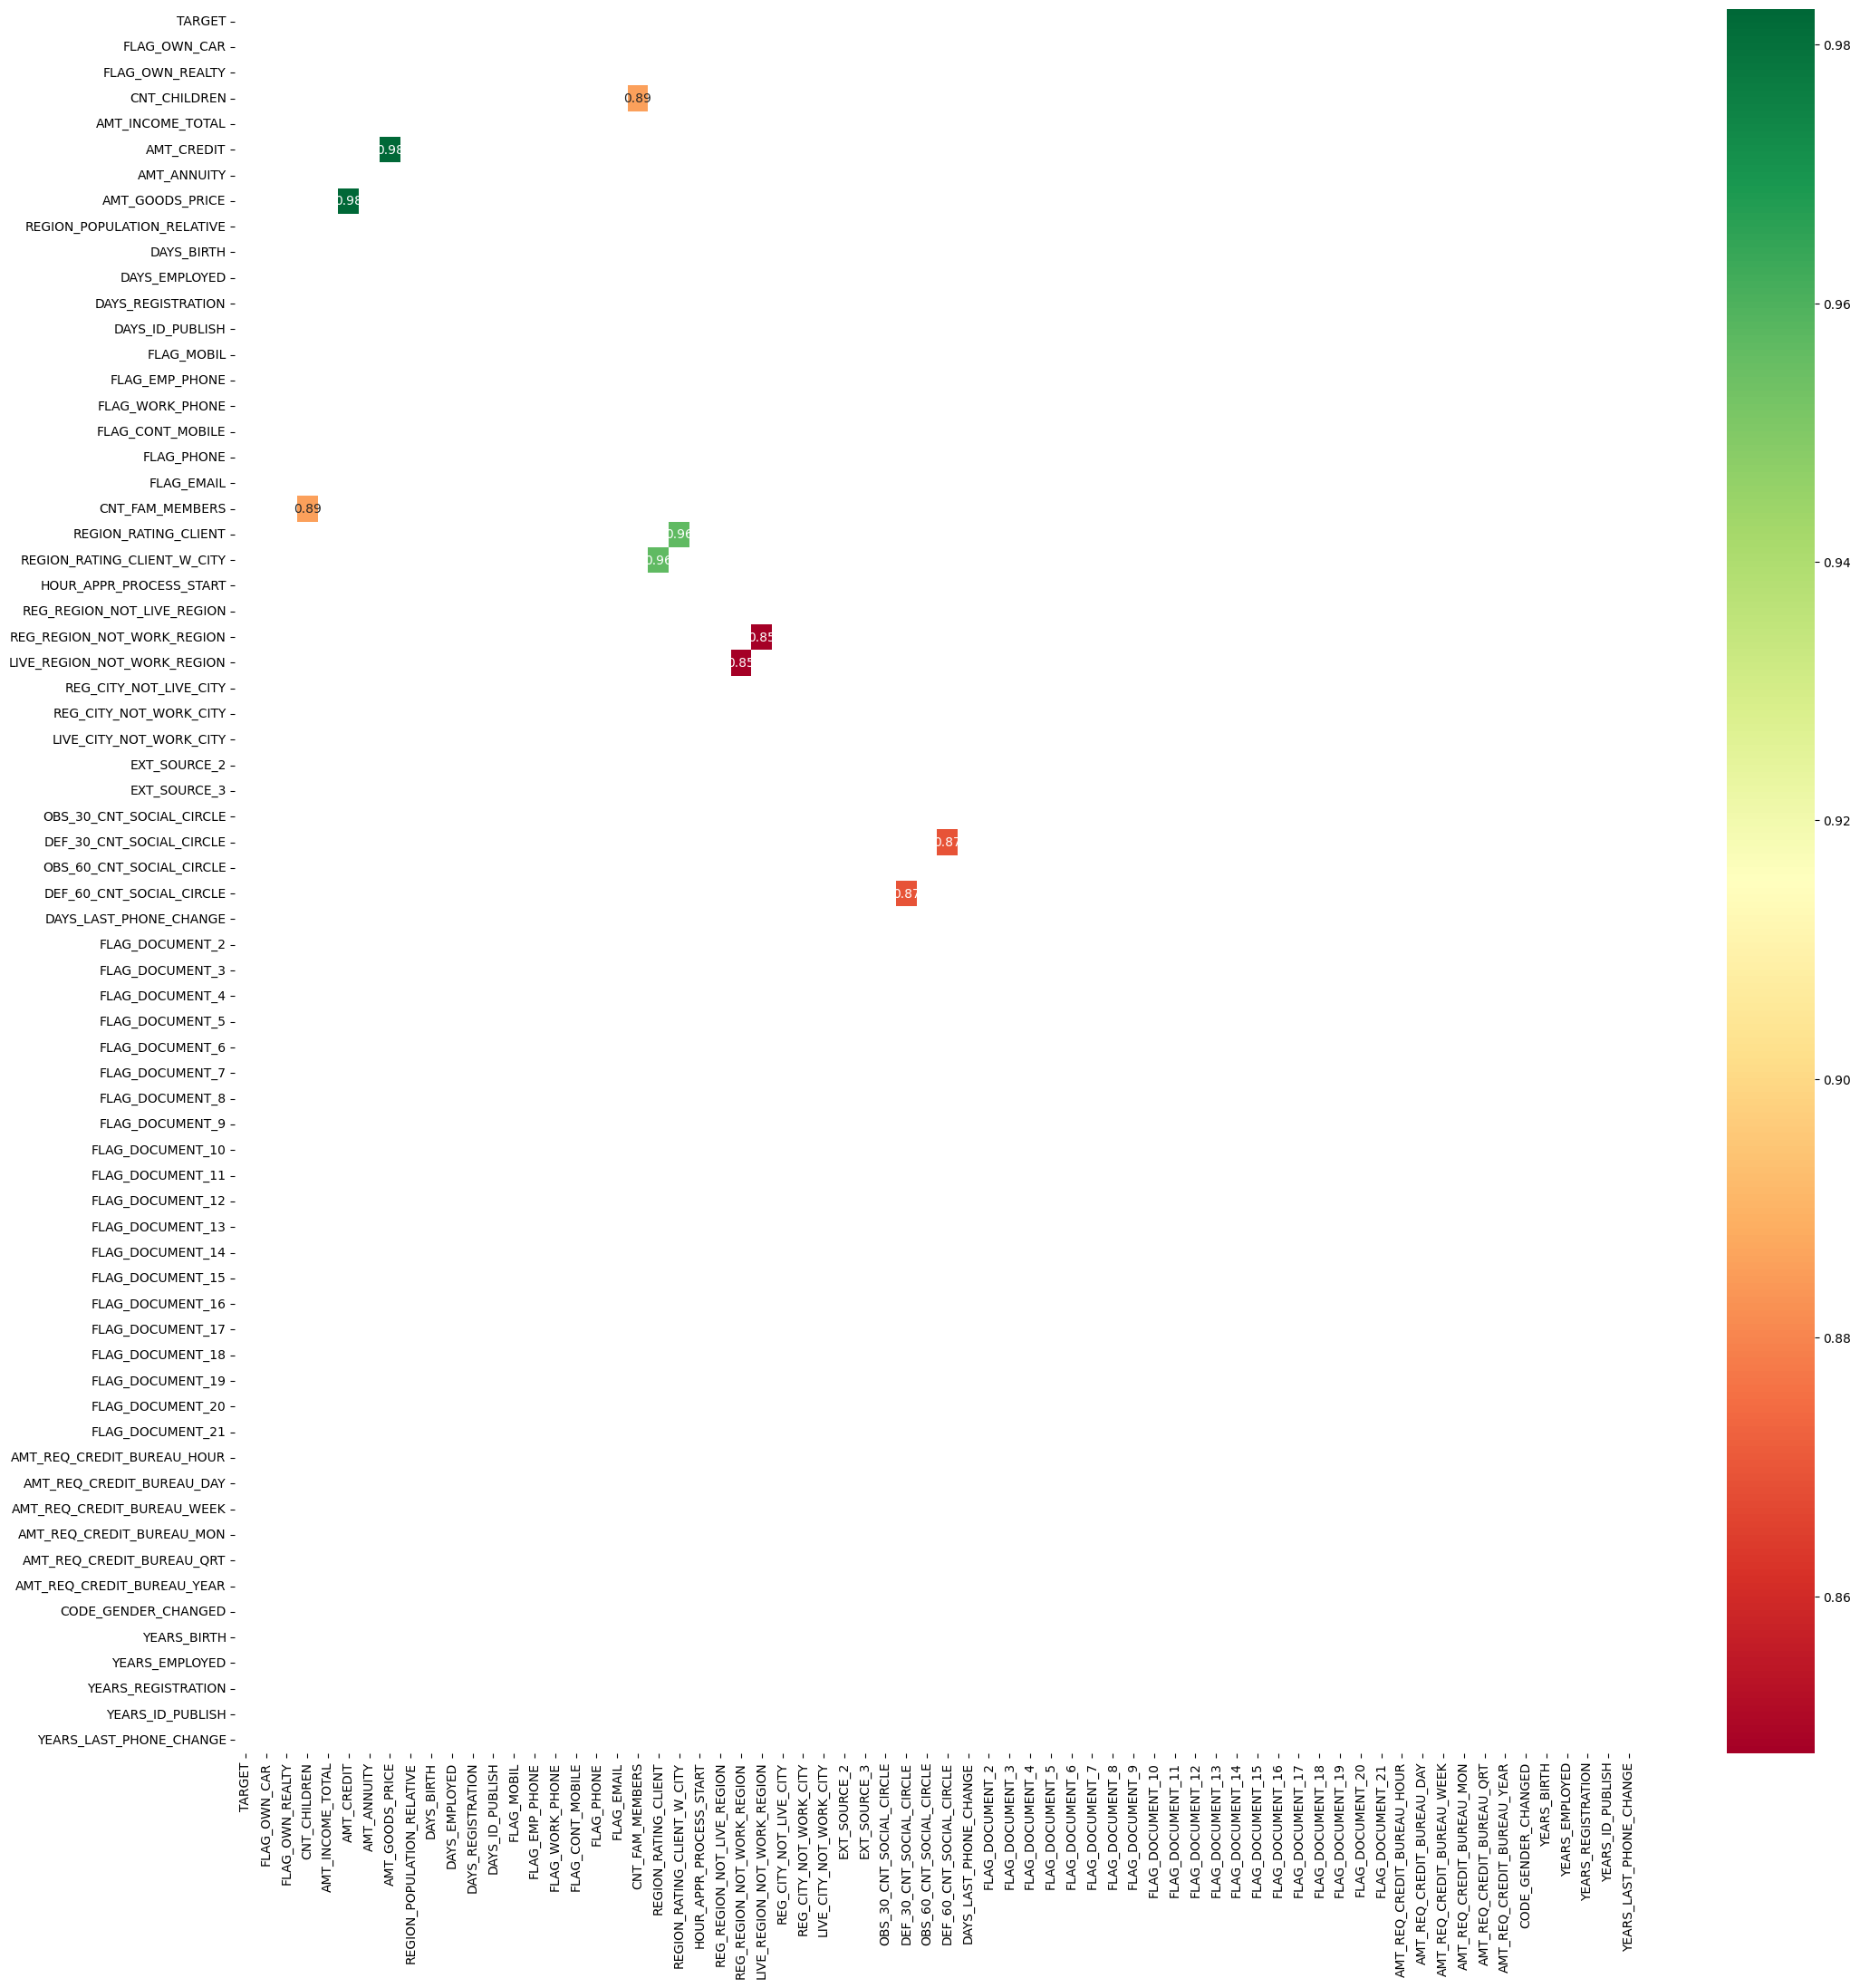

In [ ]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df1[(corr_df1 >= 0.8) & (corr_df1 < 0.99)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Let's look at the top 10 correlations for payment difficulties cases

In [ ]:
corr_df1[corr_df1 <= 0.99].unstack().sort_values(ascending = False).head(22)

AMT_CREDIT                   AMT_GOODS_PRICE               0.98
AMT_GOODS_PRICE              AMT_CREDIT                    0.98
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.96
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.96
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.89
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.89
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.87
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.87
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.85
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.85
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.78
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.78
AMT_ANNUITY                  AMT_GOODS_PRICE               0.75
AMT_GOODS_PRICE              AMT_ANNUITY                   0.75
AMT_ANNUITY                  AMT_CREDIT                    0.75
AMT_CREDIT                   AMT_ANNUITY                   0.75
FLAG_DOCUMENT_6              YEARS_EMPLOYED                0.62
YEARS_EMPLOYED               FLAG_DOCUMENT_6               0.62
DAYS_EMPLOYED                FLAG_DOCUMENT_6               0.62
FLAG_DOCUMENT_6              DAYS_EMPLOYED                 0.62
DAYS_BIRTH                   DAYS_EMPLOYED                 0.58
DAYS_EMPLOYED                DAYS_BIRTH                    0.58
dtype: float64

Since we have repeating combinations, looking at the table above and removing duplicates, we get the top 10 correlations as shown below:

- AMT_GOODS_PRICE -              AMT_CREDIT                    0.98
- REGION_RATING_CLIENT -         REGION_RATING_CLIENT_W_CITY   0.96
- CNT_FAM_MEMBERS -              CNT_CHILDREN                  0.89
- DEF_60_CNT_SOCIAL_CIRCLE -     DEF_30_CNT_SOCIAL_CIRCLE      0.87
- REG_REGION_NOT_WORK_REGION -   LIVE_REGION_NOT_WORK_REGION   0.85
- LIVE_CITY_NOT_WORK_CITY -      REG_CITY_NOT_WORK_CITY        0.78
- AMT_ANNUITY -                  AMT_GOODS_PRICE               0.75
- AMT_ANNUITY -                  AMT_CREDIT                    0.75
- DAYS_EMPLOYED -                FLAG_DOCUMENT_6               0.62
- DAYS_BIRTH -                   DAYS_EMPLOYED                 0.58

### Construction of a correlation matrix for cases with timely payments

In [ ]:
df0.select_dtypes(include='number').shape

(282686, 68)

There are 67 numeric columns. Let's create a correlation matrix `corr` to better view the resultsтатів

In [ ]:
corr_df0 = df0.select_dtypes(include='number').corr()

In [ ]:
corr_df0.head()

TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
TARGET               NaN           NaN              NaN           NaN   
FLAG_OWN_CAR         NaN          1.00            -0.01          0.11   
FLAG_OWN_REALTY      NaN         -0.01             1.00         -0.00   
CNT_CHILDREN         NaN          0.11            -0.00          1.00   
AMT_INCOME_TOTAL     NaN          0.18             0.00          0.03   

                  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
TARGET                         NaN         NaN          NaN              NaN   
FLAG_OWN_CAR                  0.18        0.12         0.14             0.12   
FLAG_OWN_REALTY               0.00       -0.04        -0.01            -0.05   
CNT_CHILDREN                  0.03        0.00         0.02            -0.00   
AMT_INCOME_TOTAL              1.00        0.34         0.42             0.35   

                  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
TARGET                                   NaN         NaN            NaN   
FLAG_OWN_CAR                            0.04       -0.14          -0.16   
FLAG_OWN_REALTY                         0.01        0.12           0.07   
CNT_CHILDREN                           -0.02       -0.34          -0.25   
AMT_INCOME_TOTAL                        0.17       -0.06          -0.14   

                  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
TARGET                          NaN              NaN         NaN   
FLAG_OWN_CAR                  -0.09            -0.02       -0.00   
FLAG_OWN_REALTY                0.03            -0.01       -0.00   
CNT_CHILDREN                  -0.19             0.03        0.00   
AMT_INCOME_TOTAL              -0.06            -0.02        0.00   

                  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
TARGET                       NaN              NaN               NaN   
FLAG_OWN_CAR                0.16             0.01             -0.01   
FLAG_OWN_REALTY            -0.07            -0.11              0.01   
CNT_CHILDREN                0.24             0.06             -0.00   
AMT_INCOME_TOTAL            0.14            -0.03             -0.02   

                  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
TARGET                   NaN         NaN              NaN   
FLAG_OWN_CAR           -0.01        0.03             0.15   
FLAG_OWN_REALTY        -0.04        0.03             0.01   
CNT_CHILDREN           -0.03        0.02             0.88   
AMT_INCOME_TOTAL        0.00        0.08             0.03   

                  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
TARGET                             NaN                          NaN   
FLAG_OWN_CAR                     -0.02                        -0.02   
FLAG_OWN_REALTY                   0.00                         0.00   
CNT_CHILDREN                      0.02                         0.02   
AMT_INCOME_TOTAL                 -0.19                        -0.20   

                  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
TARGET                                NaN                         NaN   
FLAG_OWN_CAR                         0.01                       -0.00   
FLAG_OWN_REALTY                     -0.10                       -0.03   
CNT_CHILDREN                        -0.01                       -0.01   
AMT_INCOME_TOTAL                     0.08                        0.07   

                  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
TARGET                                   NaN                          NaN   
FLAG_OWN_CAR                            0.04                         0.05   
FLAG_OWN_REALTY                        -0.03                        -0.02   
CNT_CHILDREN                            0.01                         0.02   
AMT_INCOME_TOTAL                        0.14                         0.13   

                  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
TARGET                               NaN       

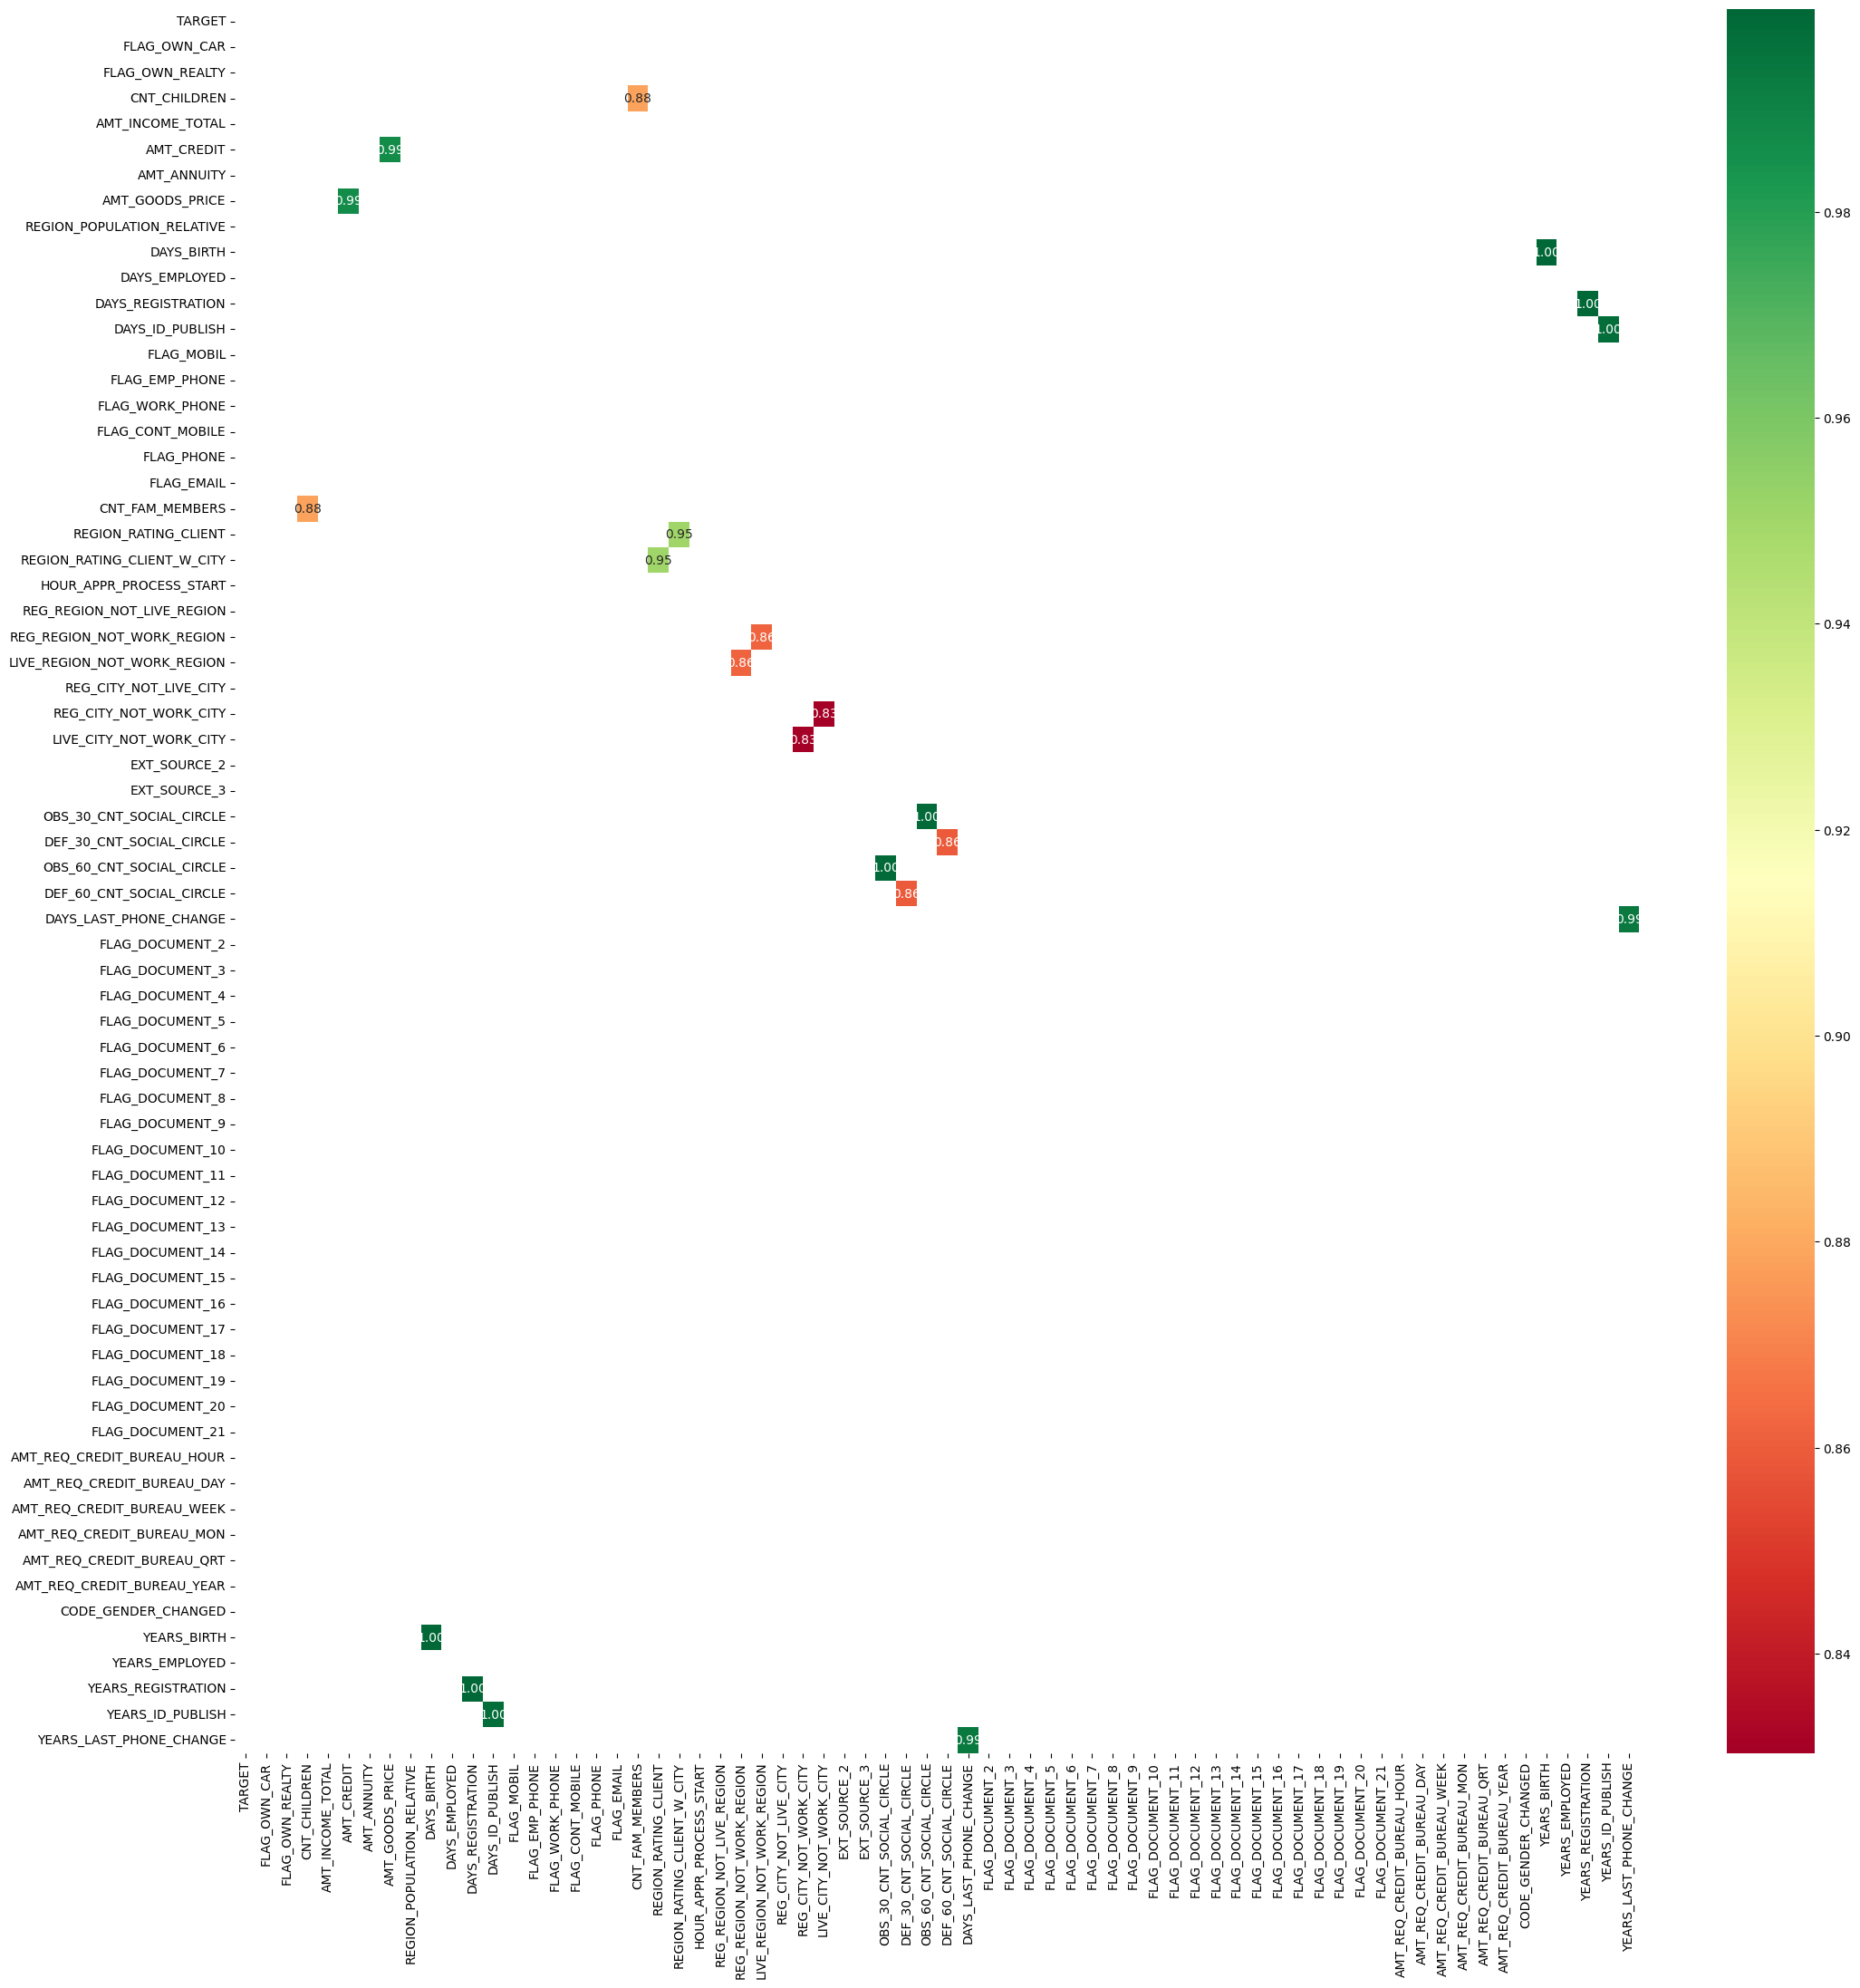

In [ ]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df0[(corr_df0 >= 0.8) & (corr_df0 < 0.9999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Let's look at the top 10 correlations for on-time payments

In [ ]:
corr_df0[corr_df0 <= 0.99].unstack().sort_values(ascending = False).head(28)

AMT_GOODS_PRICE              AMT_CREDIT                    0.99
AMT_CREDIT                   AMT_GOODS_PRICE               0.99
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.95
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.88
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.88
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.86
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.86
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.86
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.86
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.83
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.83
AMT_ANNUITY                  AMT_GOODS_PRICE               0.78
AMT_GOODS_PRICE              AMT_ANNUITY                   0.78
AMT_CREDIT                   AMT_ANNUITY                   0.77
AMT_ANNUITY                  AMT_CREDIT                    0.77
DAYS_BIRTH                   DAYS_EMPLOYED                 0.63
DAYS_EMPLOYED                DAYS_BIRTH                    0.63
YEARS_EMPLOYED               DAYS_BIRTH                    0.63
DAYS_BIRTH                   YEARS_EMPLOYED                0.63
DAYS_EMPLOYED                YEARS_BIRTH                   0.63
YEARS_BIRTH                  DAYS_EMPLOYED                 0.63
                             YEARS_EMPLOYED                0.63
YEARS_EMPLOYED               YEARS_BIRTH                   0.63
                             FLAG_DOCUMENT_6               0.60
FLAG_DOCUMENT_6              YEARS_EMPLOYED                0.60
DAYS_EMPLOYED                FLAG_DOCUMENT_6               0.60
FLAG_DOCUMENT_6              DAYS_EMPLOYED                 0.60
dtype: float64

Since we have repeating combinations, looking at the above table and removing duplicates, we get the top 10 correlations as shown below:

- AMT_GOODS_PRICE              AMT_CREDIT                    0.99
- REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
- CNT_FAM_MEMBERS              CNT_CHILDREN                  0.88
- REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.86
- DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.86
- LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.83
- AMT_ANNUITY                  AMT_GOODS_PRICE               0.78
- AMT_ANNUITY                  AMT_CREDIT                    0.77
- DAYS_BIRTH                   DAYS_EMPLOYED                 0.63
- DAYS_EMPLOYED                FLAG_DOCUMENT_6               0.60

**Observations**

- The top 10 correlations for Payment Difficulty and On-time Payments are the same, except for slight differences in the correlation percentages
- The highest correlation is for the combination of `AMT_GOODS_PRICE` and `AMT_CREDIT`.
- For the Payment Difficulty dataset, the correlation between `AMT_GOODS_PRICE` and `AMT_CREDIT` is 0.98
- For the On-time Payments dataset, the correlation between `AMT_GOODS_PRICE` and `AMT_CREDIT` is 0.99

# Univariate analysis of numerical variables

### Analysis of `AMT_CREDIT`

In [ ]:
Q1 = df1['AMT_CREDIT'].quantile(0.25)
Q3 = df1['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

448915.5


The values ​​*before* (Q1 - 1.5 * IQR) and *after* (Q3 + 1.5 * IQR) are outliers.

In [ ]:
Min_value1 = (Q1 - 1.5 * IQR)
Max_value1 = (Q3 + 1.5 * IQR)
print("Minimum value up to which emissions exist: {}".format(Min_value1))
print("Maximum value after which emissions exist: {}".format(Max_value1))

Minimum value up to which emissions exist: -540000.0
Maximum value after which emissions exist: 1620000.0


In [ ]:
Q1 = df0['AMT_CREDIT'].quantile(0.25)
Q3 = df0['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

540000.0


The values ​​*before* (Q1 - 1.5 * IQR) and *after* (Q3 + 1.5 * IQR) are outliers.

In [ ]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Minimum value up to which emissions exist: {}".format(Min_value0))
print("Maximum value after which emissions exist: {}".format(Max_value0))

Minimum value up to which emissions exist: -540000.0
Maximum value after which emissions exist: 1620000.0


Removing emissions and constructing a distribution diagram

In [ ]:
def kde_no_outliers(df0, df1, Max_value0, Max_value1, column):
  plt.figure(figsize = (14,6))
  sns.kdeplot(df1[df1[column] <= Max_value1][column],label = 'Payment difficulties')
  sns.kdeplot(df0[df0[column] <= Max_value0][column],label = 'On-Time Payments')
  plt.ticklabel_format(style='plain', axis='x')
  plt.xticks(rotation = 45)
  plt.legend()
  plt.show()

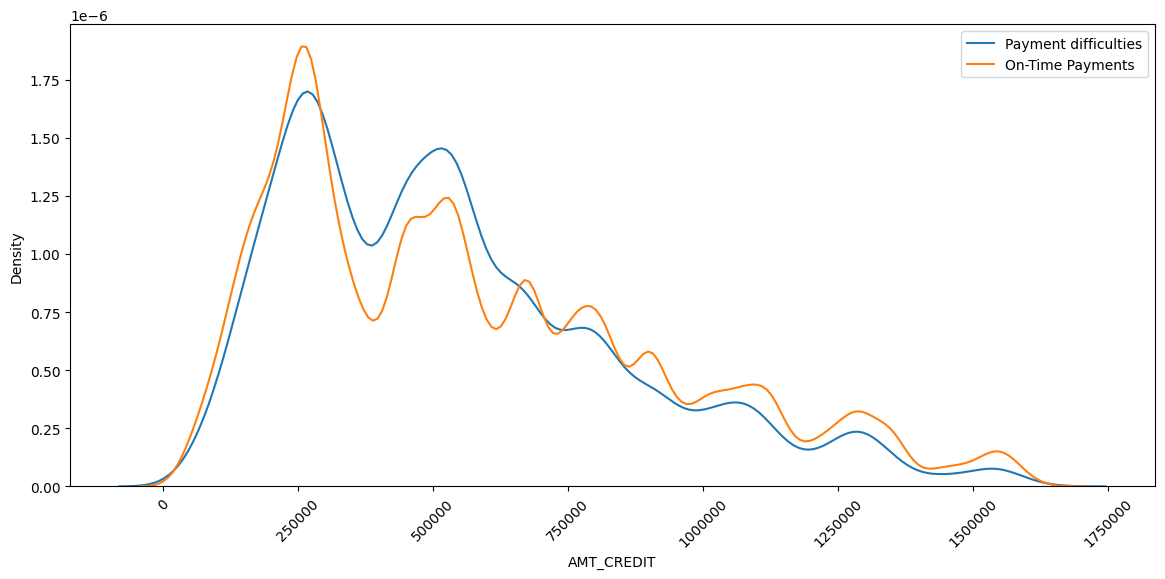

In [ ]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'AMT_CREDIT')

**Observations**

- For `AMT_CREDIT`, 250,000 to approximately 650,000 more customers are having difficulty paying
- For `AMT_CREDIT` > 750,000 more customers are making payments on time

### Analysis of  `YEARS_BIRTH`

In [ ]:
def calculate_iqr_and_plot(df0, df1, column):
    """
    Calculate the IQR for the column in both dataframes, identify outliers,
    and construct a distribution without outliers.

    Parameters:
    df0 (pd.DataFrame): DataFrame with data on on-time payments.
    df1 (pd.DataFrame): DataFrame with other payment data.
    """

    print("Calculate IQR for df1")
    Q1_df1 = df1[column].quantile(0.25)
    Q3_df1 = df1[column].quantile(0.75)
    IQR_df1 = Q3_df1 - Q1_df1
    print(f"IQR for df1: {IQR_df1}")

    print("\nDetermination of emissions for df1")
    min_value_df1 = Q1_df1 - 1.5 * IQR_df1
    max_value_df1 = Q3_df1 + 1.5 * IQR_df1
    print(f"Min value before which outlier exist in df1: {min_value_df1}")
    print(f"Max value after which outlier exist in df1: {max_value_df1}")

    print("\Calculate IQR for df0")
    Q1_df0 = df0[column].quantile(0.25)
    Q3_df0 = df0[column].quantile(0.75)
    IQR_df0 = Q3_df0 - Q1_df0
    print(f"IQR for df0: {IQR_df0}")

    print("\nDetermination of emissions for df0")
    min_value_df0 = Q1_df0 - 1.5 * IQR_df0
    max_value_df0 = Q3_df0 + 1.5 * IQR_df0
    print(f"Min value before which outlier exist in df0: {min_value_df0}")
    print(f"Max value after which outlier exist in df0: {max_value_df0}")

    print("\nRemoving emissions and constructing a distribution diagram")
    kde_no_outliers(df0, df1, max_value_df0, max_value_df1, column)



Calculate IQR for df1
IQR for df1: 18.0

Determination of emissions for df1
Min value before which outlier exist in df1: 4.0
Max value after which outlier exist in df1: 76.0
\Calculate IQR for df0
IQR for df0: 20.0

Determination of emissions for df0
Min value before which outlier exist in df0: 4.0
Max value after which outlier exist in df0: 84.0

Removing emissions and constructing a distribution diagram


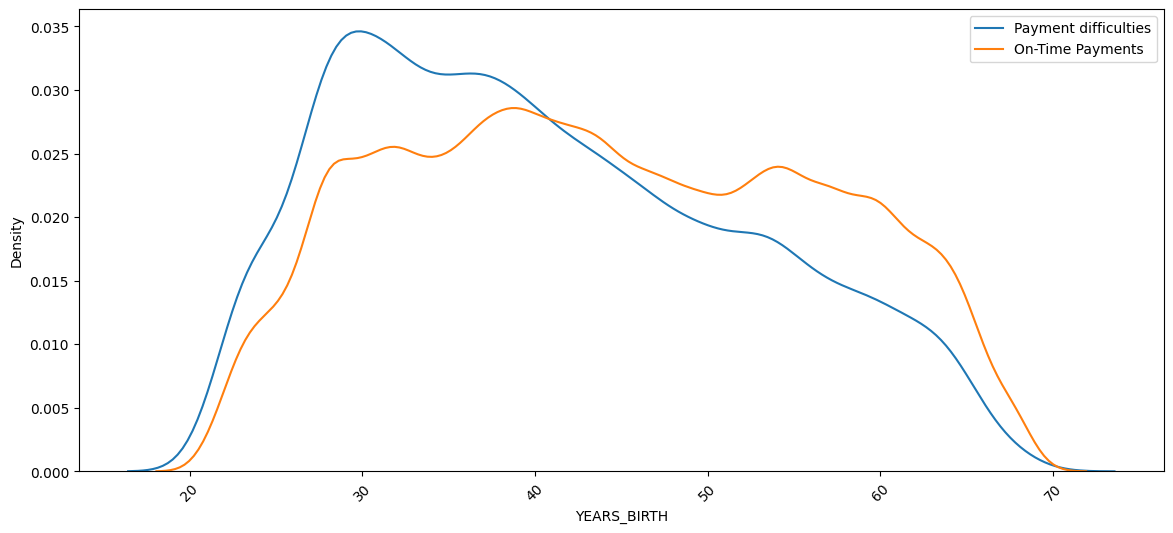

In [ ]:
calculate_iqr_and_plot(df0, df1, 'YEARS_BIRTH')

**Observation**

- For `YEARS_BIRTH` from 20 to 40 more customers have difficulty paying
- Conversely, for `YEARS_BIRTH` > 40 more customers with on-time payments

### Analysis of `AMT_GOODS_PRICE `

Calculate IQR for df1
IQR for df1: 436500.0

Determination of emissions for df1
Min value before which outlier exist in df1: -416250.0
Max value after which outlier exist in df1: 1329750.0
\Calculate IQR for df0
IQR for df0: 446502.375

Determination of emissions for df0
Min value before which outlier exist in df0: -431253.5625
Max value after which outlier exist in df0: 1354755.9375

Removing emissions and constructing a distribution diagram


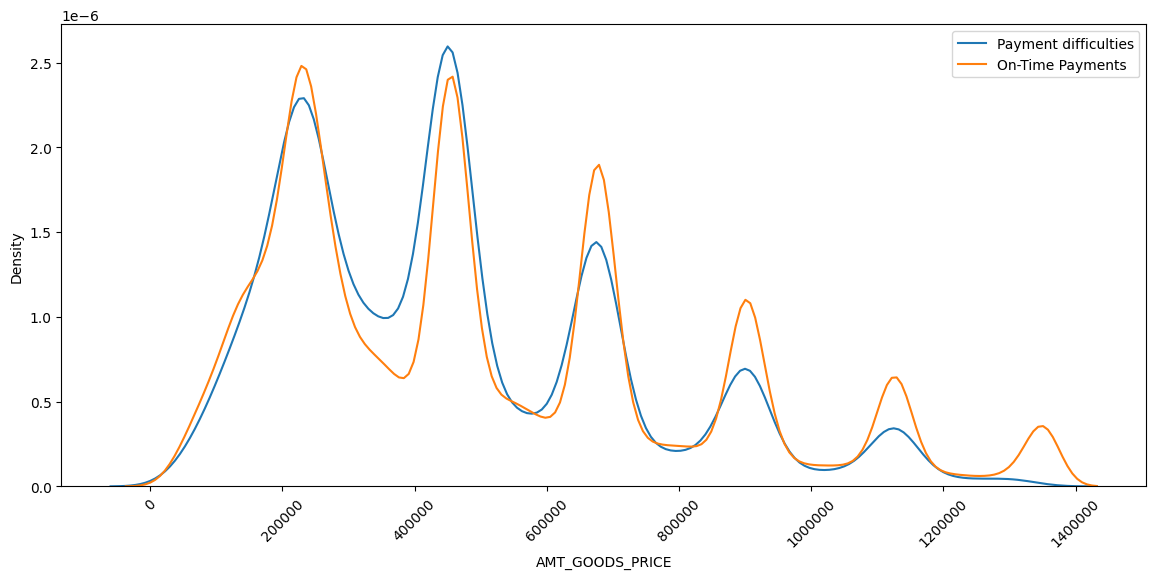

In [ ]:
calculate_iqr_and_plot(df0, df1, 'AMT_GOODS_PRICE')

**Observations**

- For `AMT_GOODS_PRICE` between ~250000 and ~550000 more customers have difficulty paying
- In other cases there are spikes but they do not show any convincing observations

### Analysis of `DAYS_EMPLOYED`

Calculate IQR for df1
IQR for df1: 2603.0

Determination of emissions for df1
Min value before which outlier exist in df1: -3227.5
Max value after which outlier exist in df1: 7184.5
\Calculate IQR for df0
IQR for df0: 5107.0

Determination of emissions for df0
Min value before which outlier exist in df0: -6693.5
Max value after which outlier exist in df0: 13734.5

Removing emissions and constructing a distribution diagram


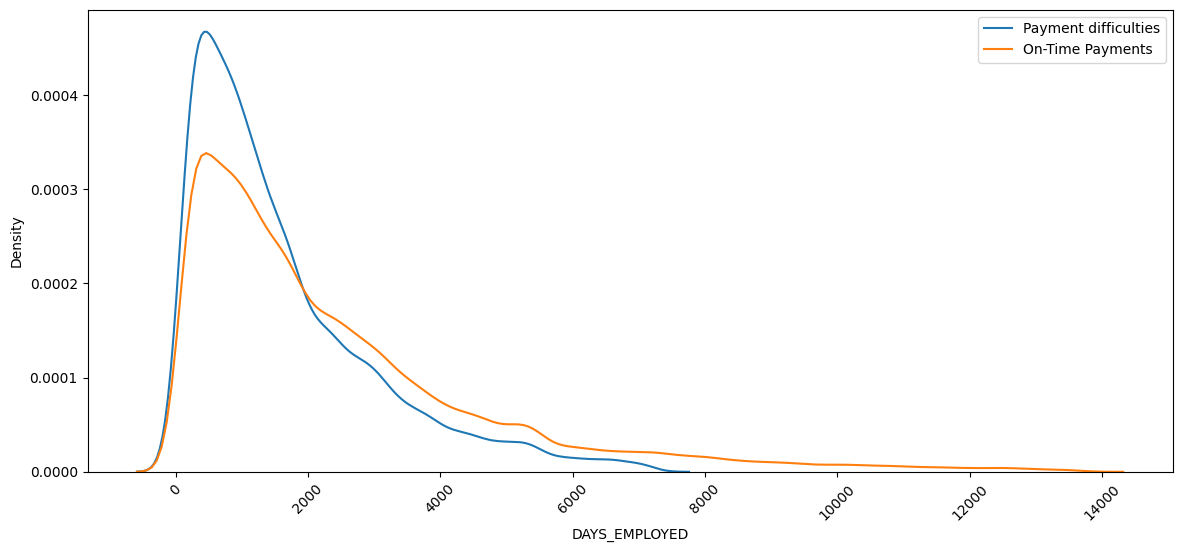

In [ ]:
calculate_iqr_and_plot(df0, df1, 'DAYS_EMPLOYED')

**Observation**

- For `DAYS_EMPLOYED` less than 2000, there are more customers who have problems with payment
- Conversely, for `DAYS_EMPLOYED` > 2000, there are more customers with timely payments
- This means that those who work longer have a better chance of repaying the loan

### Analysis of `CNT_CHILDREN `

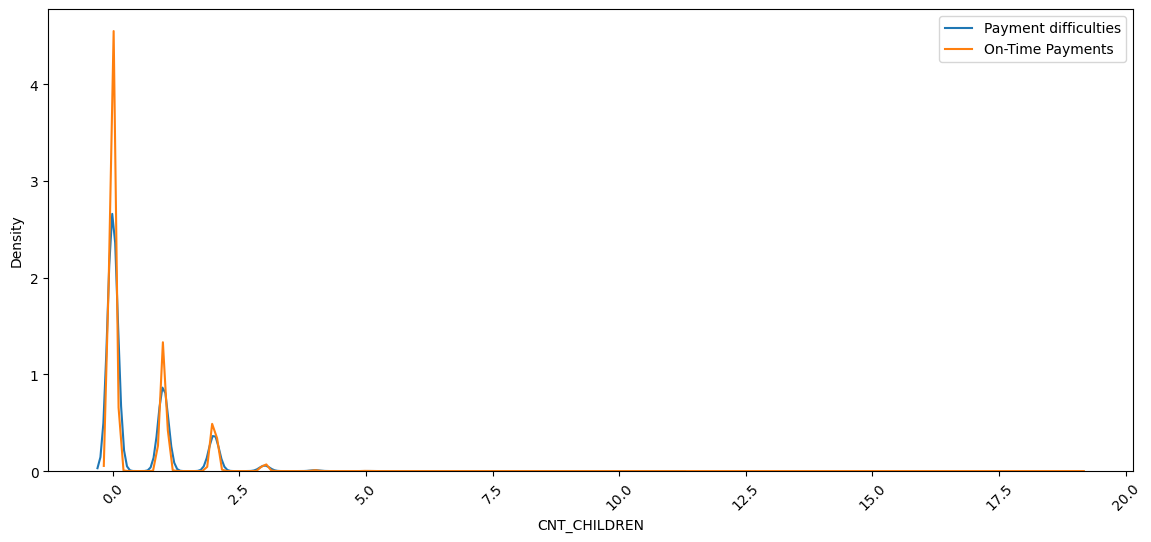

In [ ]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'CNT_CHILDREN')

**Observation**

- For `CNT_CHILDREN` with 0 (those without children), there are many customers with on-time payments
- For `CNT_CHILDREN` with 1 OR 2 (those with 1 or 2 children), there are slightly more customers with on-time payments

### Analysis of `AMT_INCOME_TOTAL `

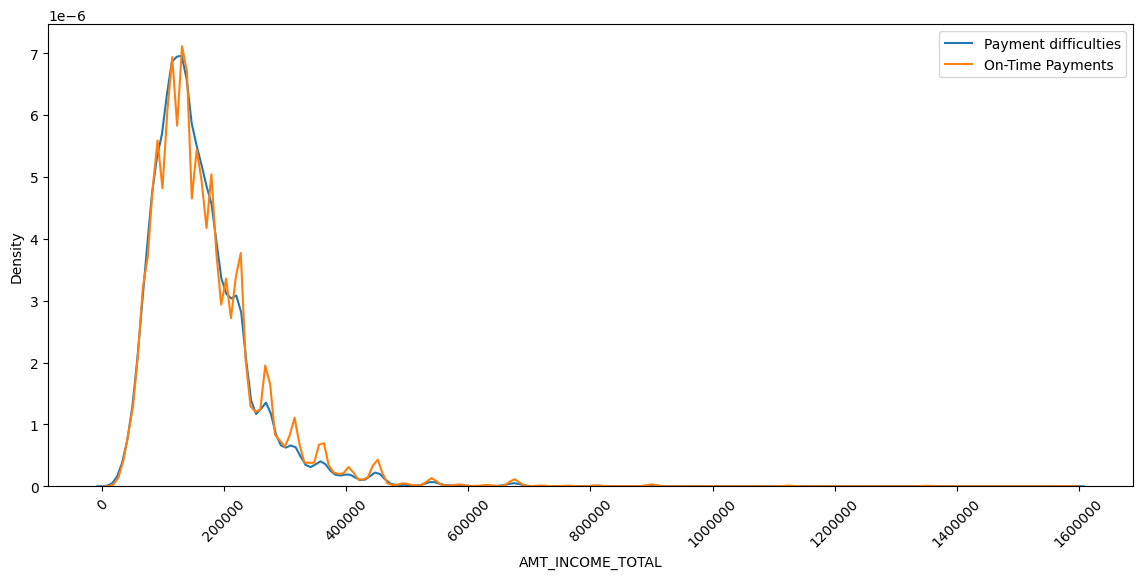

In [ ]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'AMT_INCOME_TOTAL')

**Observation**

- Based on `AMT_INCOME_TOTAL`, for customers who have difficulty paying, the distribution roughly resembles a normal distribution
- But for customers with on-time payments, there are unstable peaks in the distribution, which does not provide any reliable observations

# Bivariate/Multivariate Analysis

## Continuous vs continuous variables

### Analysis of `AMT_GOODS_PRICE` vs `AMT_CREDIT`

In [ ]:
max_value1_AMT_GOODS_PRICE = outlier_range(df1,'AMT_GOODS_PRICE')
max_value1_AMT_GOODS_PRICE

np.float64(1329750.0)

In [ ]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

np.float64(1406688.75)

In [ ]:
max_value0_AMT_GOODS_PRICE = outlier_range(df0,'AMT_GOODS_PRICE')
max_value0_AMT_GOODS_PRICE

np.float64(1354755.9375)

In [ ]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

np.float64(1620000.0)

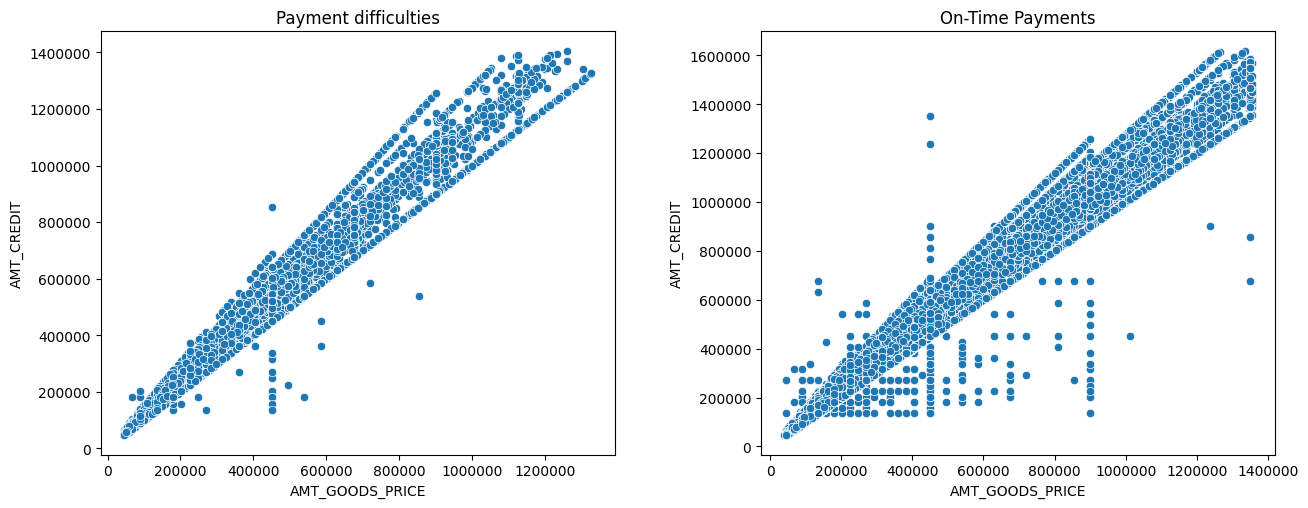

In [ ]:
plt.figure(figsize = (14, 6))

plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_GOODS_PRICE'] < max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df1[df1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_GOODS_PRICE'] < max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df0[df0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout(pad = 4)
plt.show()

**Observation**
- AMT_GOODS_PRICE and AMT_CREDIT have a strong positive correlation. This means that as the price of the good increases, the amount of credit also increases

### Analysis of `AMT_ANNUITY` vs `AMT_CREDIT`

In [ ]:
def bi_numerical_analysis(df0, df1, column_1, column_2):
  def build_scatter(df):
    sns.scatterplot(x = df[df[column_1] < max_value1_column_1][column_1],
                    y = df[df[column_2] < max_value1_column_2][column_2], data = df)
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')

  max_value1_column_1 = outlier_range(df1, column_1)
  max_value1_column_1

  max_value1_column_2 = outlier_range(df1, column_2)
  max_value1_column_2

  max_value0_column_1 = outlier_range(df0, column_1)
  max_value0_column_1

  max_value0_column_2 = outlier_range(df0, column_2)
  max_value0_column_2

  print("Constructing a scatter diagram for comparison with removed emissions")

  plt.figure(figsize = (20,8))

  plt.subplot(1,2,1)
  plt.title('Payment difficulties')
  build_scatter(df1)

  plt.subplot(1,2,2)
  plt.title('On-Time Payments')
  build_scatter(df0)

  plt.tight_layout(pad = 4)
  plt.show()


Constructing a scatter diagram for comparison with removed emissions


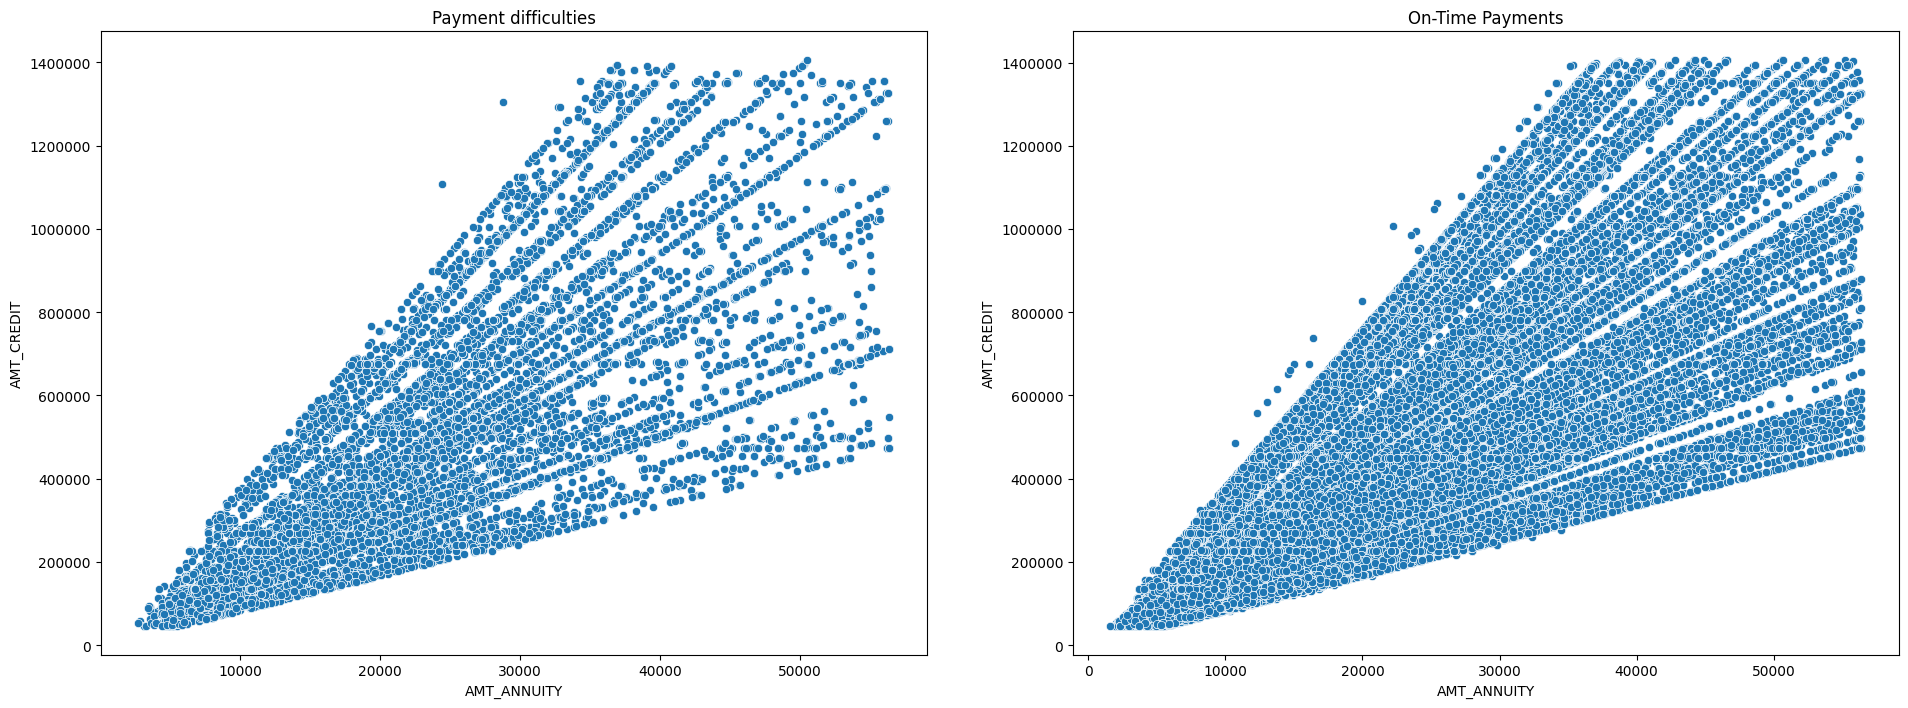

In [ ]:
bi_numerical_analysis(df0, df1, column_1='AMT_ANNUITY', column_2='AMT_CREDIT')

**Observation**
- AMT_ANNUITY and AMT_CREDIT have a strong positive correlation. This means that as the Annuity Amount increases, the loan amount also increases.

### Analysis of `DAYS_EMPLOYED` vs `AMT_INCOME_TOTAL`

Constructing a scatter diagram for comparison with removed emissions


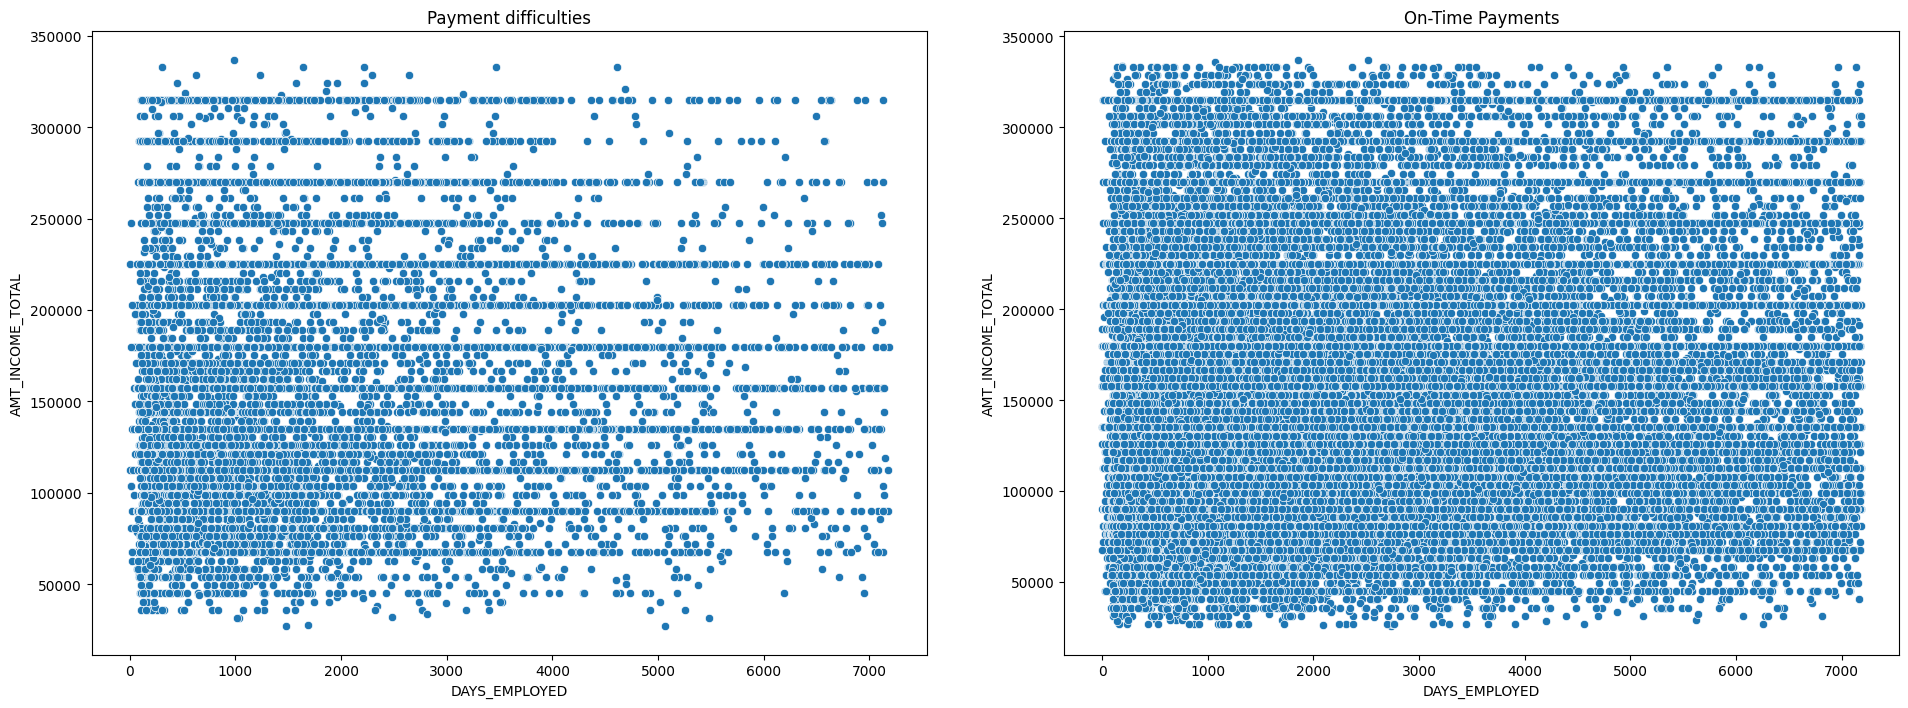

In [ ]:
bi_numerical_analysis(df0, df1, column_1='DAYS_EMPLOYED', column_2='AMT_INCOME_TOTAL')

**Observation**
- Clients who have been working for a long time (>7000 days) make payments on time, but this category of clients is not in the "Payment Difficulties" group
- Even in the "Payment Difficulties" group, there are few clients who have been working for more than 4000 days

### Analysis of `AMT_CREDIT` vs `DAYS_BIRTH`

Constructing a scatter diagram for comparison with removed emissions


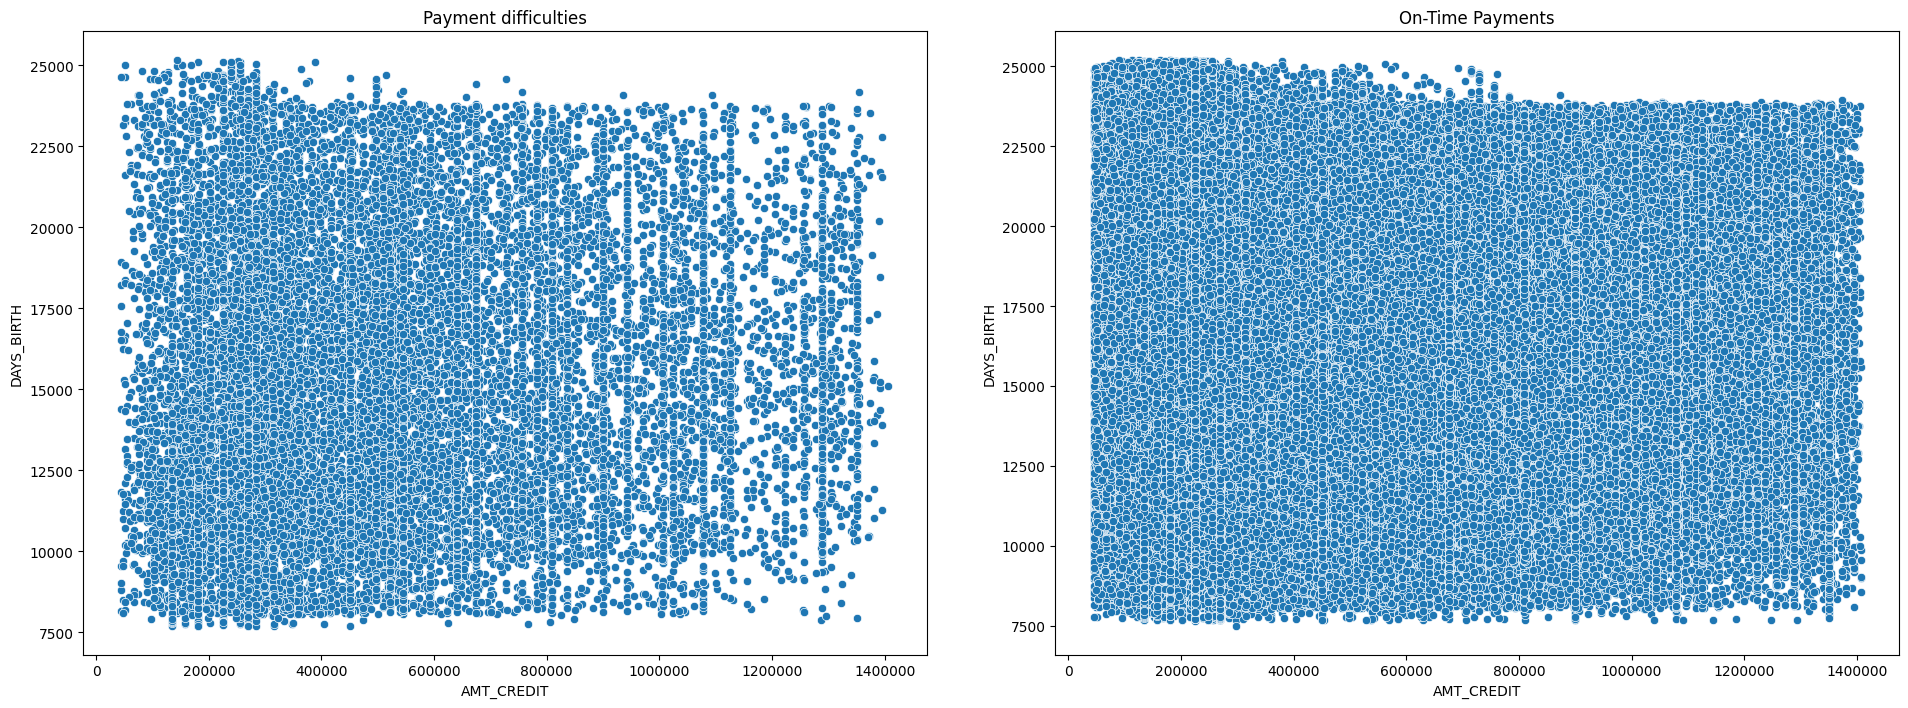

In [ ]:
bi_numerical_analysis(df0, df1, column_1='AMT_CREDIT', column_2='DAYS_BIRTH')

**Observation**
- There is no significant correlation between birthday and loan amount

## Continuous and categorical variables

In [ ]:
def draw_boxplot(df, categorical, continuous, max_continuous, title, hue_column, subplot_position):

    plt.subplot(1, 2, subplot_position)
    plt.title(title)
    red_diamond = dict(markerfacecolor='r', marker='D')
    sns.boxplot(x=categorical,
                y=df[df[continuous] < max_continuous][continuous],
                data=df,
                flierprops=red_diamond,
                order=sorted(df[categorical].unique(), reverse=True),
                hue=hue_column, hue_order=sorted(df[hue_column].unique(), reverse=True))
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=90)

def bi_boxplot(categorical, continuous, max_continuous1, max_continuous0, hue_column):

    plt.figure(figsize=(16, 10))

    # Payment Difficulties
    draw_boxplot(df1, categorical, continuous, max_continuous1, 'Payment Difficulties', hue_column, 1)

    # On-Time Payments
    draw_boxplot(df0, categorical, continuous, max_continuous0, 'On-Time Payments', hue_column, 2)

    plt.tight_layout(pad=4)
    plt.show()

### Analysis of `AMT_CREDIT` vs `NAME_EDUCATION_TYPE` vs `CODE_GENDER`

In [ ]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

np.float64(1406688.75)

In [ ]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

np.float64(1620000.0)

In [ ]:
df1.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min  \
NAME_EDUCATION_TYPE CODE_GENDER                                         
Academic degree     F              3.00 950245.50 504711.38 544491.00   
Higher education    F           2438.00 648500.58 410415.70  47970.00   
                    M           1571.00 642070.94 409695.93  45000.00   
Incomplete higher   F            504.00 520150.35 352227.49  91692.00   
                    M            368.00 554723.82 347843.71  74628.00   

                                      25%       50%        75%        max  
NAME_EDUCATION_TYPE CODE_GENDER                                            
Academic degree     F           667660.50 790830.00 1153122.75 1515415.50  
Higher education    F           323595.00 545040.00  877500.00 2687355.00  
                    M           329202.00 545040.00  832797.00 2695500.00  
Incomplete higher   F           269550.00 450000.00  675000.00 2695500.00  
                    M           284400.00 497520.00  699976.12 2013840.00

In [ ]:
df0.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min  \
NAME_EDUCATION_TYPE CODE_GENDER                                          
Academic degree     F              97.00 708770.74 463052.42 130824.00   
                    M              64.00 735235.38 497739.97  74182.50   
Higher education    F           47852.00 682485.00 456642.78  45000.00   
                    M           23002.00 713144.54 486073.66  45000.00   
Incomplete higher   F            5780.00 555340.53 385980.60  45000.00   

                                      25%       50%        75%        max  
NAME_EDUCATION_TYPE CODE_GENDER                                            
Academic degree     F           354469.50 607500.00 1006920.00 2463840.00  
                    M           309519.00 610056.00 1036890.00 1984500.00  
Higher education    F           302206.50 568057.50  916470.00 4050000.00  
                    M           315000.00 592560.00  973503.00 4050000.00  
Incomplete higher   F           253737.00 454500.00  760225.50 2517300.00

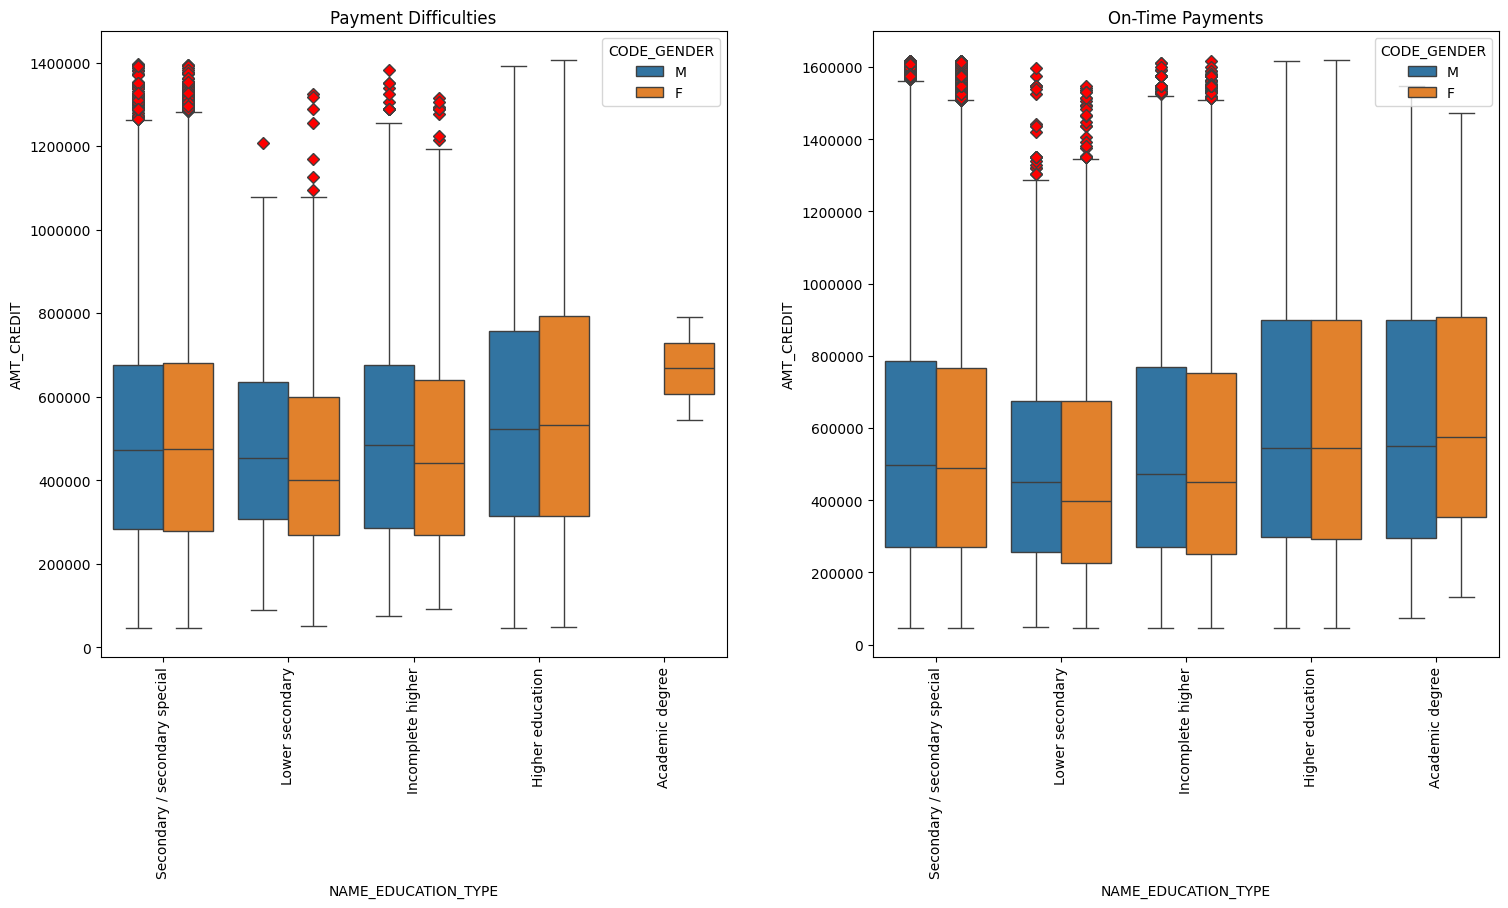

In [ ]:
bi_boxplot('NAME_EDUCATION_TYPE','AMT_CREDIT',max_value1_AMT_CREDIT, max_value0_AMT_CREDIT, 'CODE_GENDER')

**Observation**
- Customers with a "college degree" have a wide range of loans for timely payments, while for customers with payment problems this range is much lower
- If you look at the aggregate statistics, customers with a "higher education" and payment problems take out a mean and median loan in a much larger range than customers with timely payments.
- Male customers with a "higher education" always pay their loans on time

In [ ]:
def numeric_vs_categorical_analysis(df0, df1, column_1, column_2, column_3):
  max_value1_column_1 = outlier_range(df1, column_1)
  max_value0_column_1 = outlier_range(df0, column_1)

  display(df1.groupby(by = [column_2, column_3])[column_1].describe().head())


  display(df0.groupby(by = [column_2, column_3])[column_1].describe().head())

  bi_boxplot(column_2, column_1, max_value1_column_1, max_value0_column_1, column_3)

### Analysis of `AMT_INCOME_TOTAL` vs `NAME_FAMILY_STATUS` vs `CODE_GENDER`

count      mean        std      min  \
NAME_FAMILY_STATUS CODE_GENDER                                         
Civil marriage     F           1753.00 153620.72  101045.86 25650.00   
                   M           1208.00 173949.99   92449.17 36000.00   
Married            F           8324.00 159907.85 1283283.40 27000.00   
                   M           6526.00 182233.06   94787.77 31500.00   
Separated          F           1045.00 161159.55   82633.33 36000.00   

                                     25%       50%       75%          max  
NAME_FAMILY_STATUS CODE_GENDER                                             
Civil marriage     F           108000.00 135000.00 180000.00   3150000.00  
                   M           117000.00 157500.00 202500.00   1350000.00  
Married            F            90000.00 135000.00 180000.00 117000000.00  
                   M           126000.00 157500.00 225000.00   1890000.00  
Separated          F           112500.00 135000.00 202500.00    832500.00

count      mean       std      min  \
NAME_FAMILY_STATUS CODE_GENDER                                          
Civil marriage     F            19017.00 162086.05 106811.49 27000.00   
                   M             7797.00 184126.29 106559.49 27000.00   
Married            F           114125.00 154289.53  88593.43 26100.00   
                   M            67459.00 199592.83 147599.76 27000.00   
Separated          F            14416.00 166374.21  94782.18 27000.00   

                                     25%       50%       75%         max  
NAME_FAMILY_STATUS CODE_GENDER                                            
Civil marriage     F           112500.00 135000.00 202500.00  9000000.00  
                   M           121500.00 157500.00 225000.00  3825000.00  
Married            F            94500.00 135000.00 180000.00  3600000.00  
                   M           135000.00 180000.00 225000.00 18000090.00  
Separated          F           112500.00 139500.00 202500.00  2250000.00

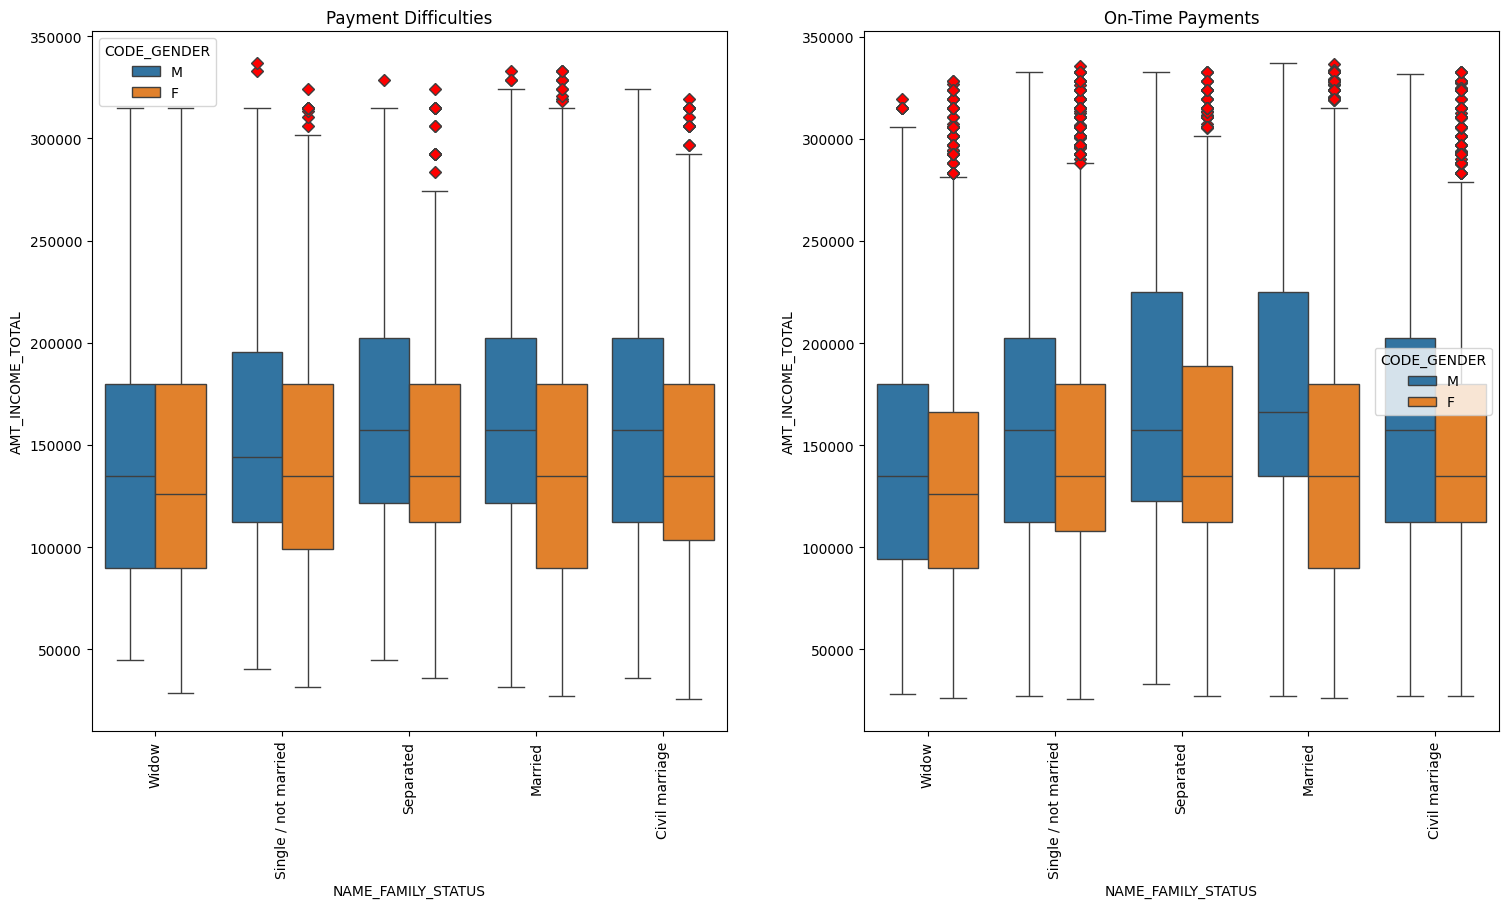

In [ ]:
numeric_vs_categorical_analysis(df0, df1, 'AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS', 'CODE_GENDER')

**Observation**
- `Married` clients have a slightly higher average/median income in the ``Timely Payments'' category than in the `Payment Difficulties'' category

### Analysis of `AMT_INCOME_TOTAL` vs `YEARS_BIRTH_CATEGORY` vs `NAME_HOUSING_TYPE`

count      mean      std      min  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                         
20-30                Co-op apartment       40.00 148628.70 59516.24 67500.00   
                     House / apartment   4201.00 151897.22 70874.65 31500.00   
                     Municipal apartment  153.00 153608.82 78282.79 45000.00   
                     Office apartment      40.00 147375.00 50817.26 67500.00   
                     Rented apartment     229.00 144210.10 59998.66 45000.00   

                                               25%       50%       75%  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                   
20-30                Co-op apartment     110250.00 135000.00 185625.00   
                     House / apartment   112500.00 135000.00 180000.00   
                     Municipal apartment 108000.00 135000.00 180000.00   
                     Office apartment    112500.00 135000.00 180000.00   
                     Rented apartment     99000.00 135000.00 180000.00   

                                               max  
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE              
20-30                Co-op apartment     360000.00  
                     House / apartment   810000.00  
                     Municipal apartment 675000.00  
                     Office apartment    270000.00  
                     Rented apartment    405000.00

count      mean       std  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                  
20-30                Co-op apartment       298.00 161153.15  76171.26   
                     House / apartment   33165.00 163944.39  92313.18   
                     Municipal apartment  1099.00 166235.08  88698.47   
                     Office apartment      455.00 177960.18 115765.13   
                     Rented apartment     1535.00 153028.06  70748.99   

                                              min       25%       50%  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                  
20-30                Co-op apartment     45000.00 112500.00 139500.00   
                     House / apartment   27000.00 112500.00 141264.00   
                     Municipal apartment 45000.00 112500.00 144000.00   
                     Office apartment    36000.00 112500.00 157500.00   
                     Rented apartment    29250.00 109125.00 135000.00   

                                               75%        max  
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                         
20-30                Co-op apartment     202500.00  720000.00  
                     House / apartment   202500.00 4500000.00  
                     Municipal apartment 202500.00 1417500.00  
                     Office apartment    225000.00 1800000.00  
                     Rented apartment    180000.00  742500.00

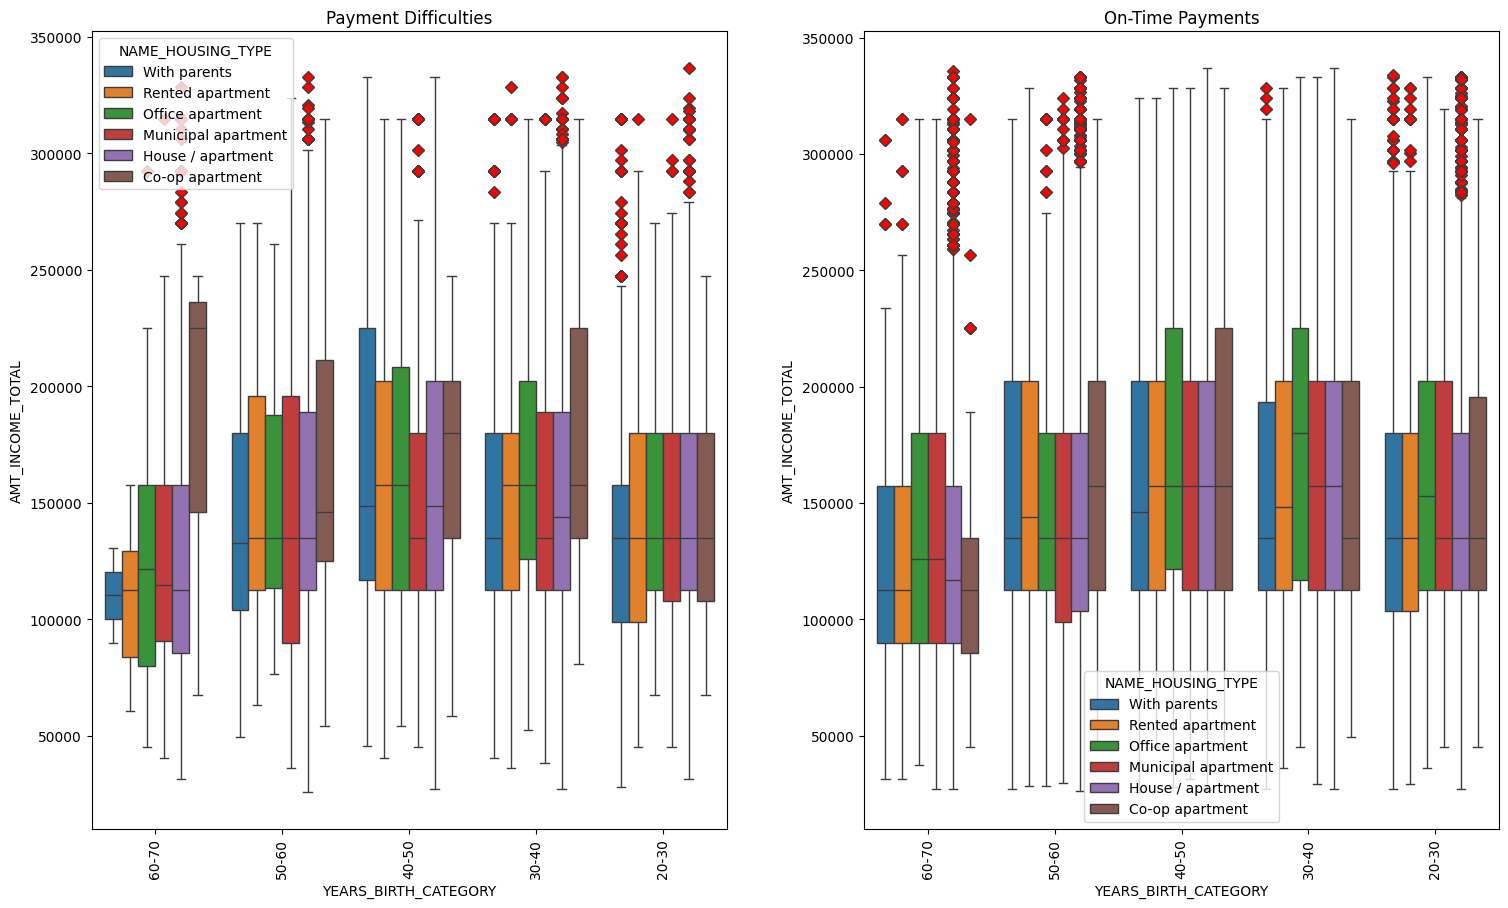

In [ ]:
numeric_vs_categorical_analysis(df0, df1, 'AMT_INCOME_TOTAL', 'YEARS_BIRTH_CATEGORY', 'NAME_HOUSING_TYPE')

**Observation**
- Clients aged `60-70` living in `Co-op apartment` have a very high income range in the `Difficult to pay` category than in the `Timely payments` category.
- Clients aged `20-30` living in `Office apartment` have a very high median income in the `Timely payments` category compared to the `Difficult to pay` category.

### Analysis of `AMT_GOODS_PRICE` vs `NAME_INCOME_TYPE` vs `CODE_GENDER`

count      mean       std       min  \
NAME_INCOME_TYPE     CODE_GENDER                                         
Commercial associate F           2968.00 536304.02 353598.52  45000.00   
                     M           2392.00 526355.38 335793.33  45000.00   
Maternity leave      F              2.00 929250.00 715945.62 423000.00   
Pensioner            F           2243.00 494976.12 316903.86  45000.00   
                     M            739.00 486543.08 321104.43  45000.00   

                                       25%       50%        75%        max  
NAME_INCOME_TYPE     CODE_GENDER                                            
Commercial associate F           270000.00 450000.00  675000.00 3600000.00  
                     M           270000.00 450000.00  675000.00 2961000.00  
Maternity leave      F           676125.00 929250.00 1182375.00 1435500.00  
Pensioner            F           229500.00 450000.00  675000.00 2173500.00  
                     M           229500.00 450000.00  675000.00 1800000.00

count       mean        std       min  \
NAME_INCOME_TYPE     CODE_GENDER                                            
Businessman          F               3.00 1125000.00 1031079.53 225000.00   
                     M               7.00 1272857.14  755104.06 495000.00   
Commercial associate F           41552.00  602132.71  400701.09  45000.00   
                     M           24705.00  620123.74  422345.24  45000.00   
Maternity leave      F               2.00  562500.00  350017.86 315000.00   

                                       25%        50%        75%        max  
NAME_INCOME_TYPE     CODE_GENDER                                             
Businessman          F           562500.00  900000.00 1575000.00 2250000.00  
                     M           607500.00 1350000.00 1800000.00 2250000.00  
Commercial associate F           270000.00  472500.00  837000.00 4050000.00  
                     M           270000.00  472500.00  900000.00 4050000.00  
Maternity leave      F           438750.00  562500.00  686250.00  810000.00

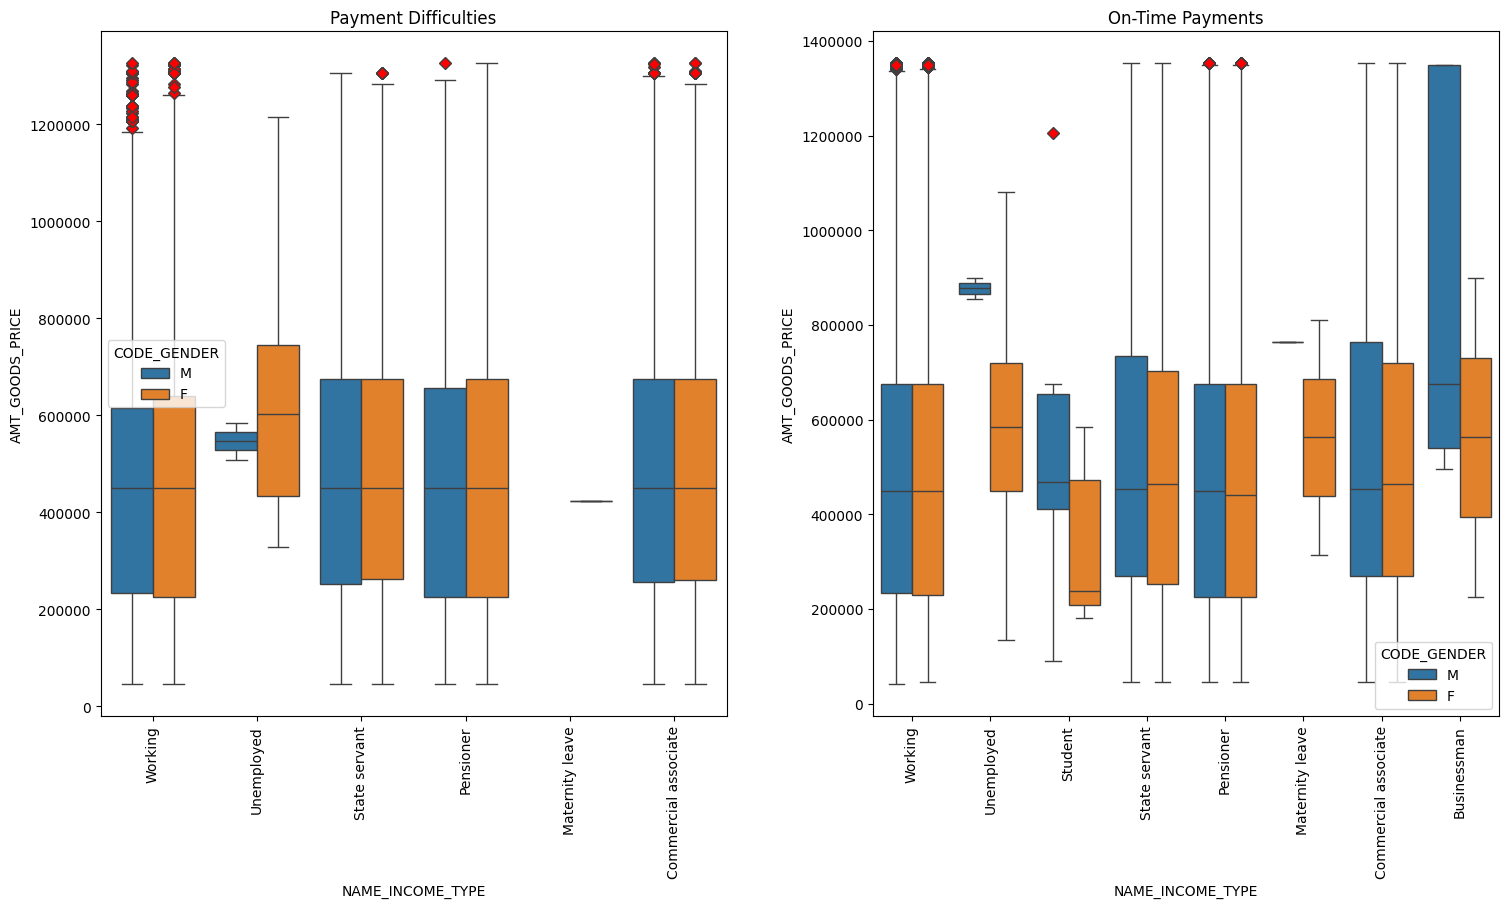

In [ ]:
numeric_vs_categorical_analysis(df0, df1, 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'CODE_GENDER')

**Observations**
- Customers who are `Unemployed` and `Male` have a very high price of goods in `Timely Payments` than `Payment Difficulties`
- Customers who are `Student` and `Male` or `Female` make their payments on time. They are completely absent in `Payment Difficulties` category. `Student` category seems attractive for lending.
- Customers who are `Businessman` and `Male` or `Female` make their payments on time. They are completely absent in `Payment Difficulties` category. `Businessman` seems attractive for lending.

### Analysis of `AMT_INCOME_TOTAL` vs `OCCUPATION_TYPE` vs `CODE_GENDER`

count      mean      std      min       25%  \
OCCUPATION_TYPE CODE_GENDER                                                
Accountants     F           457.00 174840.64 79021.04 54000.00 112500.00   
                M            17.00 202367.65 98623.66 81000.00 121500.00   
Cleaning staff  F           410.00 128907.99 70328.23 31500.00  90000.00   
                M            37.00 119493.24 45786.21 45000.00  90000.00   
Cooking staff   F           555.00 129298.38 55531.88 32400.00  90000.00   

                                  50%       75%       max  
OCCUPATION_TYPE CODE_GENDER                                
Accountants     F           157500.00 202500.00 540000.00  
                M           180000.00 252000.00 438750.00  
Cleaning staff  F           112500.00 157500.00 720000.00  
                M           112500.00 135000.00 247500.00  
Cooking staff   F           112500.00 157500.00 405000.00

count      mean       std      min       25%  \
OCCUPATION_TYPE CODE_GENDER                                                  
Accountants     F           9072.00 194324.51 109135.61 27000.00 130500.00   
                M            267.00 236490.89 131795.33 54000.00 141750.00   
Cleaning staff  F           3904.00 130602.05  63495.05 25650.00  90000.00   
                M            302.00 137172.52  64373.09 31500.00  90000.00   
Cooking staff   F           4830.00 134460.40  60213.56 27000.00  90000.00   

                                  50%       75%        max  
OCCUPATION_TYPE CODE_GENDER                                 
Accountants     F           175500.00 225000.00 2214117.00  
                M           216000.00 270000.00 1035000.00  
Cleaning staff  F           112500.00 157500.00 1080000.00  
                M           132750.00 169875.00  450000.00  
Cooking staff   F           121500.00 157500.00  540000.00

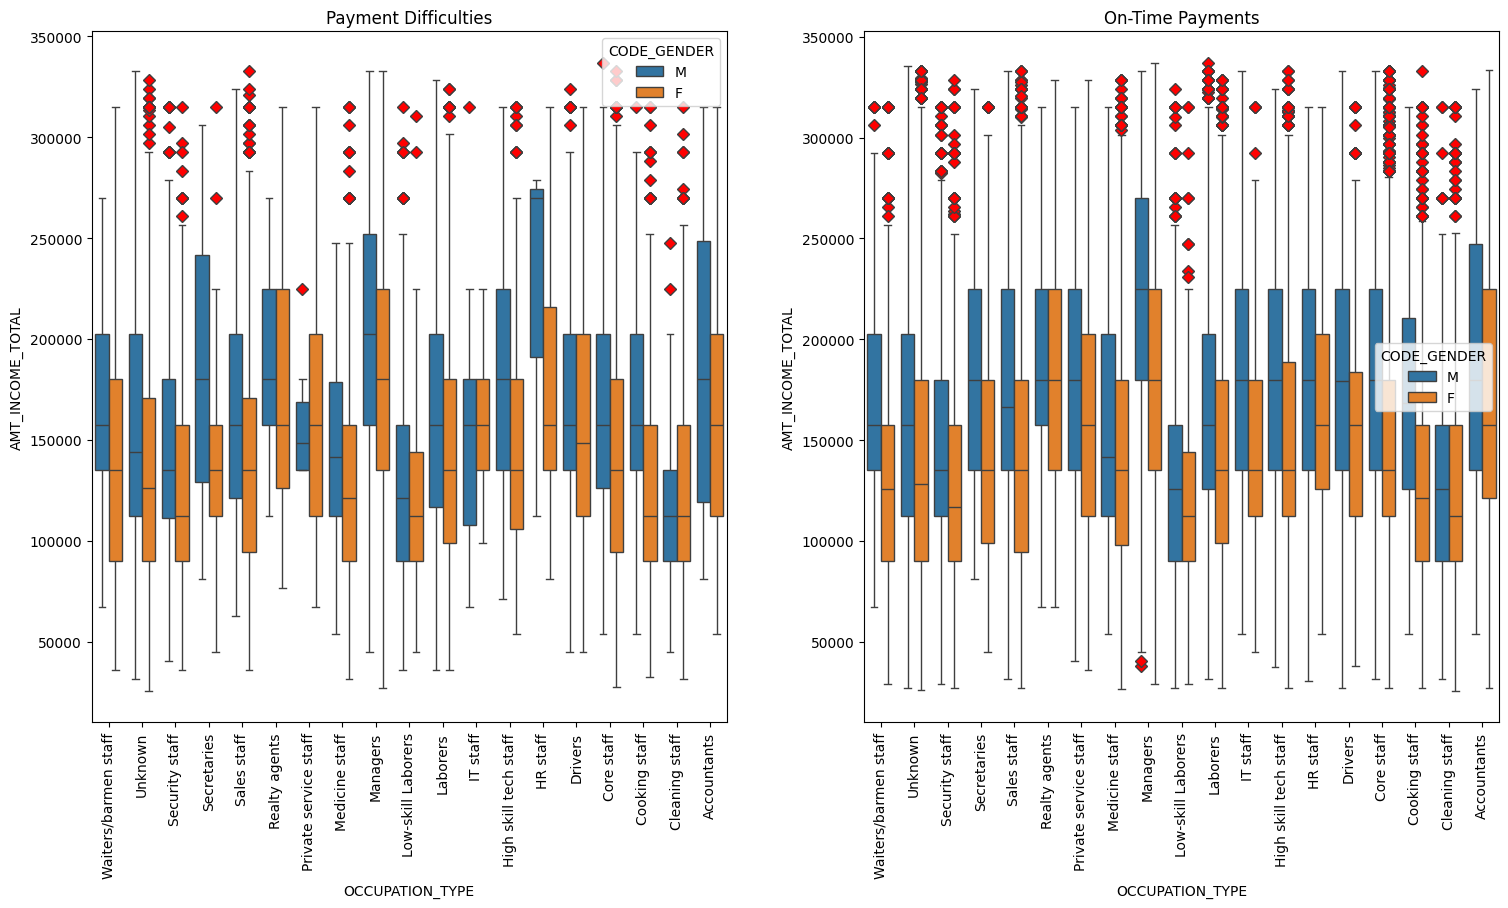

In [ ]:
numeric_vs_categorical_analysis(df0, df1, 'AMT_INCOME_TOTAL', 'OCCUPATION_TYPE', 'CODE_GENDER')

**Observations**
- Customers belonging to the category `Waiters/barmen staff` and `Female` have a lower average income in the category `Timely payments` than in the category `Payment difficulties`
- Customers belonging to the category `Cleaning staff` and `Female` have a higher average income in the category `Timely payments` than in the category `Payment difficulties`
- Customers belonging to the category `HR staff` and `Male` have a higher average income in the category `Payment difficulties` than in the category `Timely payments`
- Customers belonging to the category `Managers` and `Male` have a higher average income in the category `Timely payments` than in the category `Payment difficulties`

## Categorical and categorical variables

In [ ]:
def bi_countplot_target(df0, df1, column, hue_column):
    group_name = f'Normalized distribution of values ​​by category: {column}'
    print(group_name.upper())

    pltname = 'Client with payment difficulties'
    unique_hue_values = df1[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,4)

    proportions = df1.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[0], title=pltname)

    for container in ax.containers:
      ax.bar_label(container, fmt='{:,.1f}%')

    pltname = 'Customers with timely payments'
    unique_hue_values = df0[hue_column].unique()

    proportions = df0.groupby(hue_column)[column].value_counts (normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
    by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[1], title=pltname)

    for container in ax.containers:
      ax.bar_label(container, fmt='{:,.1f}%')

    plt.show()


    #------------
    group_name = f'Number of values ​​per category {column}'
    print(group_name.upper())

    pltname = 'Client with timely payments'
    unique_hue_values = df1[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,4)
    counts = df1.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
      by=unique_hue_values [0], ascending=False
      ).plot.bar(ax=axes [0], title=pltname )

    for container in ax.containers:
      ax.bar_label(container)

    pltname = 'Client with timely payments'
    unique_hue_values = df0[hue_column].unique()
    counts = df0.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values (
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[1], title=pltname)

    for container in ax. containers:
      ax.bar_label(container)

    plt.show()

NORMALIZED DISTRIBUTION OF VALUES ​​BY CATEGORY: NAME_INCOME_TYPE


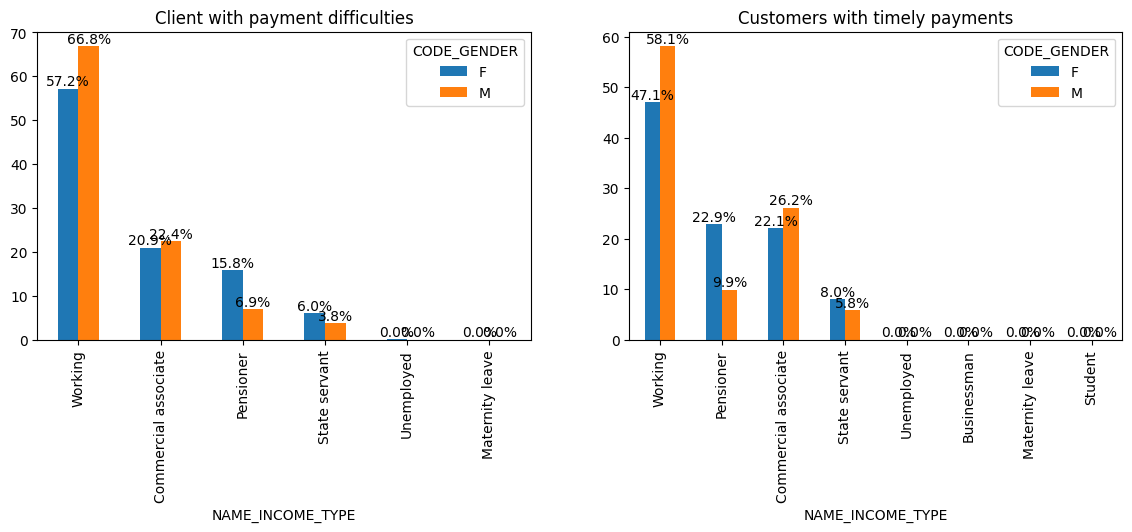

NUMBER OF VALUES ​​PER CATEGORY NAME_INCOME_TYPE


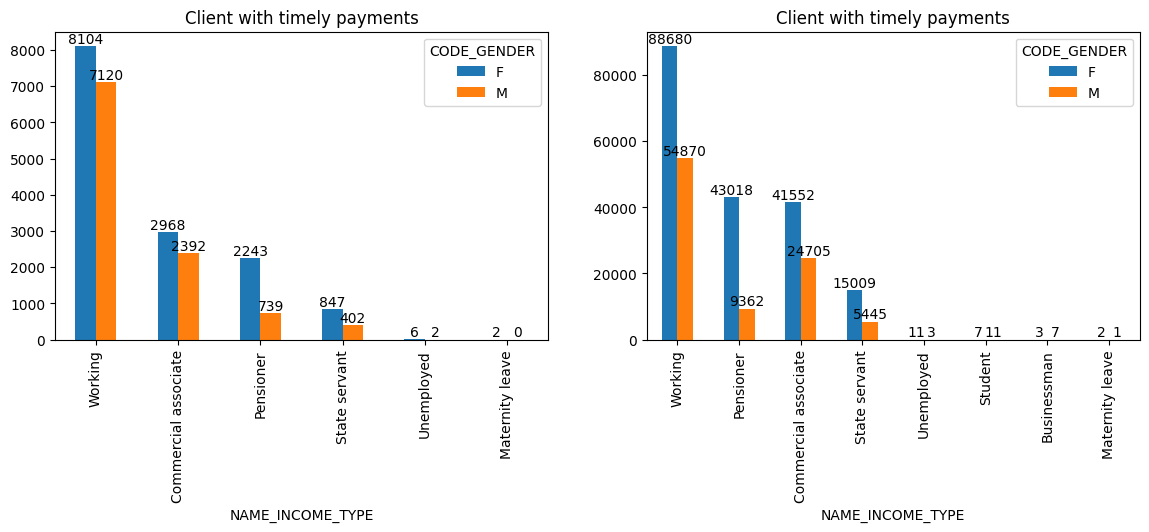

In [ ]:
bi_countplot_target(df0, df1, 'NAME_INCOME_TYPE','CODE_GENDER')

**Observations**
- `Working` and `Male` customers have more difficulty paying compared to those who pay on time
- `Pensioner` and `Female` customers have more difficulty paying compared to those who pay on time
- `Businessman` and `Student` customers make payments on time, although their history is short

### Analysis of NAME_EDUCATION_TYPE vs CODE_GENDER

NORMALIZED DISTRIBUTION OF VALUES ​​BY CATEGORY: NAME_EDUCATION_TYPE


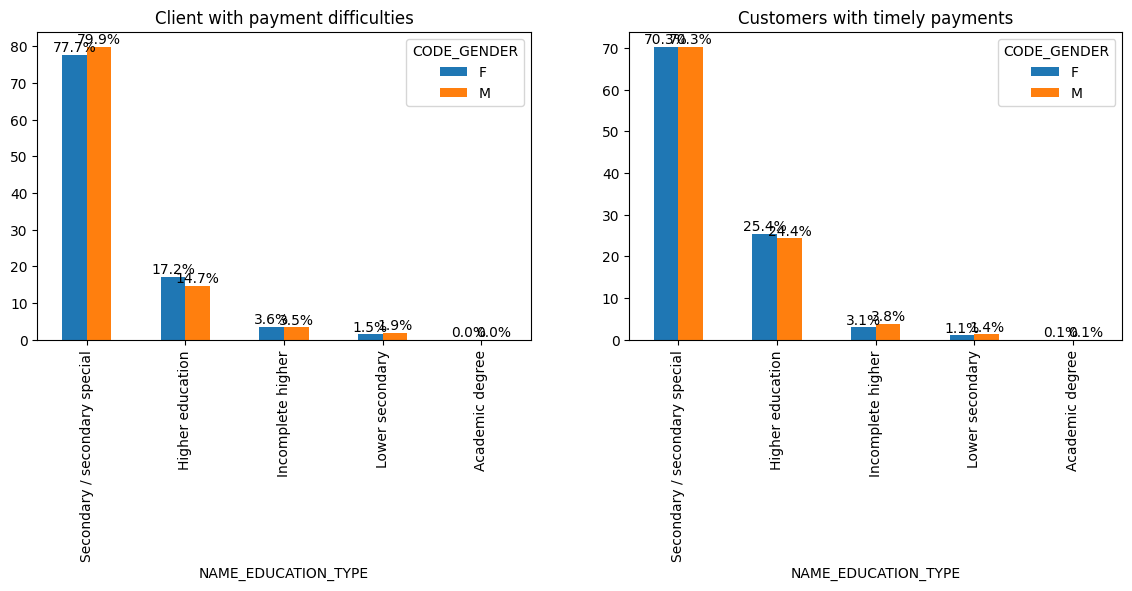

NUMBER OF VALUES ​​PER CATEGORY NAME_EDUCATION_TYPE


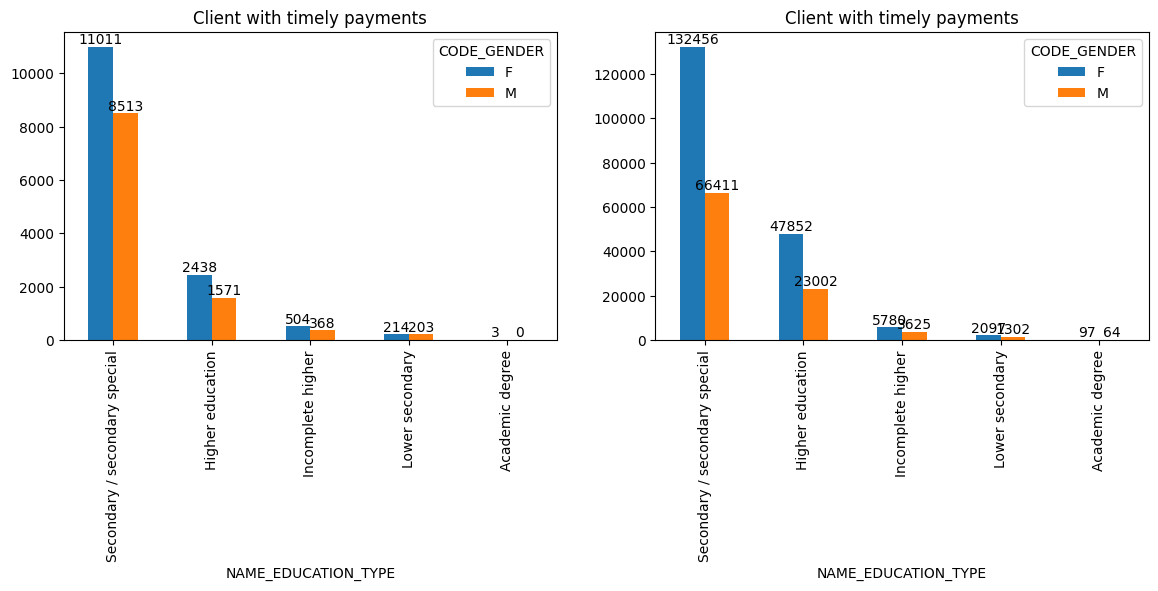

In [ ]:
bi_countplot_target(df0, df1, 'NAME_EDUCATION_TYPE','CODE_GENDER')

**Observation**
- Customers with `Secondary/Secondary special` education and `Male` have more difficulties with payment compared to those who pay on time
- Customers with `Higher education` and `Famale` have more problems with timely payments compared to those who have difficulties with paymentти.

### Analysis of NAME_FAMILY_STATUS vs OCCUPATION_TYPE

NORMALIZED DISTRIBUTION OF VALUES ​​BY CATEGORY: OCCUPATION_TYPE


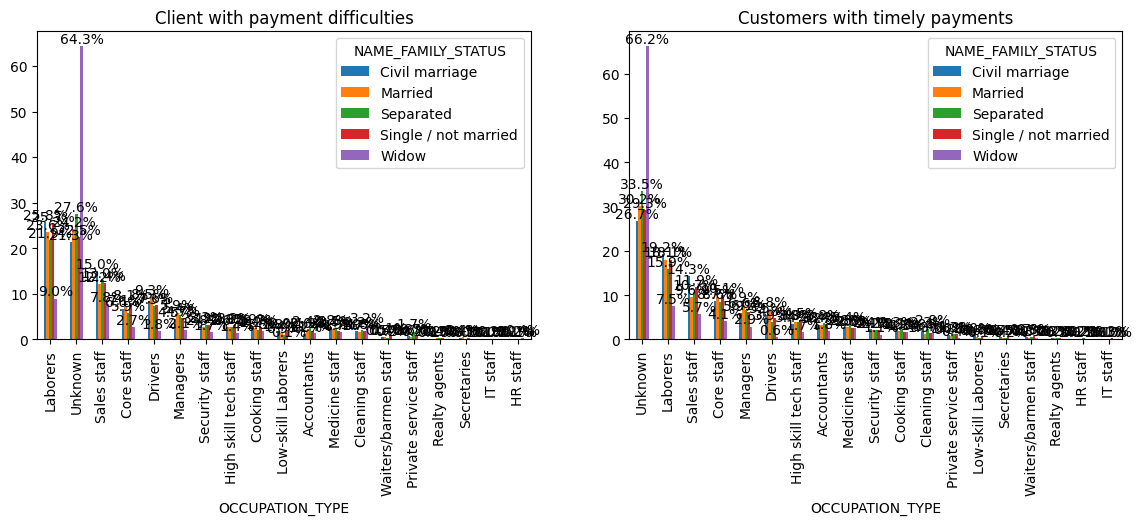

NUMBER OF VALUES ​​PER CATEGORY OCCUPATION_TYPE


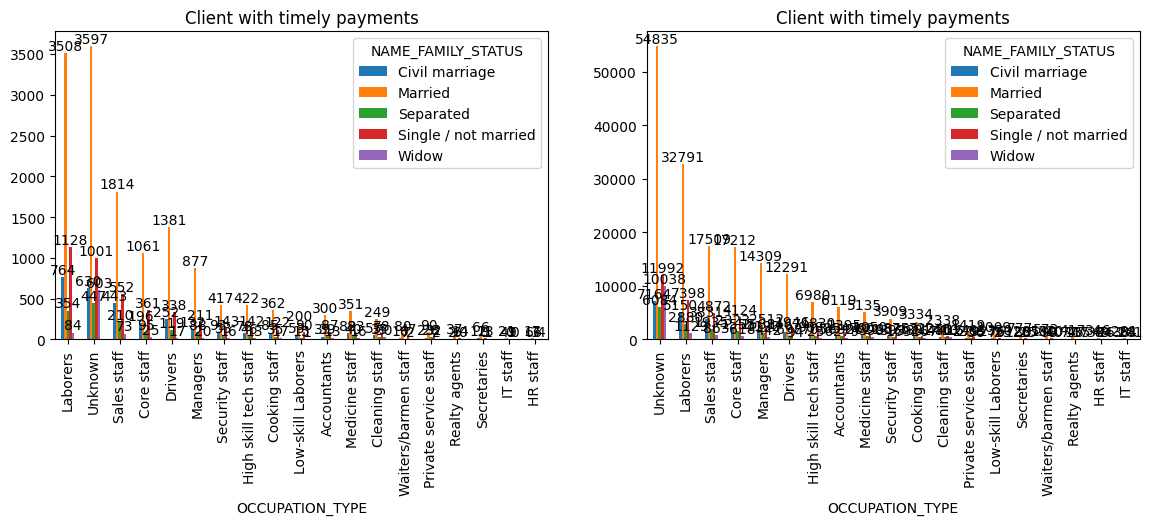

In [ ]:
bi_countplot_target(df0, df1, 'OCCUPATION_TYPE','NAME_FAMILY_STATUS')

**Observations**
- Customers who are `Single\not married`, `Married` and `Civil married`, as well as `Waiters\barmen staff` have more difficulty paying compared to those who pay on time
- Customers who are `Married` and `Drivers` have more difficulty paying compared to those who pay on time
- `Married` and `Accountants` have better on-time payment rates

### Analysis of OCCUPATION_TYPE VS NAME_CONTRACT_TYPE

NORMALIZED DISTRIBUTION OF VALUES ​​BY CATEGORY: OCCUPATION_TYPE


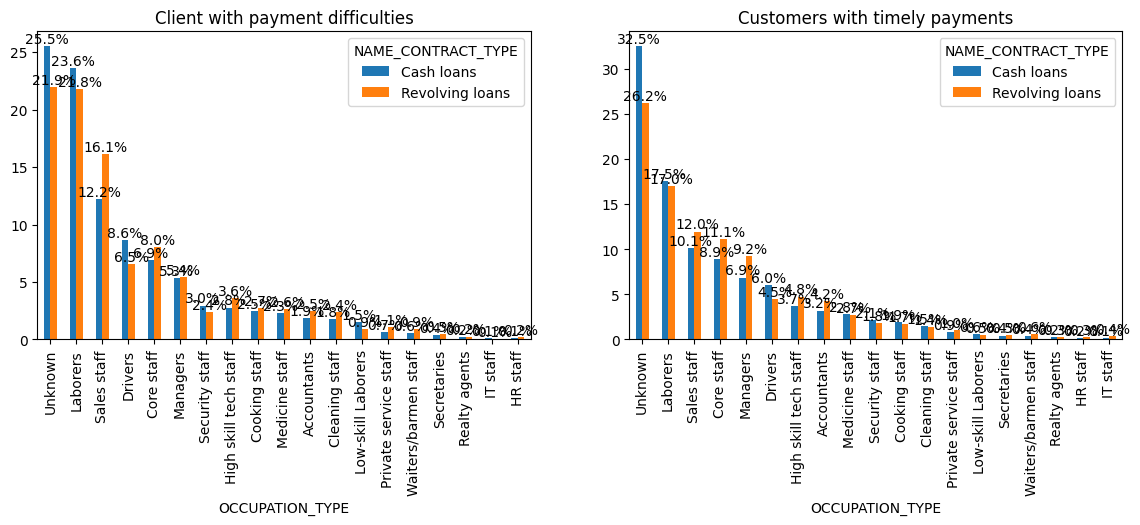

NUMBER OF VALUES ​​PER CATEGORY OCCUPATION_TYPE


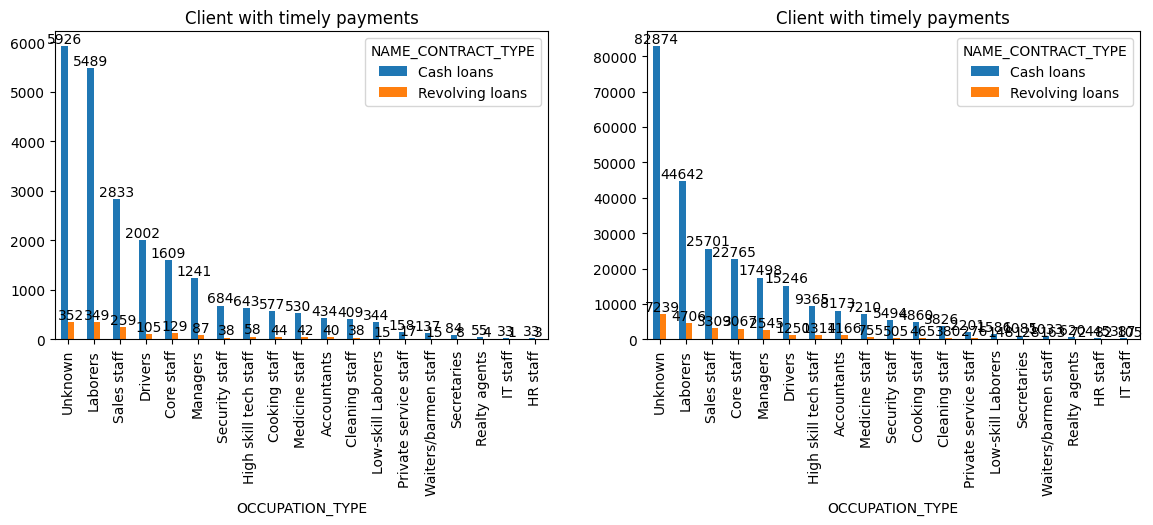

In [ ]:
bi_countplot_target(df0, df1, 'OCCUPATION_TYPE', 'NAME_CONTRACT_TYPE')

**Observation**
- Customers who are `Sales staff`, `Laborers`, `Drivers` and have `Cash loans` have more difficulty in paying compared to those who pay on time

# Conclusion: Categories of clients to focus on when granting a loan

- Clients who have been working for more than 19 years
- Clients aged 30-40 and 40-50
- Married clients
- Male clients with higher education
- Students and businessmen.